# Customer Retention

## E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.


### Importing important Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings("ignore")
print("Import complete")

Import complete


### Loading the dataset 

In [3]:
dataset = pd.read_excel("customer_retention_dataset.xlsx",sheet_name='datasheet')
dataset.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

### Exploratory Analysis

In [4]:
df = dataset.copy()

In [5]:
# checking shape of dataset
df.shape

(269, 71)

In [6]:
# checking columns 
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [7]:
df.rename(columns={'1Gender of respondent':'Gender',
                          '2 How old are you? ':'Age',
                          '3 Which city do you shop online from?':'City',
                  '4 What is the Pin Code of where you shop online from?':'Pincode',
                 '5 Since How Long You are Shopping Online ?' :'No. of years shopping',
                  '6 How many times you have made an online purchase in the past 1 year?':'No of online purchases last year',
                  '7 How do you access the internet while shopping on-line?':'Internet Access',
                  '8 Which device do you use to access the online shopping?':'Device',
'9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ':'Mobile Screen size',
                  '10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'OS',
                   '11 What browser do you run on your device to access the website?\t\t\t                                                          ':'Browser',
                   '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ':'Channel accessed',                                                                  
'13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'Medium online retail store',
'14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':' Time spent on e-retail store',
                   '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'Preferred Payment',
                   '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'Frequency of abandoning items',
                   '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'Reason of abandoning item',
                   '18 The content on the website must be easy to read and understand':'Content on website',
                   '19 Information on similar product to the one highlighted  is important for product comparison':'Information on similar product',
                   '20 Complete information on listed seller and product being offered is important for purchase decision.':'Seller and product info',
                   '21 All relevant information on listed products must be stated clearly':'Product Information',
                   '22 Ease of navigation in website':'Ease of navigation',
                   '23 Loading and processing speed':'Loading and processing speed',
                   '24 User friendly Interface of the website':'User friendly interface',
                   '25 Convenient Payment methods':'Convinient Payment methods',
                   '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Trust',
                   '27 Empathy (readiness to assist with queries) towards the customers':'Empathy with customers',
                   '28 Being able to guarantee the privacy of the customer':'Customer Privacy',
                   '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Responsiveness &availability',
                   '30 Online shopping gives monetary benefit and discounts':'Monetary gifts & discounts',
                   '31 Enjoyment is derived from shopping online':'Enjoyment factor',
                   '32 Shopping online is convenient and flexible':'Shopping online',
                   '33 Return and replacement policy of the e-tailer is important for purchase decision':'Return & Replacement',
                   '34 Gaining access to loyalty programs is a benefit of shopping online':'Access to loyalty program',
                   '35 Displaying quality Information on the website improves satisfaction of customers':'quality information improves satisfaction of customers',
                   '36 User derive satisfaction while shopping on a good quality website or application':'User derive satisfaction',
                   '37 Net Benefit derived from shopping online can lead to users satisfaction':'Net benefit',
                   '38 User satisfaction cannot exist without trust':'User satisfaction without trust',
                   '39 Offering a wide variety of listed product in several category':'Offering variety',
                   '40 Provision of complete and relevant product information':'Complete and relevant product Info',
                   '41 Monetary savings':'Monetary savings',
                   '42 The Convenience of patronizing the online retailer':'patronizing the online retailer',
                   '43 Shopping on the website gives you the sense of adventure':'Adventure factor',
                   '44 Shopping on your preferred e-tailer enhances your social status':'Social status',
                   '45 You feel gratification shopping on your favorite e-tailer':'Gratification',
                   '46 Shopping on the website helps you fulfill certain roles':'Fufill roles',
                   '47 Getting value for money spent':'Value for money'}, inplace=True)

In [8]:
# checking info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                           --------------  ----- 
 0   Gender                                                                                                                                                           269 non-null    object
 1   Age                                                                                                                                                              269 non-null    object
 2   City                                                                                                                                  

There are total 71 features out of which only one is of integer data type rest all are of object datatype

In [9]:
# statistical summary 
df.describe(include=['O'])

Gender          Age   City No. of years shopping  \
count      269          269    269                   269   
unique       2            5     11                     5   
top     Female  31-40 years  Delhi         Above 4 years   
freq       181           81     58                    98   

       No of online purchases last year  Internet Access      Device  \
count                               269              269         269   
unique                                6                4           4   
top                  Less than 10 times  Mobile internet  Smartphone   
freq                                114              142         141   

       Mobile Screen size                     OS        Browser  \
count                 269                    269            269   
unique                  4                      3              4   
top                Others  Window/windows Mobile  Google chrome   
freq                  134                    122            216   

       Channel accessed Medium online retail store  \
count               269                        269   
unique                3                          5   
top       Search Engine              Search Engine   
freq                230                         87   

        Time spent on e-retail store   Preferred Payment  \
count                            269                 269   
unique                             5                   3   
top                more than 15 mins  Credit/Debit cards   
freq                             123                 148   

       Frequency of abandoning items Reason of abandoning item  \
count                            269                       269   
unique                             4                         5   
top                        Sometimes  Better alternative offer   
freq                             171                       133   

        Content on website Information on similar product  \
count                  269                            269   
unique                   4                              4   
top     Strongly agree (5)             Strongly agree (5)   
freq                   164                            116   

       Seller and product info Product Information  Ease of navigation  \
count                      269                 269                 269   
unique                       5                   4                   4   
top                  Agree (4)           Agree (4)  Strongly agree (5)   
freq                       101                 132                 141   

       Loading and processing speed User friendly interface  \
count                           269                     269   
unique                            5                       5   
top              Strongly agree (5)      Strongly agree (5)   
freq                            115                     189   

       Convinient Payment methods               Trust Empathy with customers  \
count                         269                 269                    269   
unique                          3                   4                      4   
top            Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
freq                          159                 141                    194   

          Customer Privacy Responsiveness &availability  \
count                  269                          269   
unique                   3                            4   
top     Strongly agree (5)           Strongly agree (5)   
freq                   185                          149   

       Monetary gifts & discounts    Enjoyment factor     Shopping online  \
count                         269                 269                 269   
unique                          5                   5                   4   
top            Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
freq                          105                  86                 146   

       Return & Replacement Acc

In [10]:
#checking missing values
df.isnull().sum()

Gender                                                                                                                                                             0
Age                                                                                                                                                                0
City                                                                                                                                                               0
Pincode                                                                                                                                                            0
No. of years shopping                                                                                                                                              0
No of online purchases last year                                                                                                                                   0
Internet A

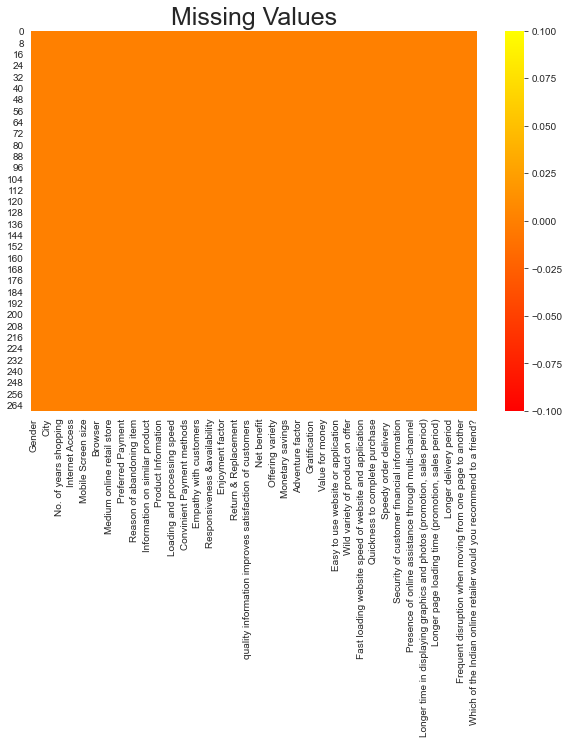

In [11]:
# visualising the missing values 
plt.figure(figsize=(10,7))
plt.title("Missing Values",fontsize=25)
sns.heatmap(df.isnull(),cmap='autumn')
plt.show()

In [12]:
# number of unique values in all the features
print("Number of unique values in features: ")
df.nunique()

Number of unique values in features: 


Gender                                                                                                                                                              2
Age                                                                                                                                                                 5
City                                                                                                                                                               11
Pincode                                                                                                                                                            39
No. of years shopping                                                                                                                                               5
No of online purchases last year                                                                                                                                    6
Inte

In [13]:
#checking unique values in all feature
for i in df.columns:
    print("Unique values in {} are \n{}".format(i,df[i].value_counts()))
    print("-"*70)

Unique values in Gender are 
Female    181
Male       88
Name: Gender, dtype: int64
----------------------------------------------------------------------
Unique values in Age are 
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
----------------------------------------------------------------------
Unique values in City are 
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64
----------------------------------------------------------------------
Unique values in Pincode are 
201308    38
132001    19
201310    18
110044    16
173229     9
173212     9
250001     9
122018     8
560037     8
132036     8
560010     8
110011     7
110008     7
201306     7
110014     6
110018     6
201008     5
20100

Name: Privacy of customers’ information, dtype: int64
----------------------------------------------------------------------
Unique values in Security of customer financial information are 
Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security of customer financial information, dtype: int64
----------

Let's Visualise the Distribution of the different features

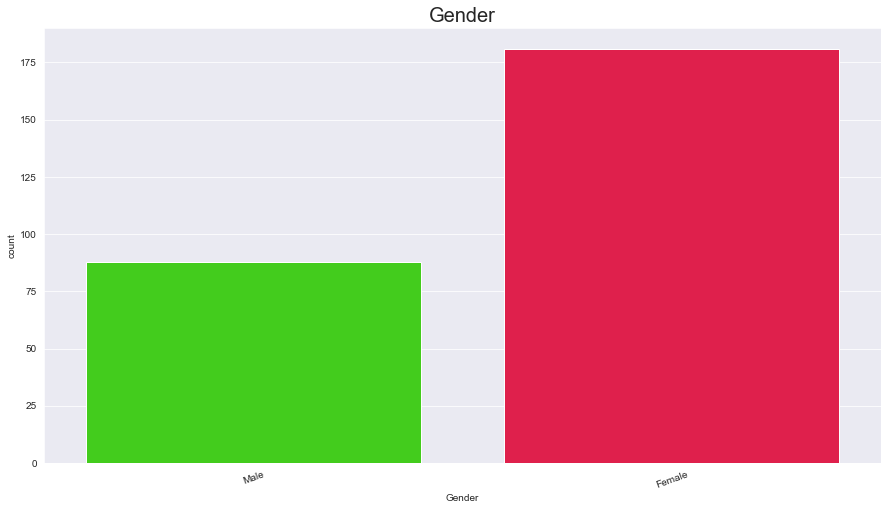

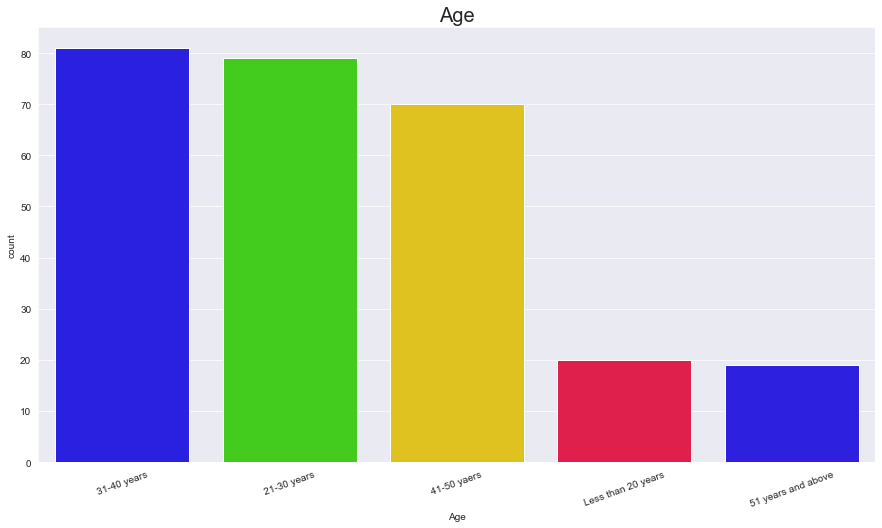

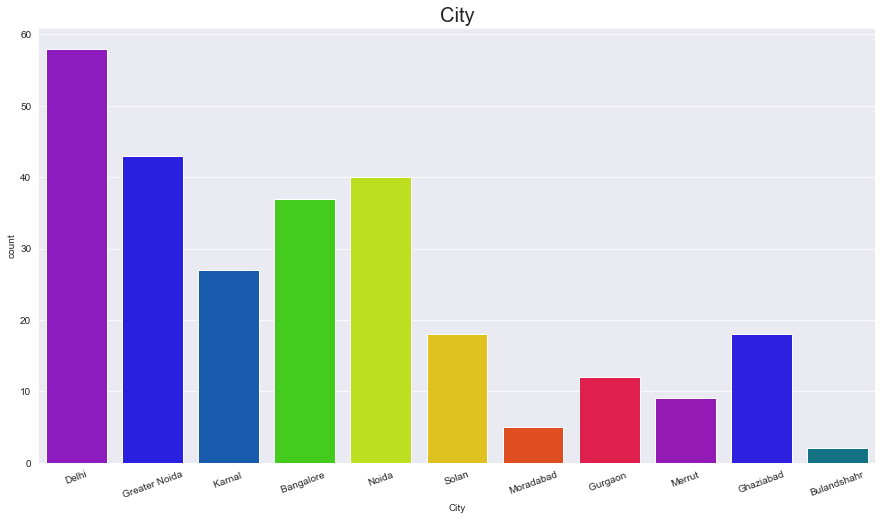

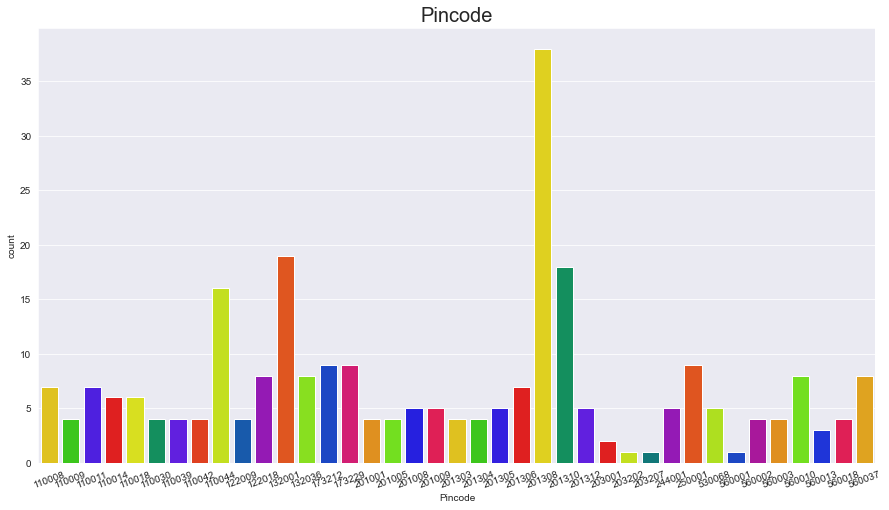

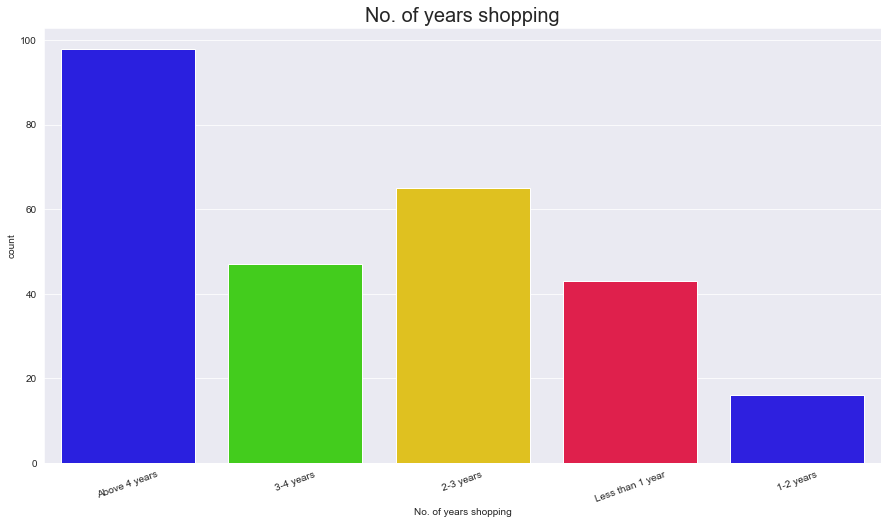

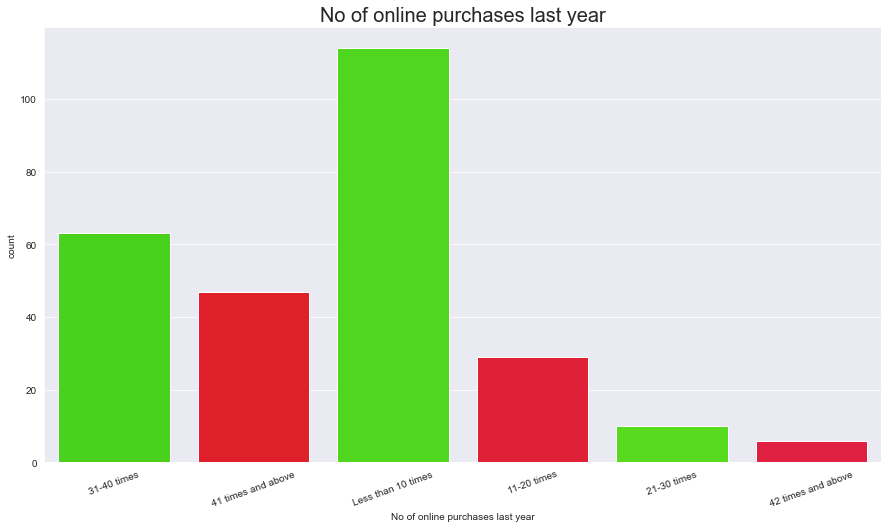

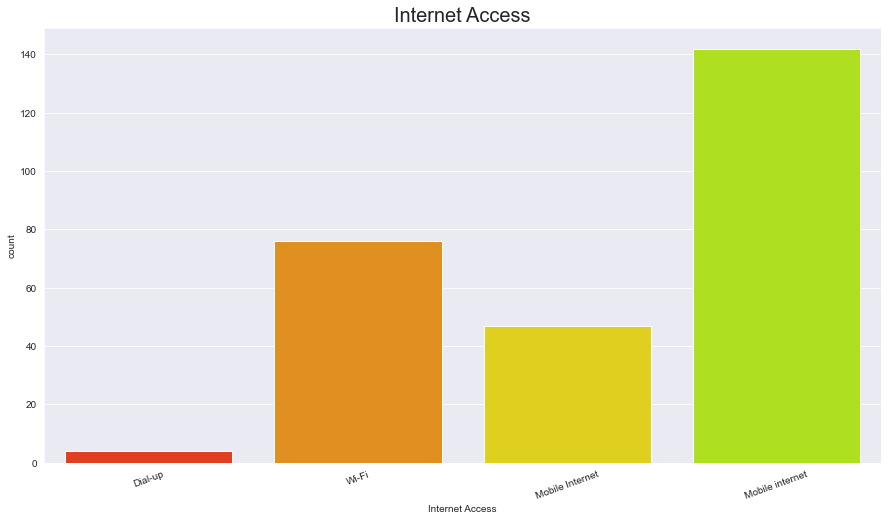

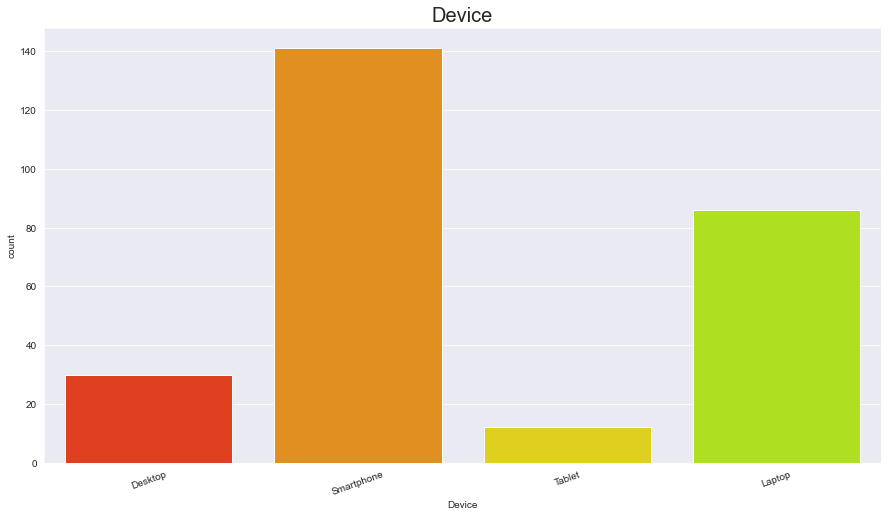

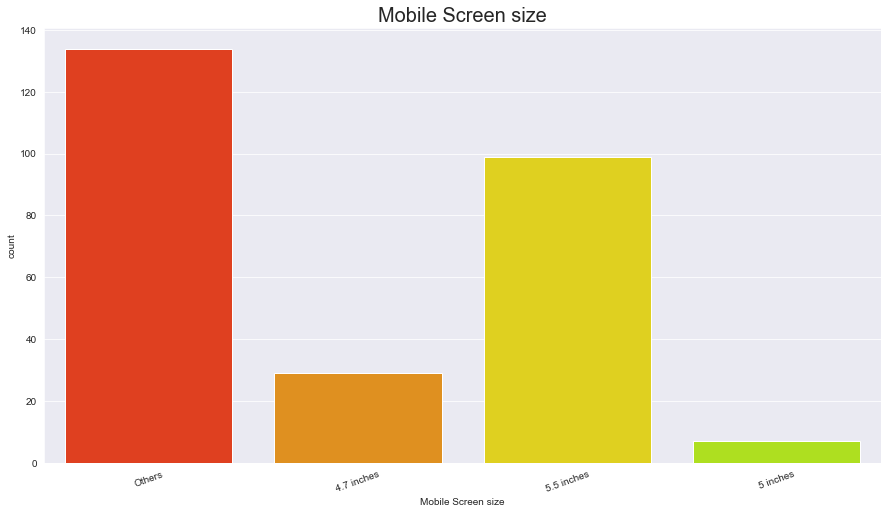

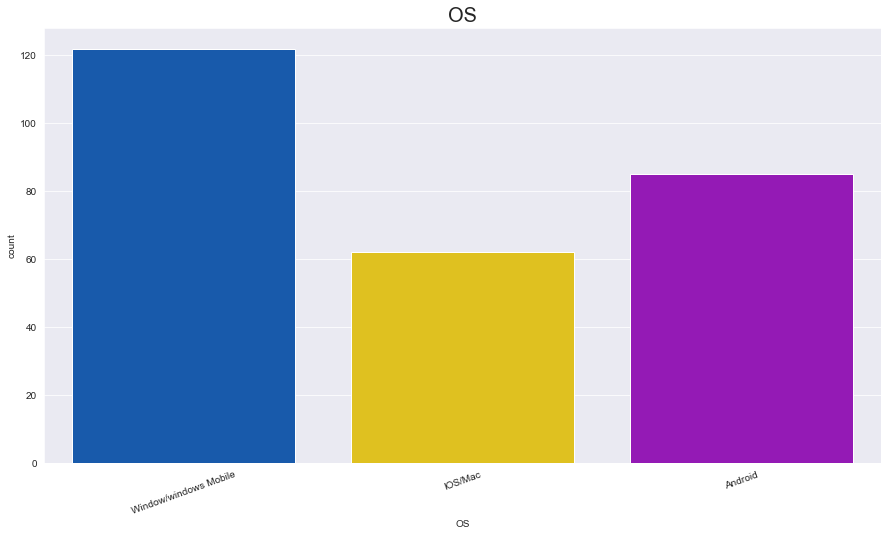

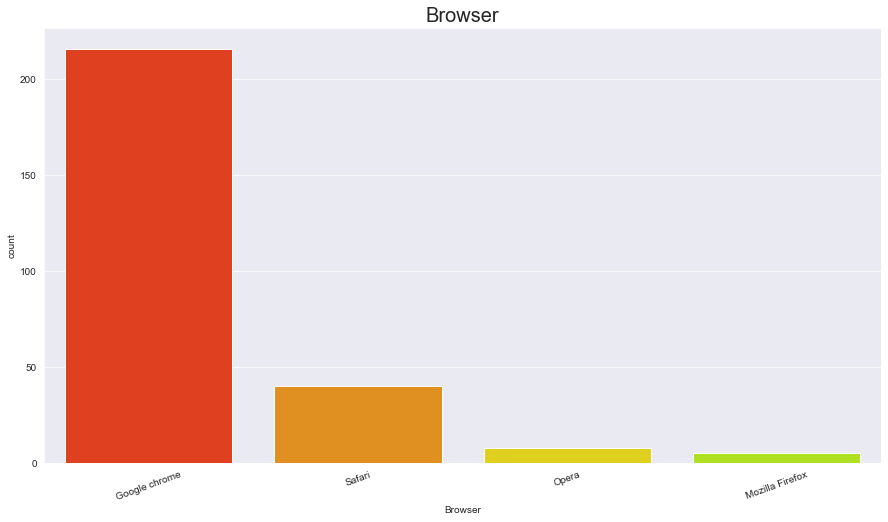

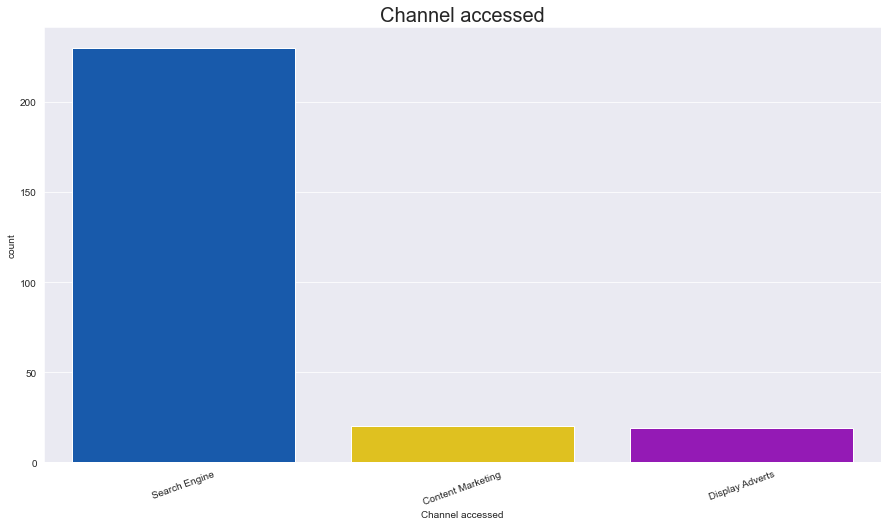

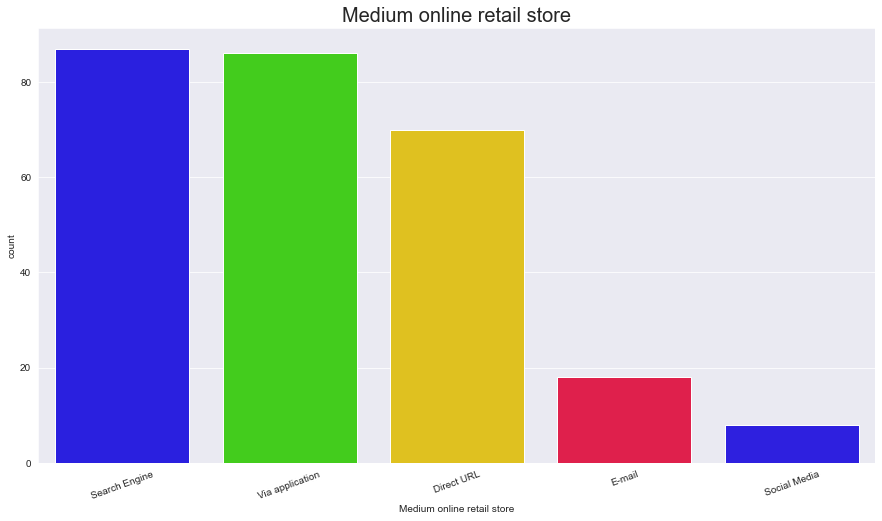

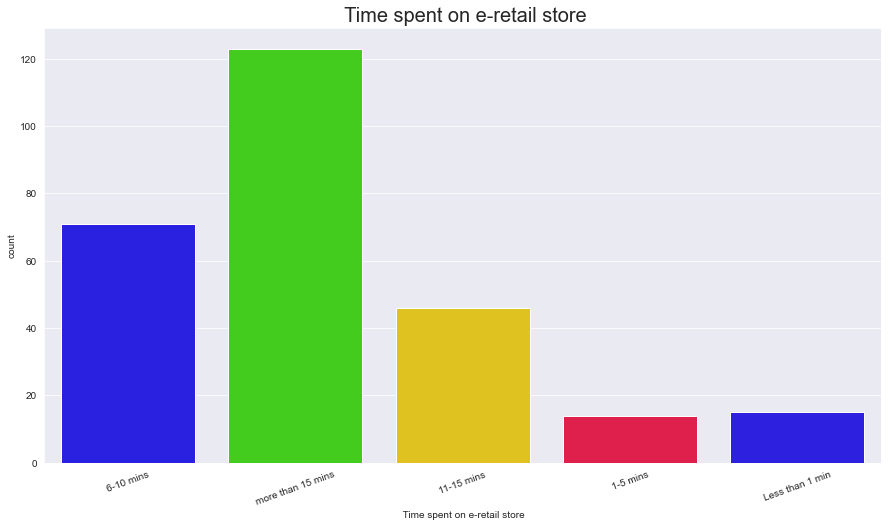

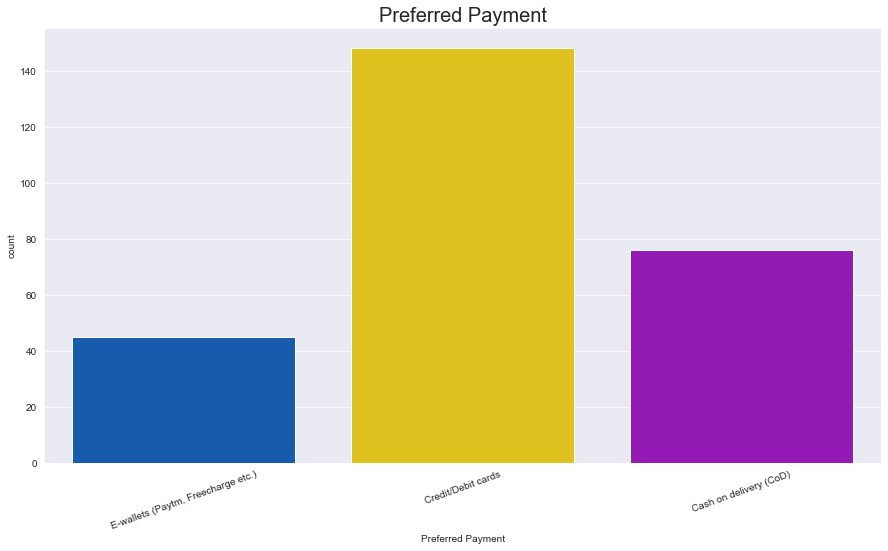

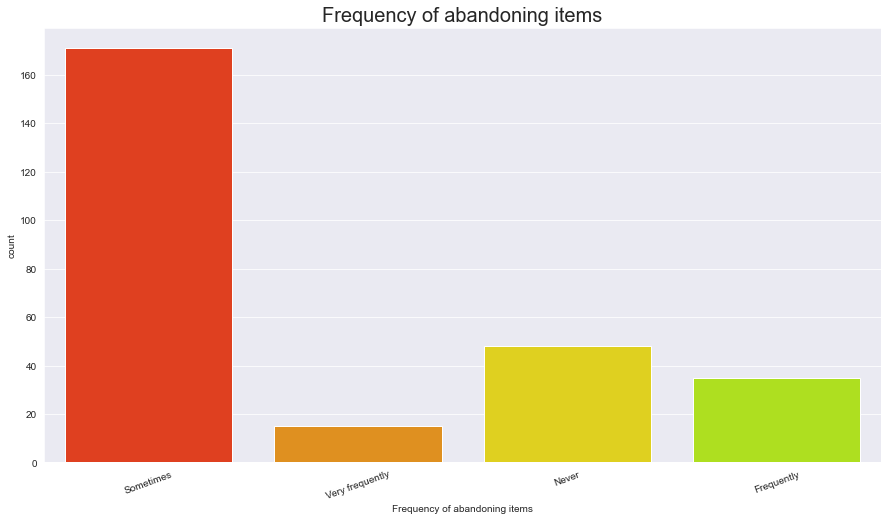

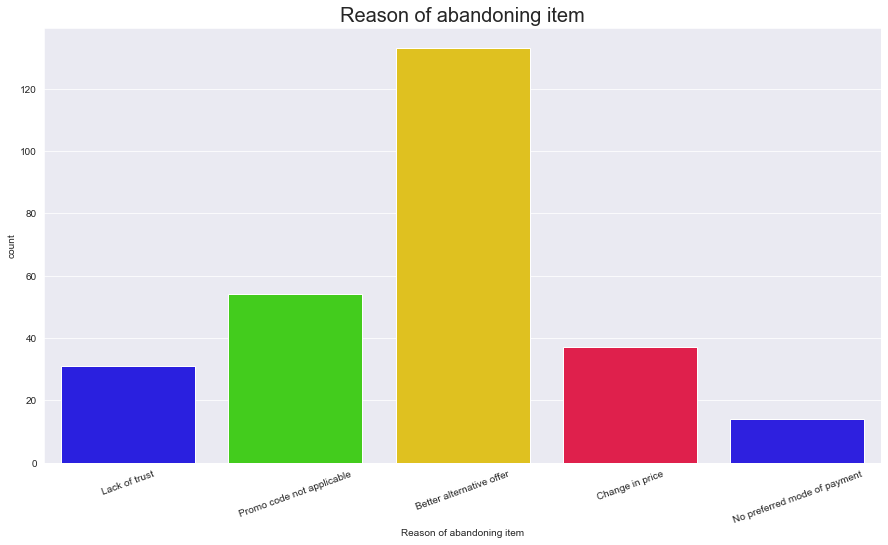

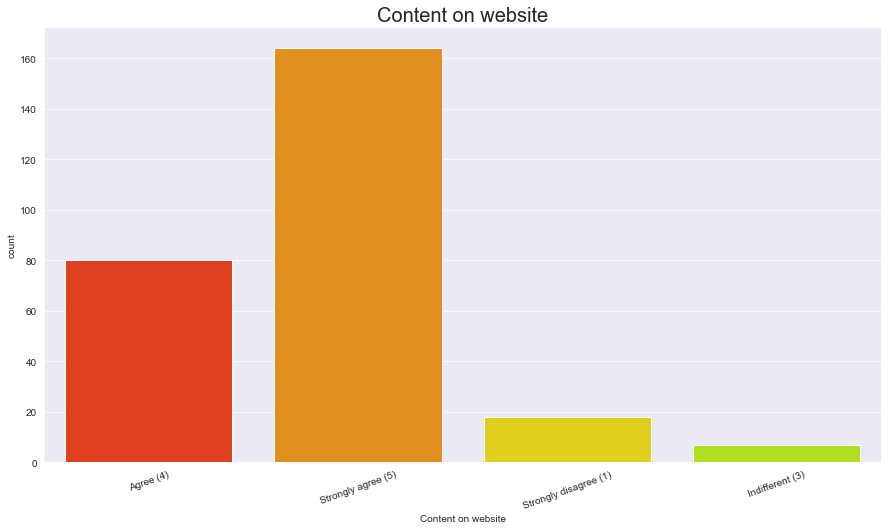

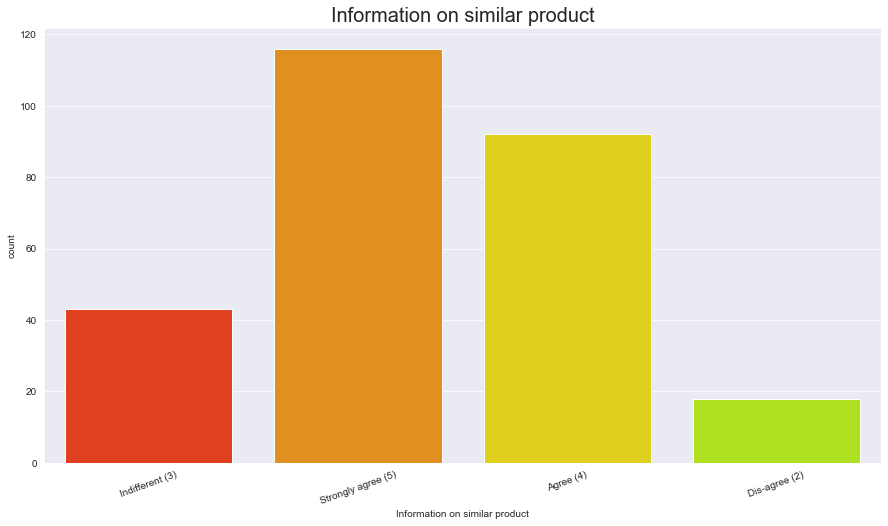

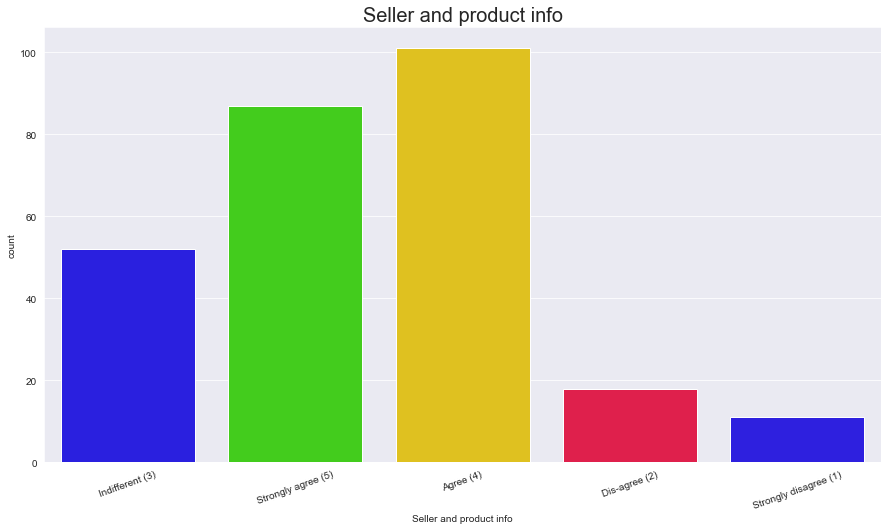

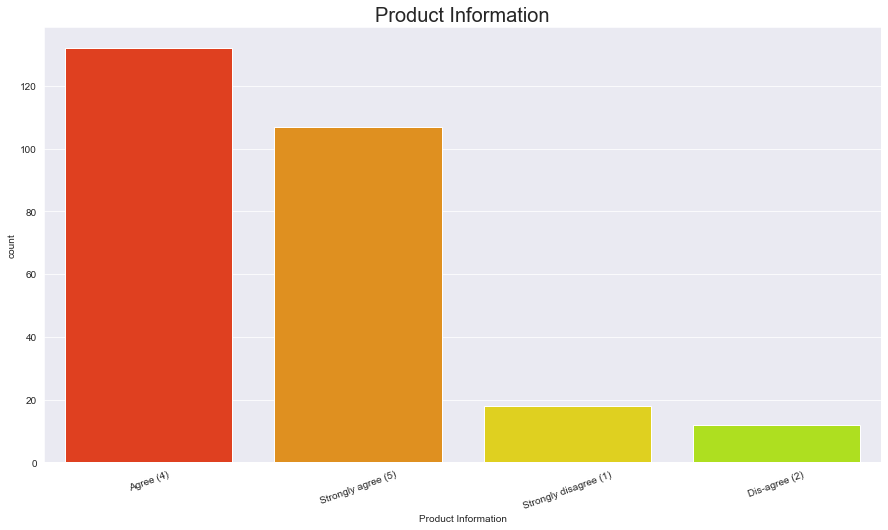

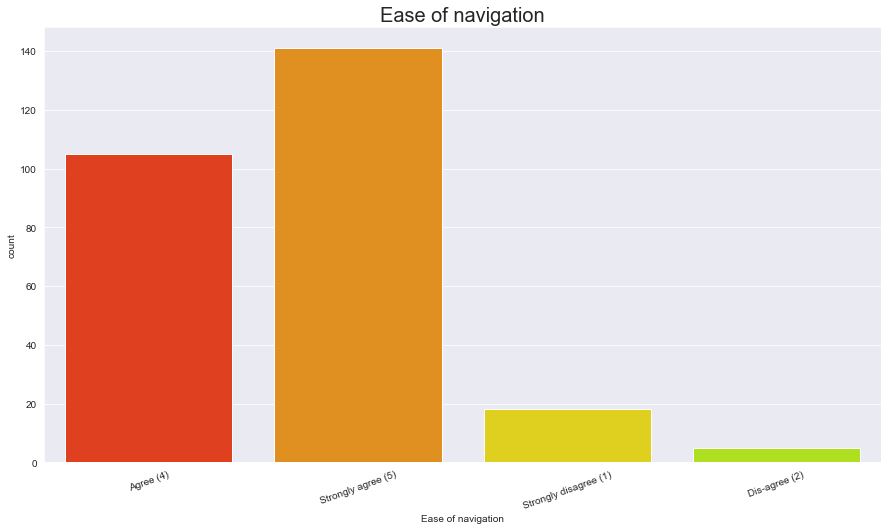

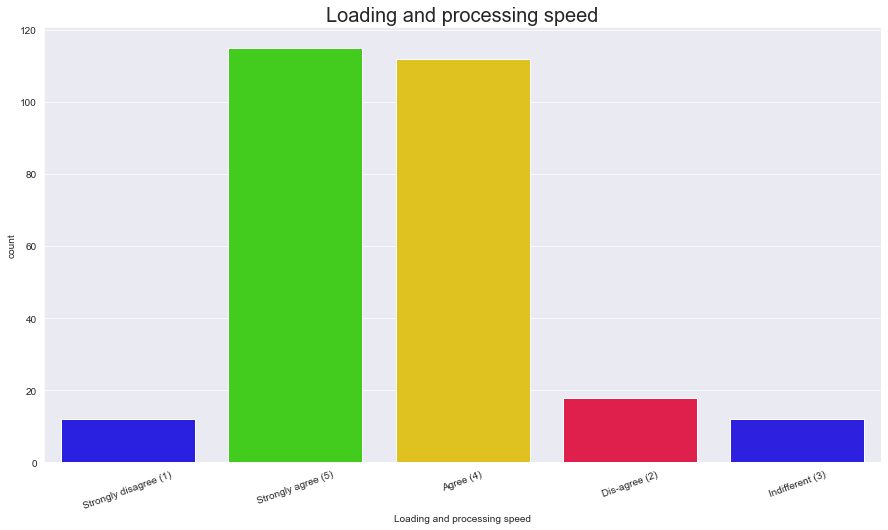

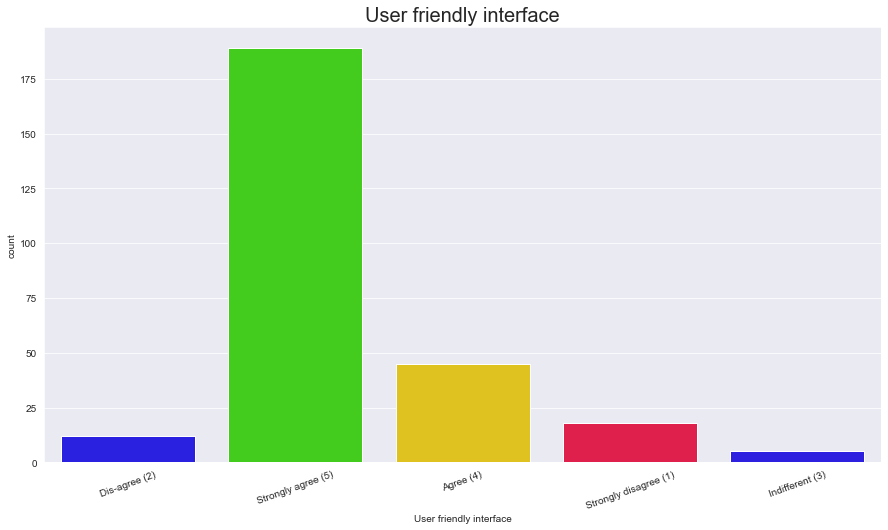

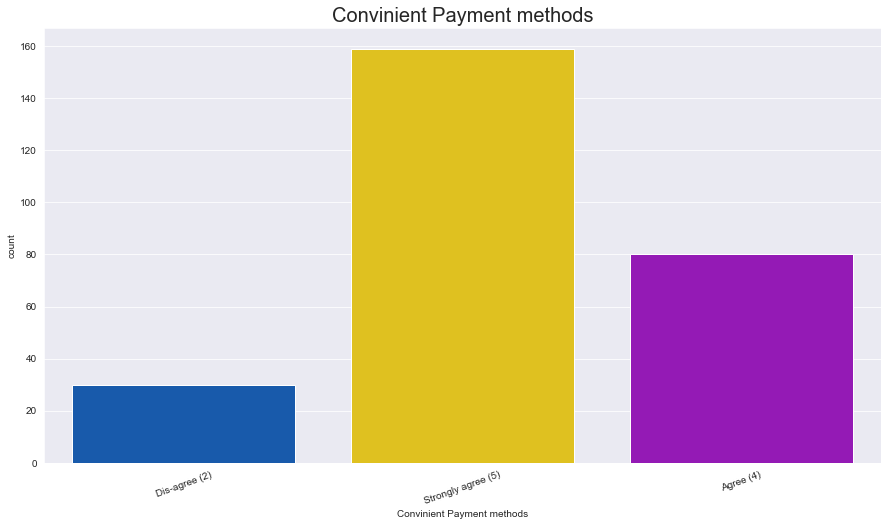

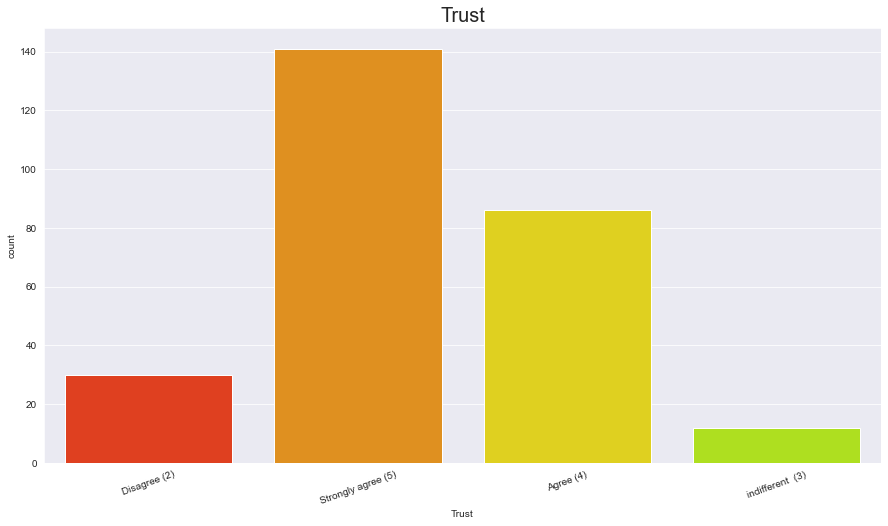

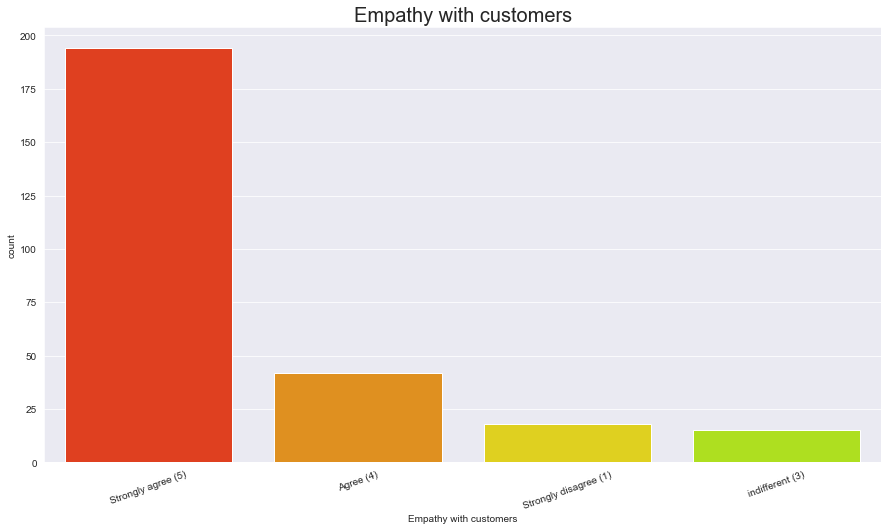

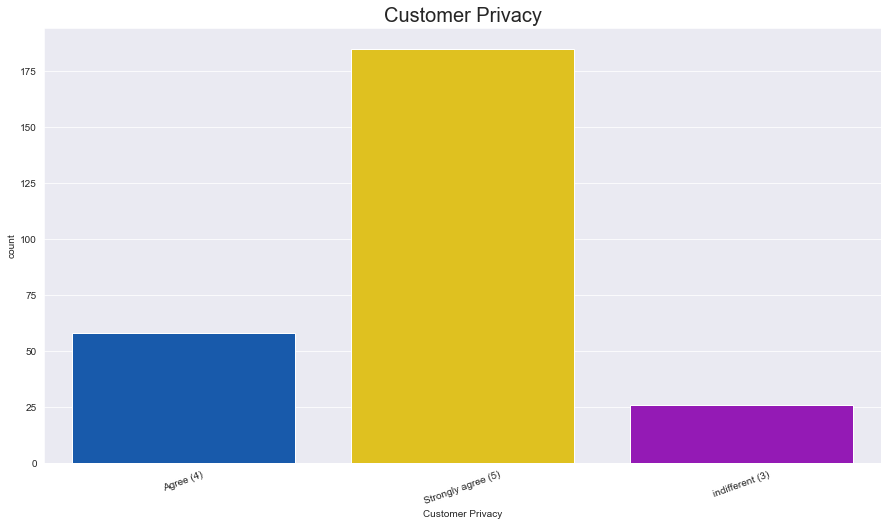

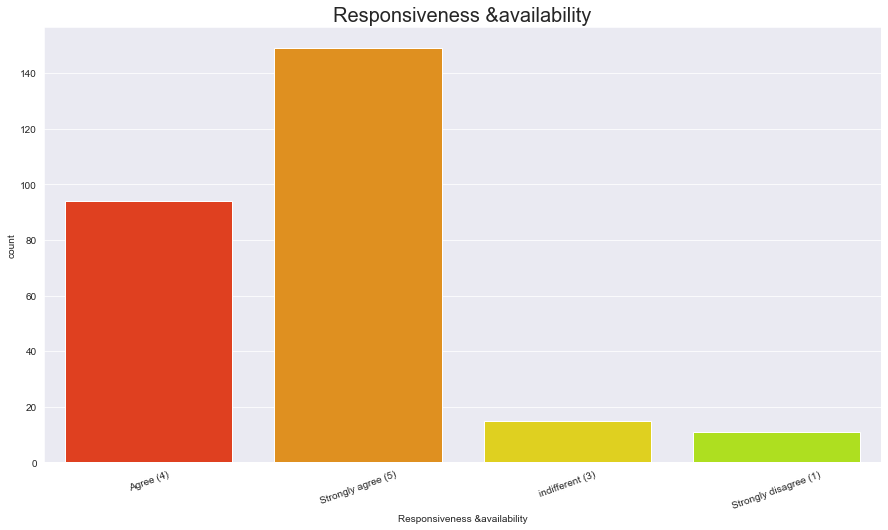

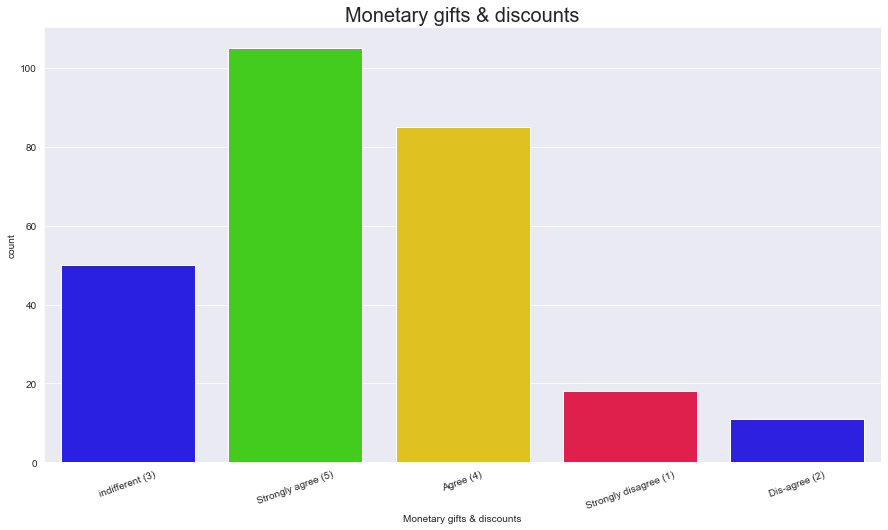

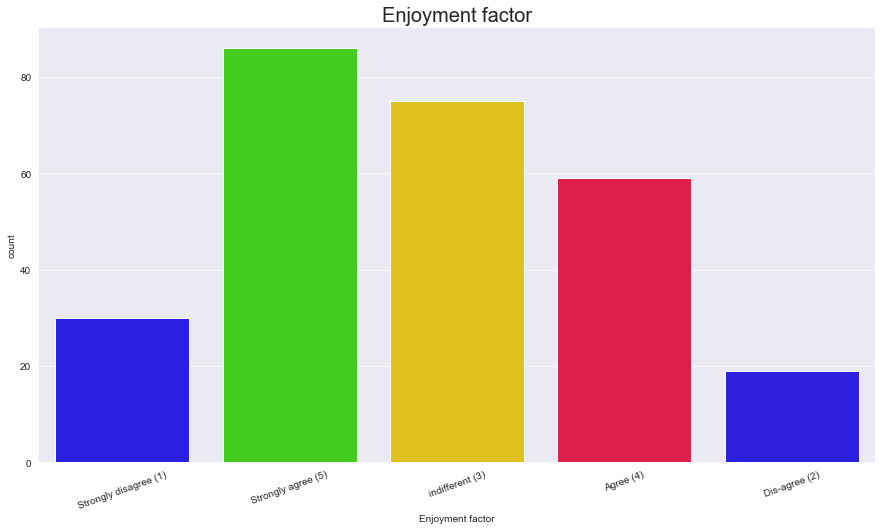

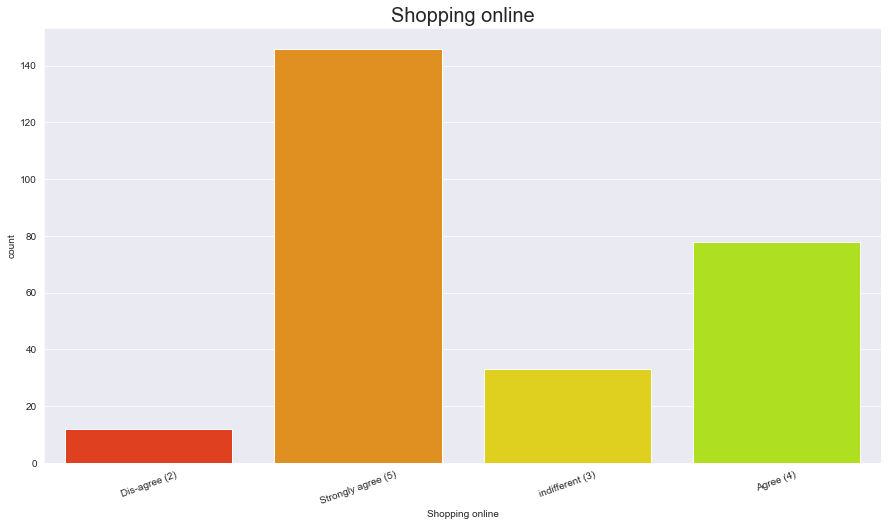

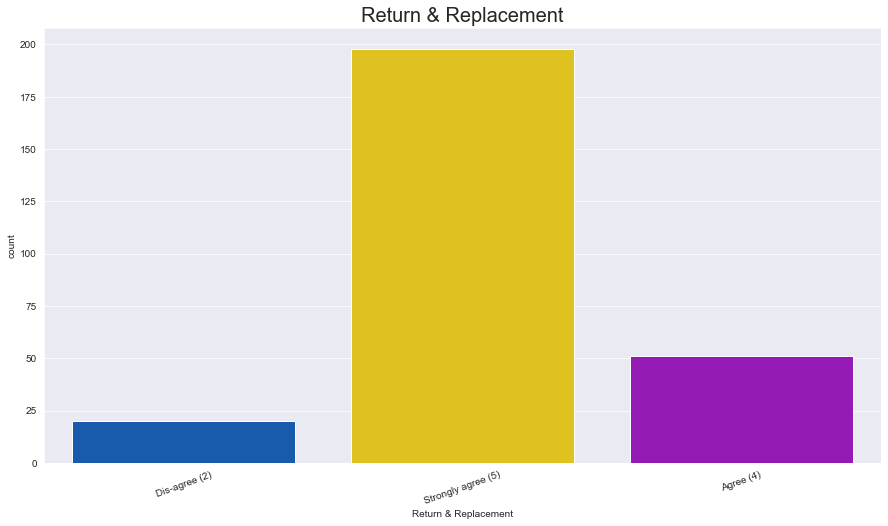

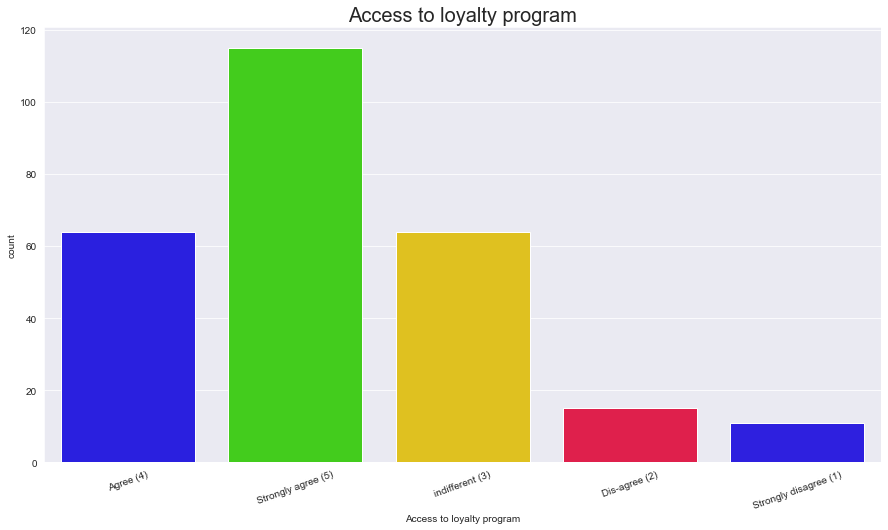

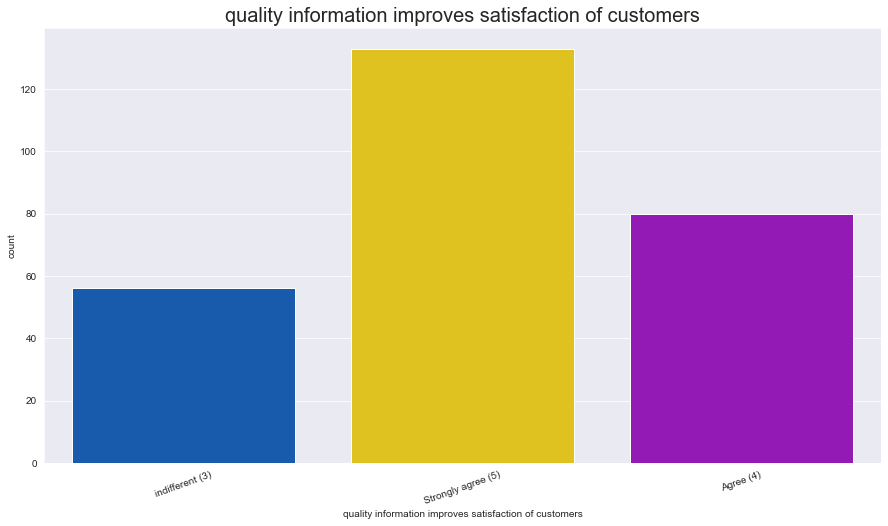

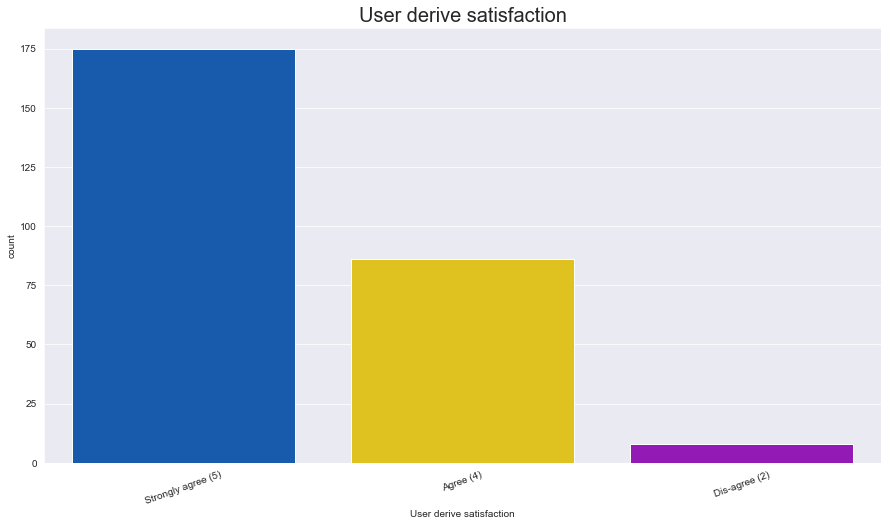

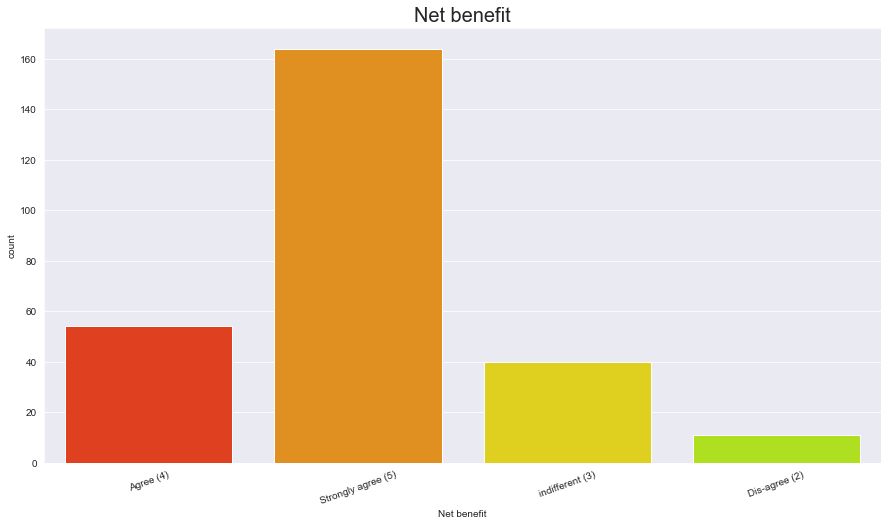

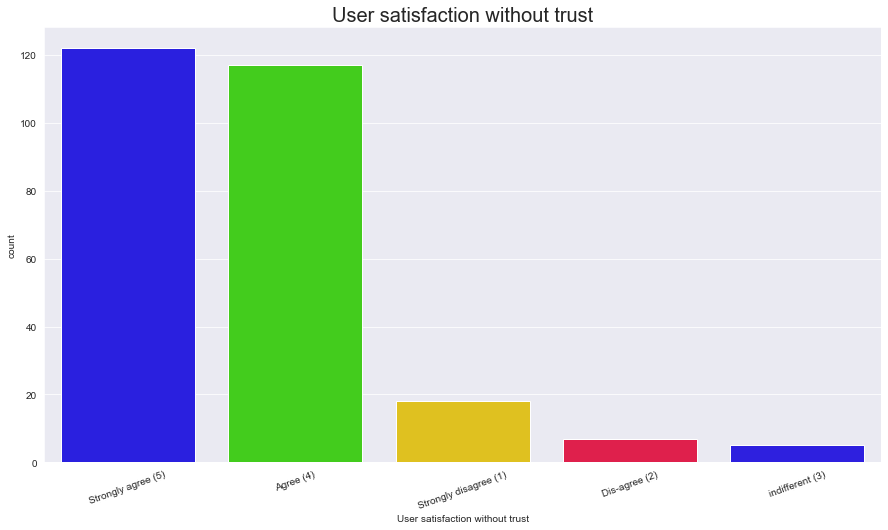

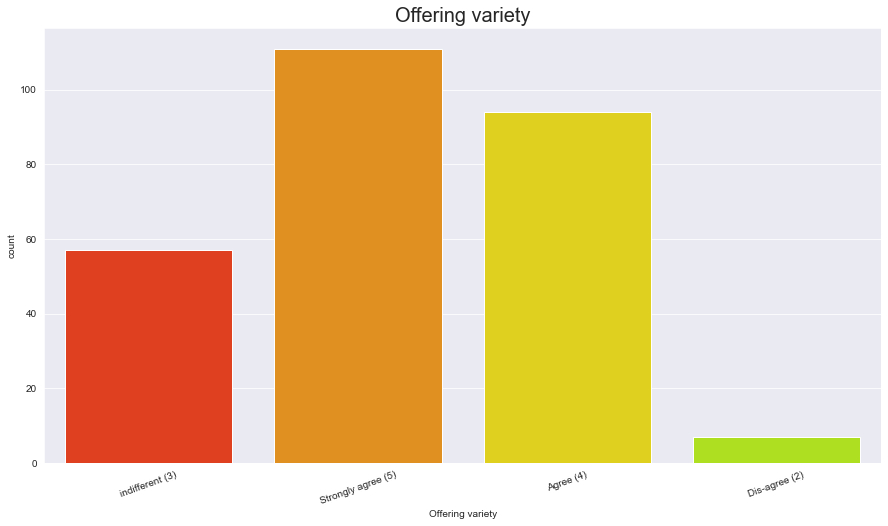

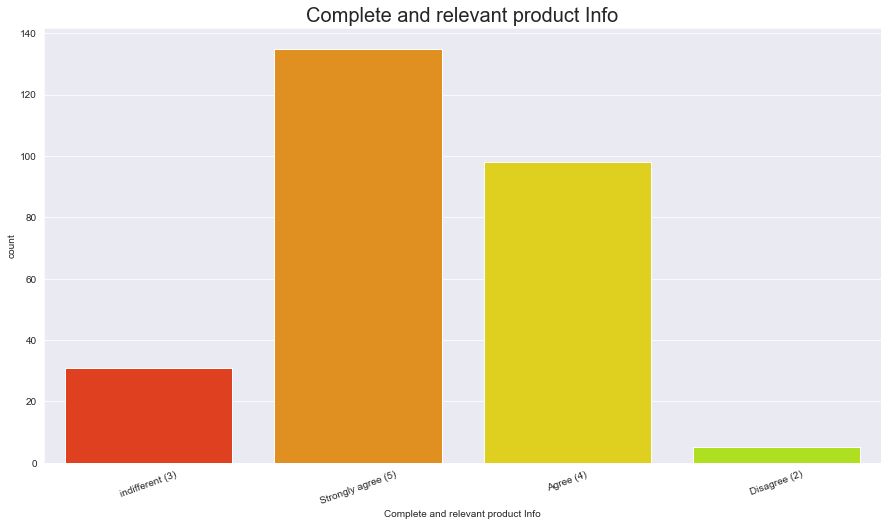

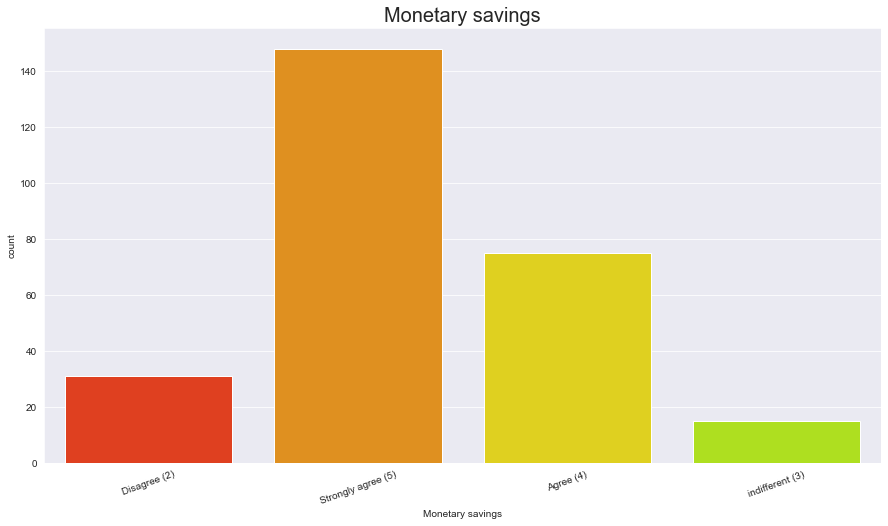

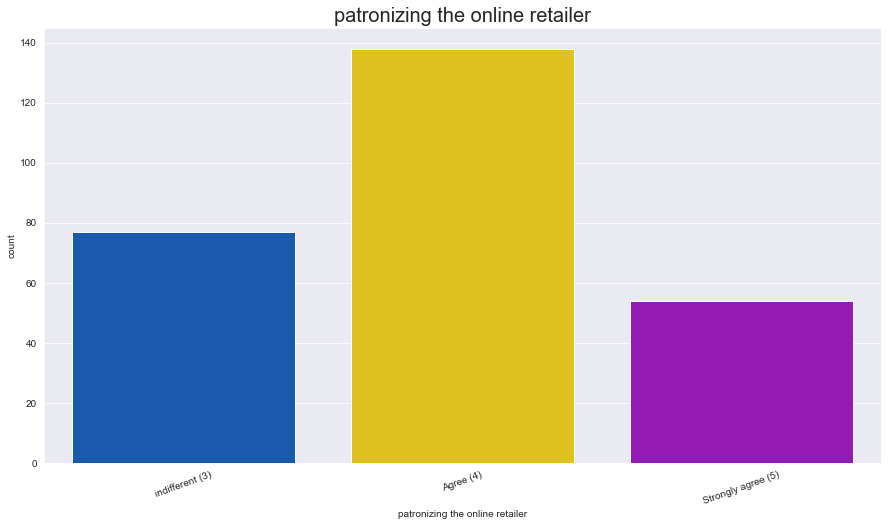

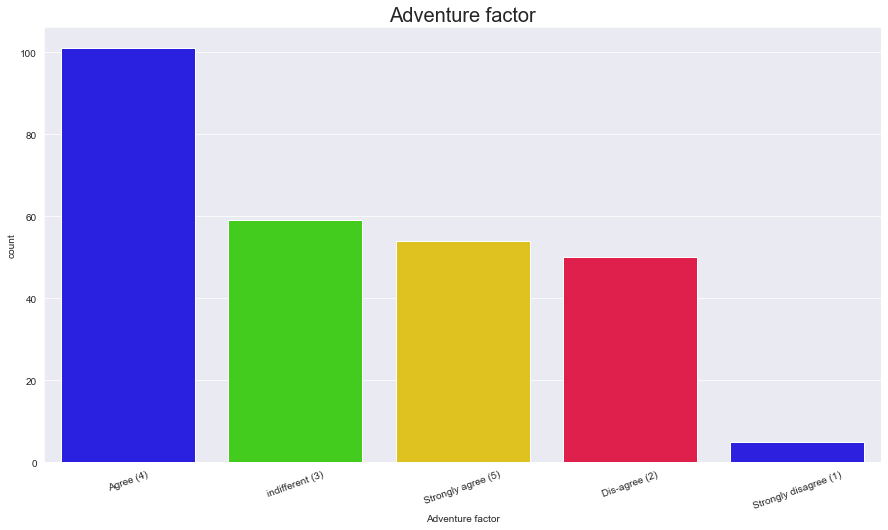

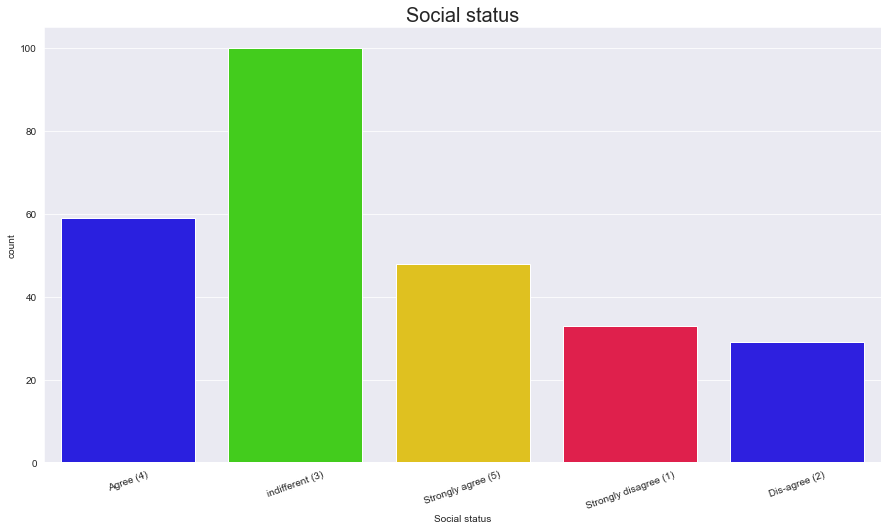

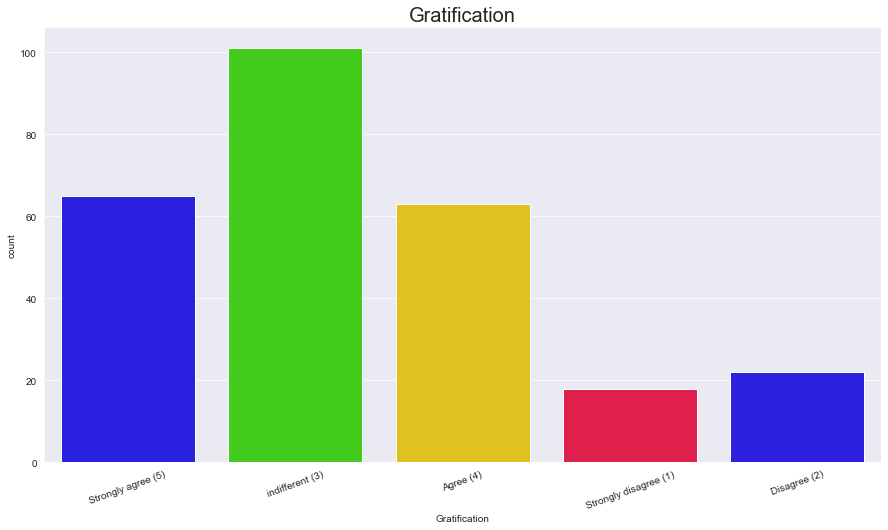

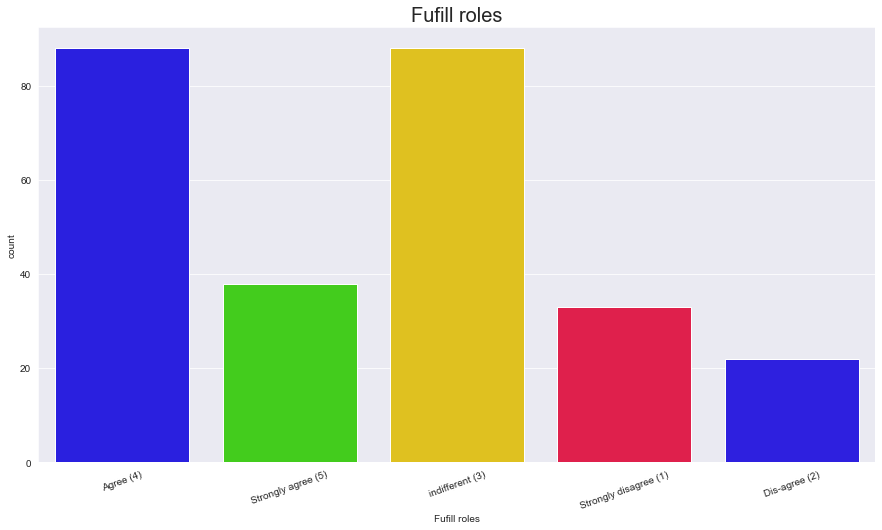

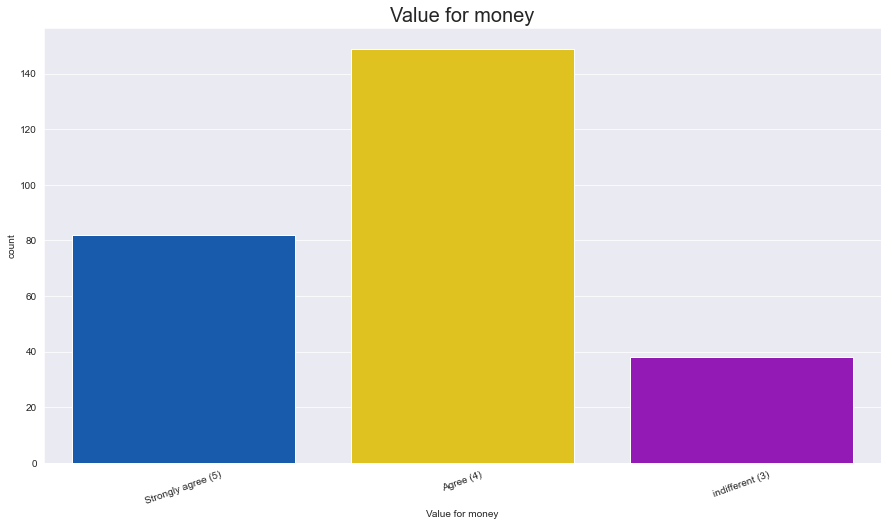

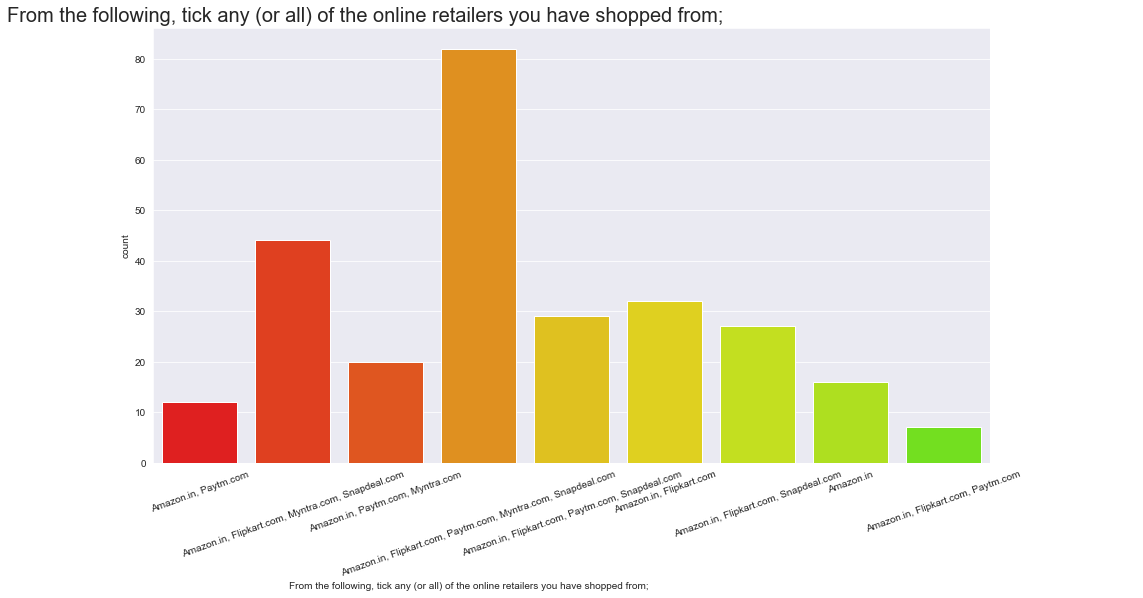

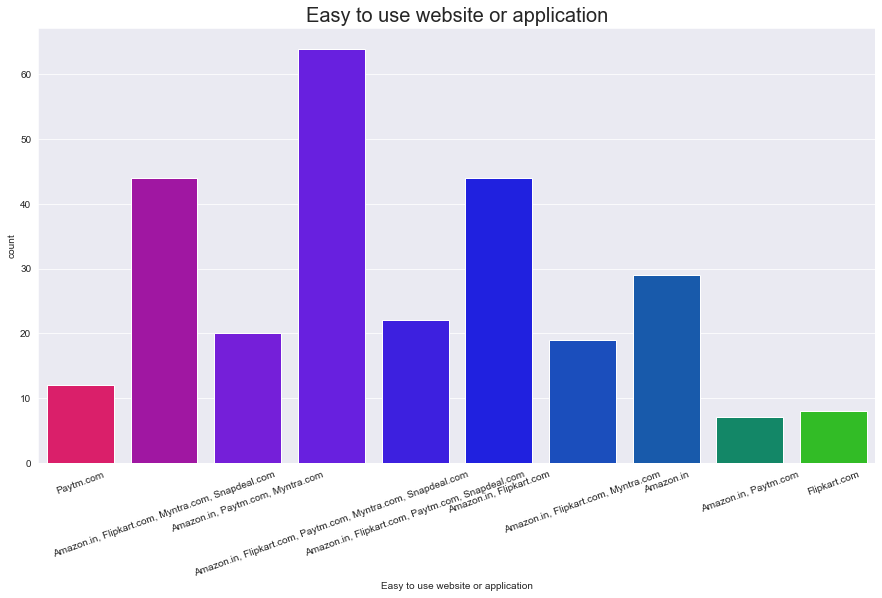

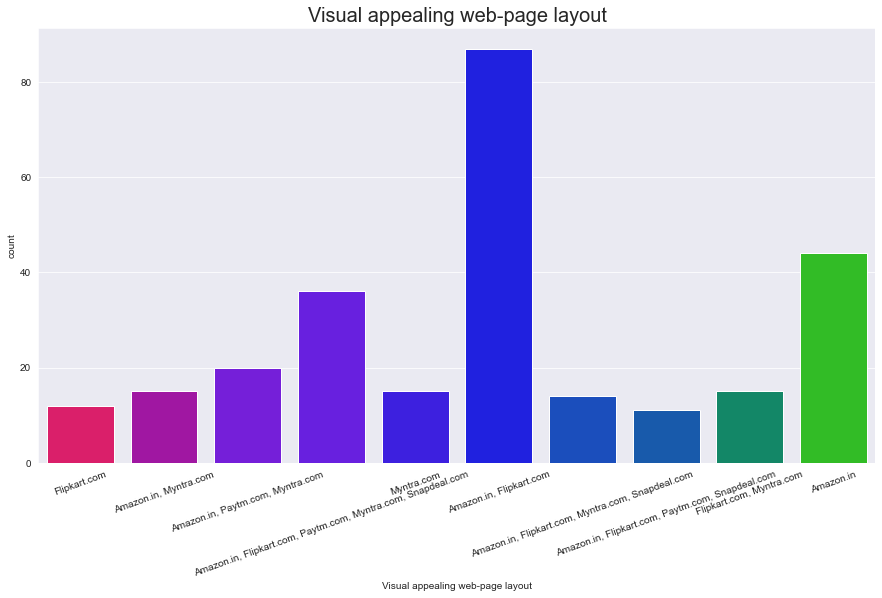

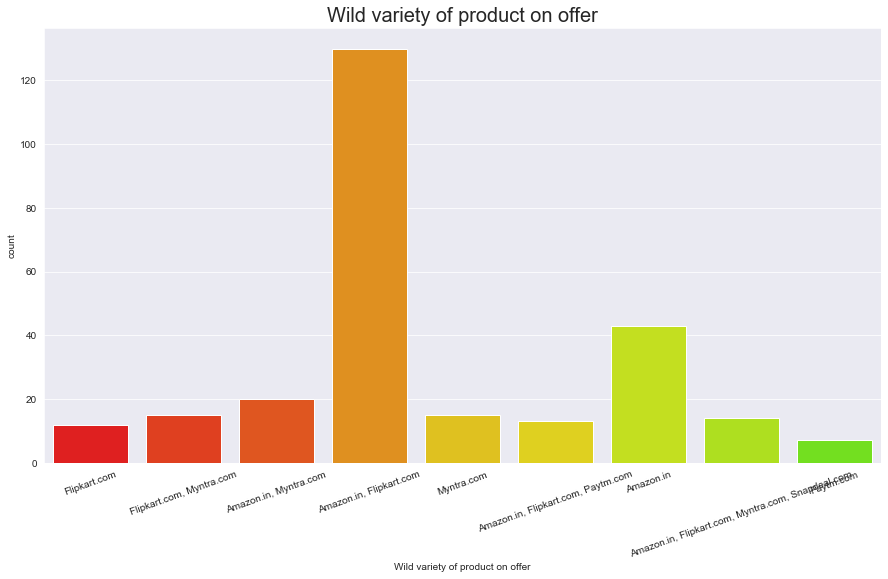

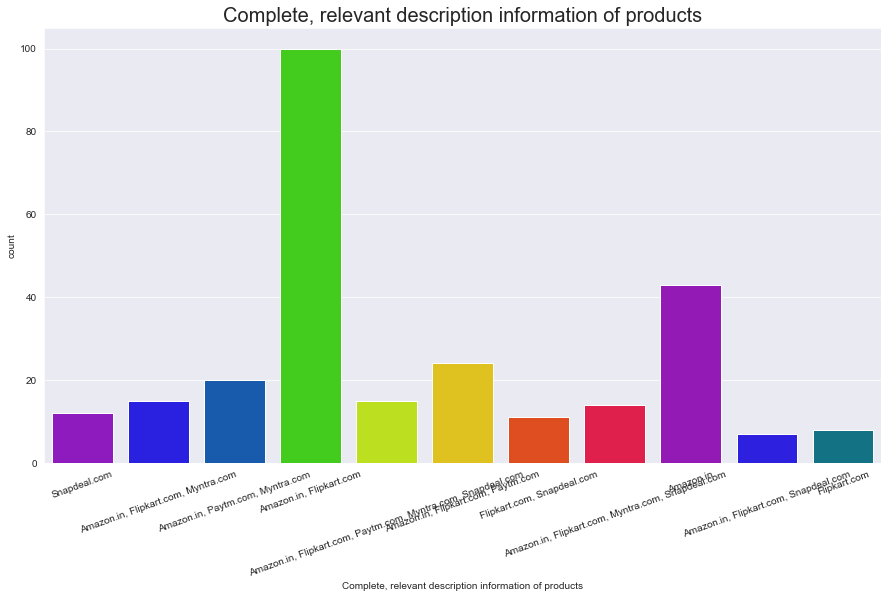

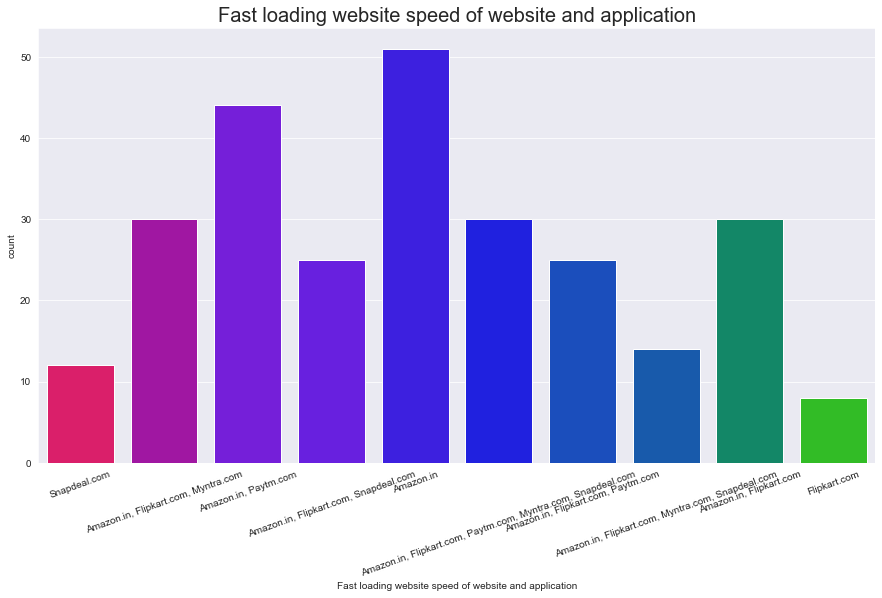

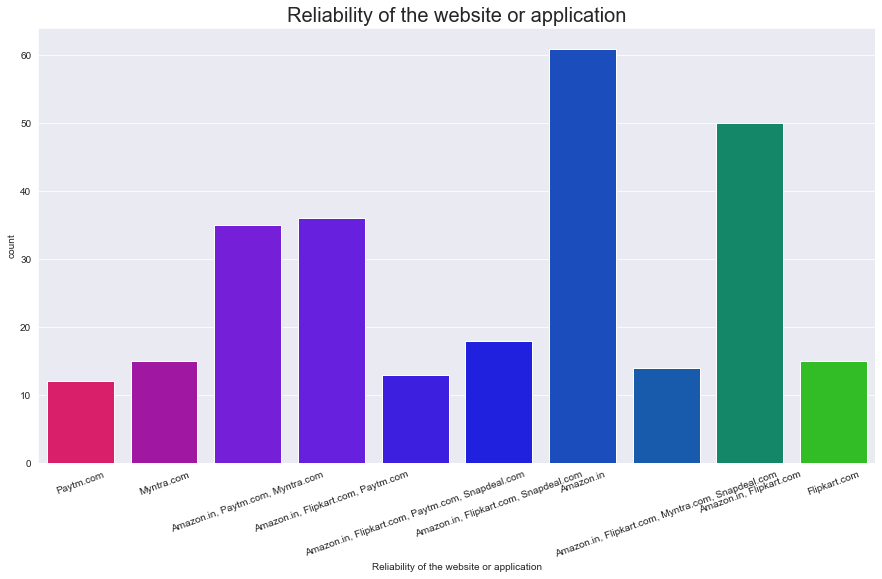

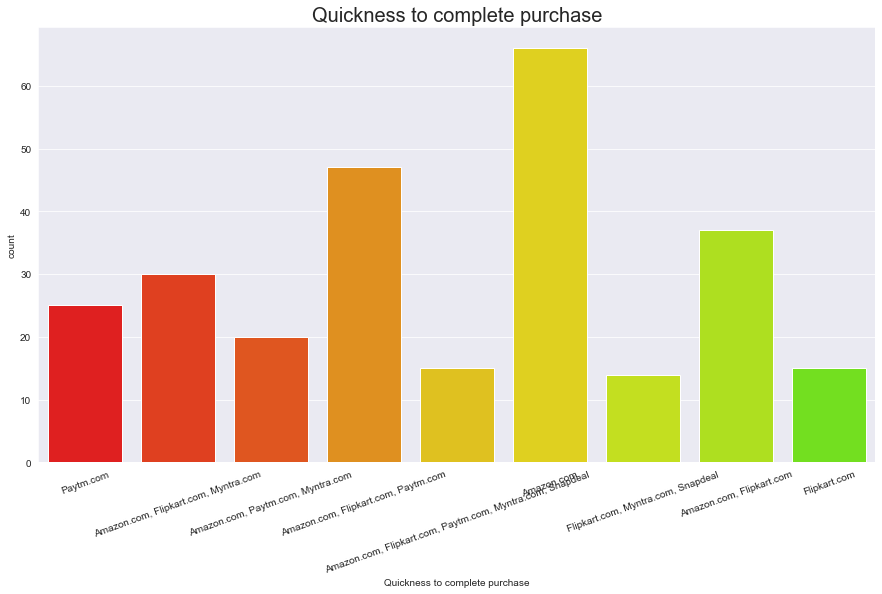

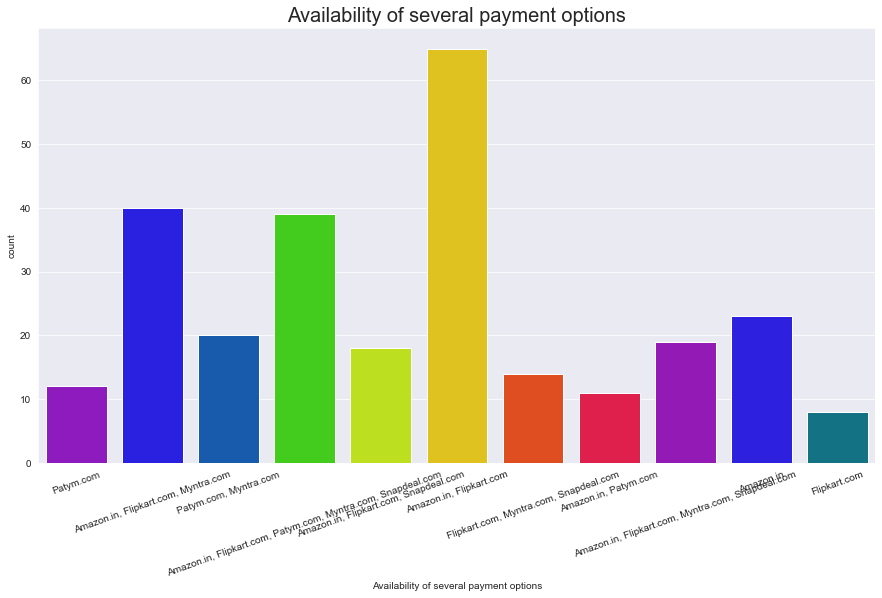

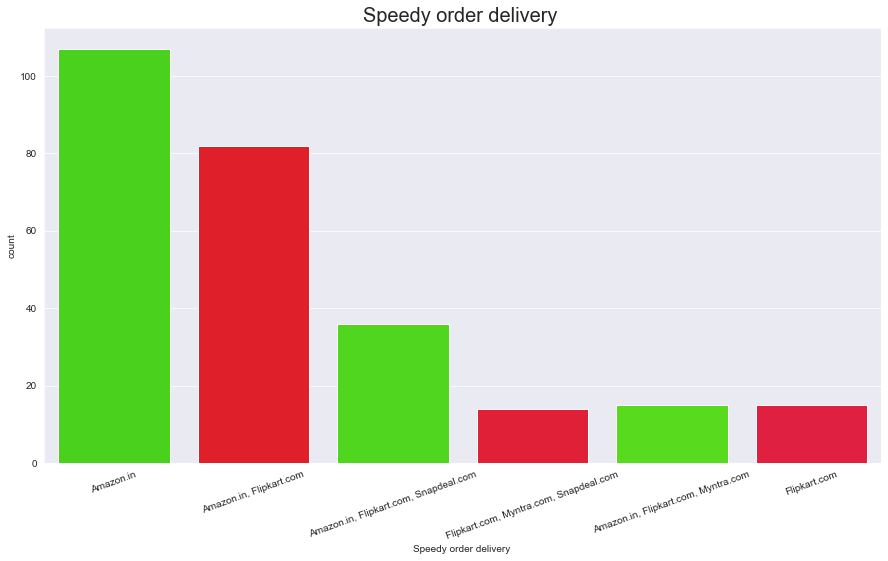

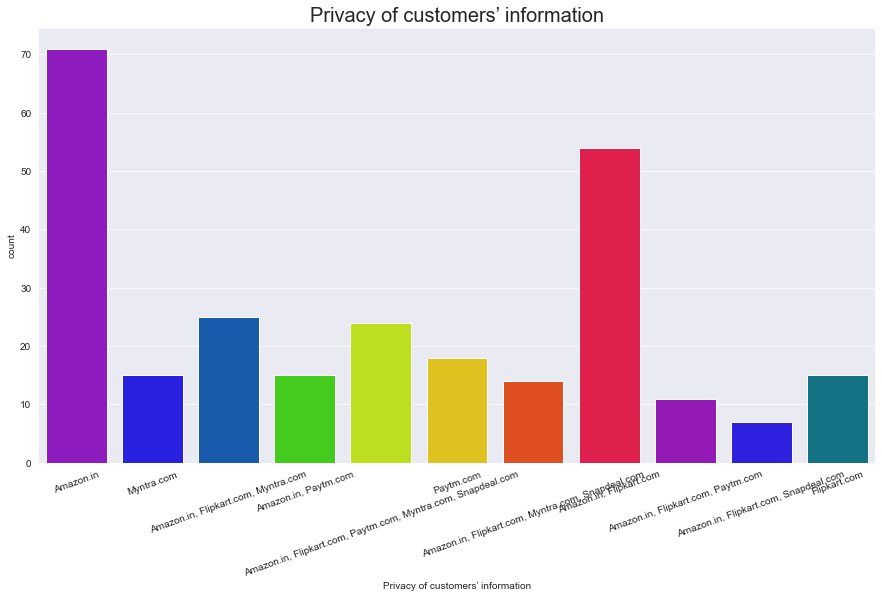

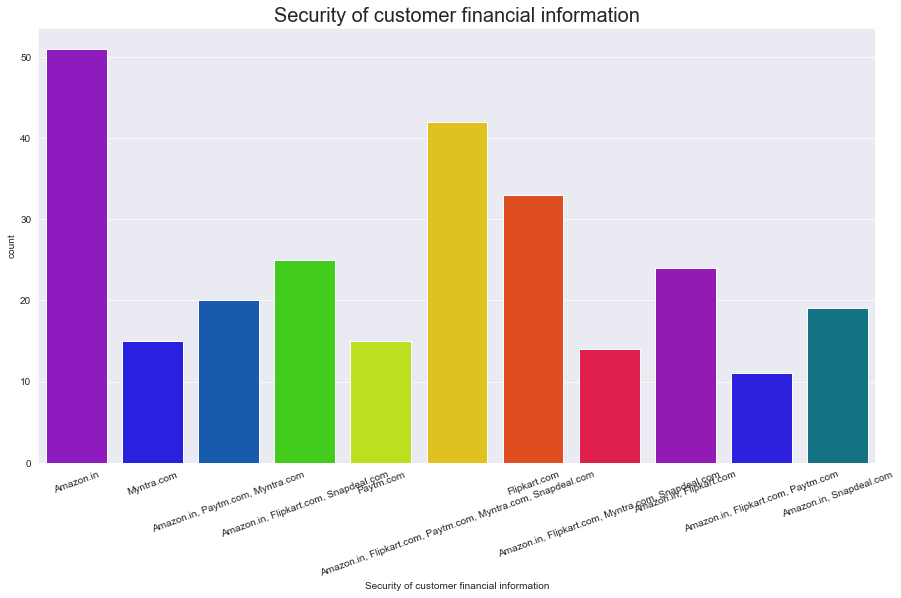

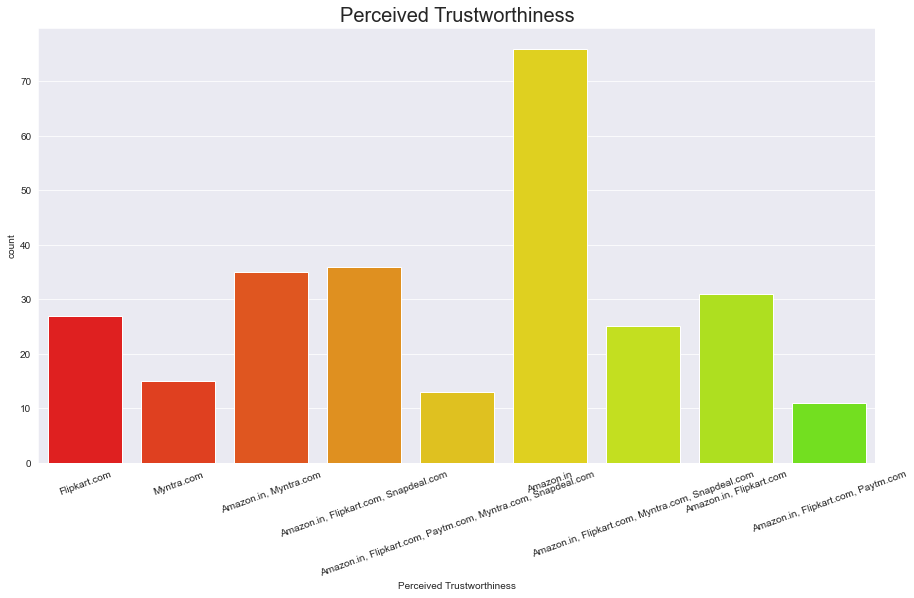

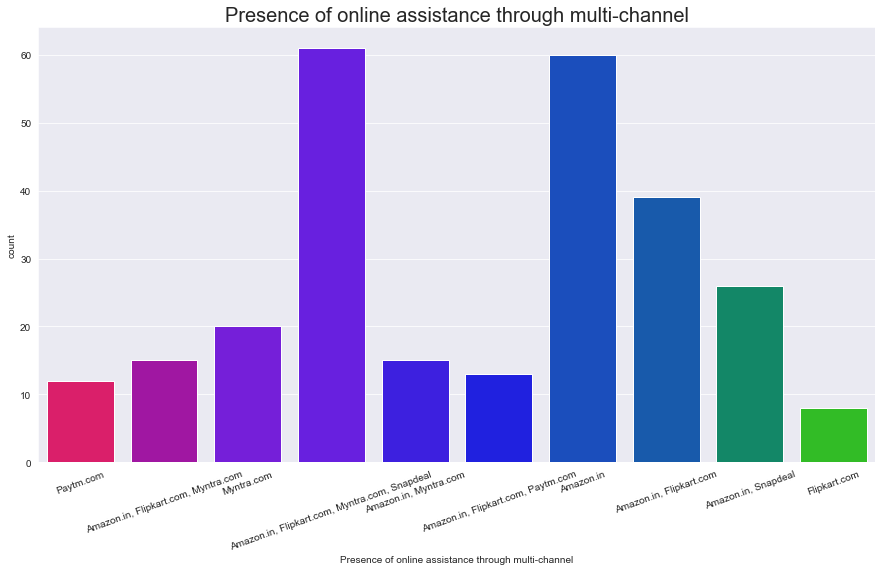

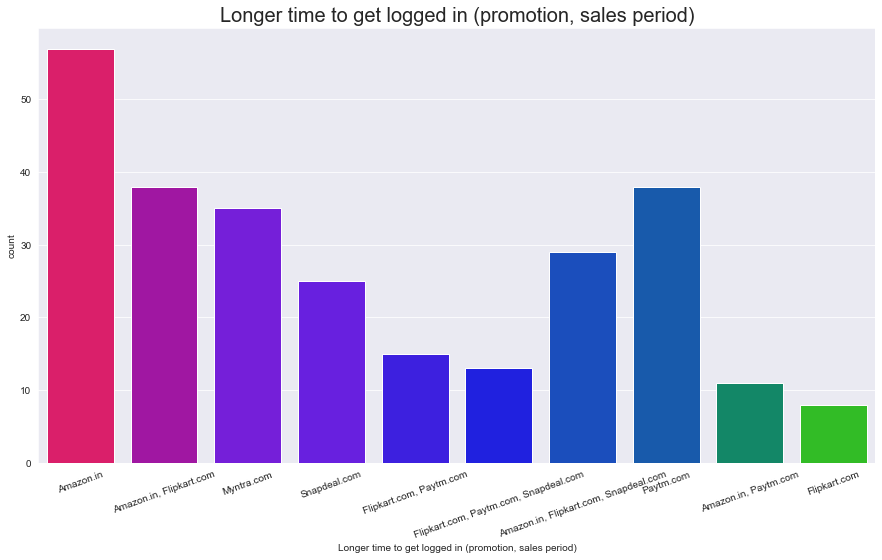

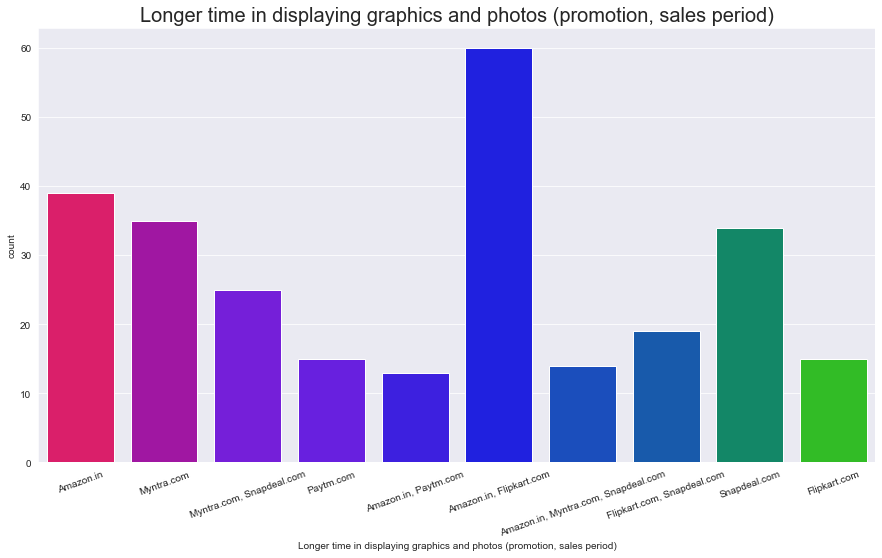

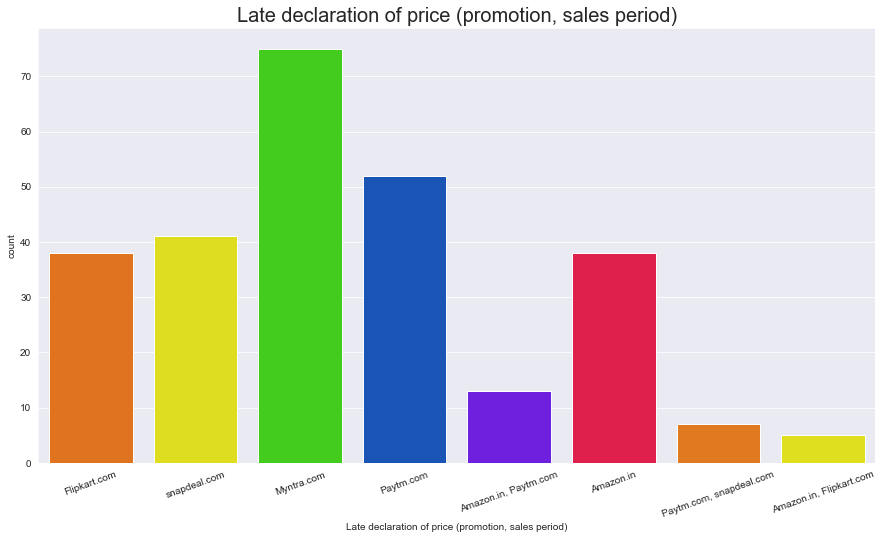

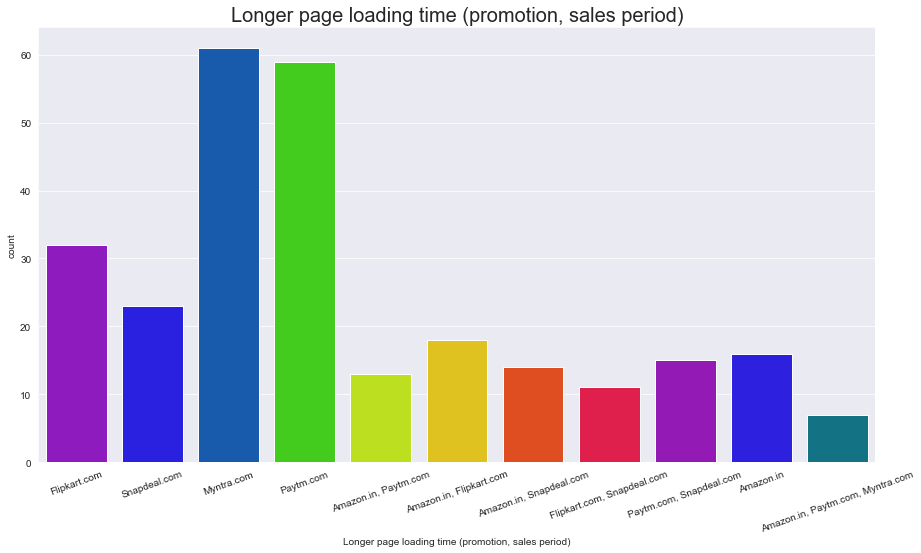

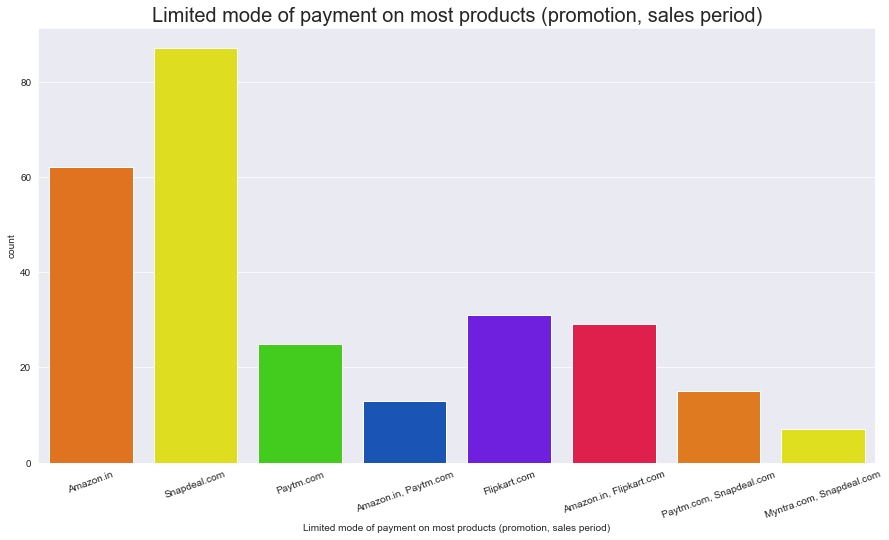

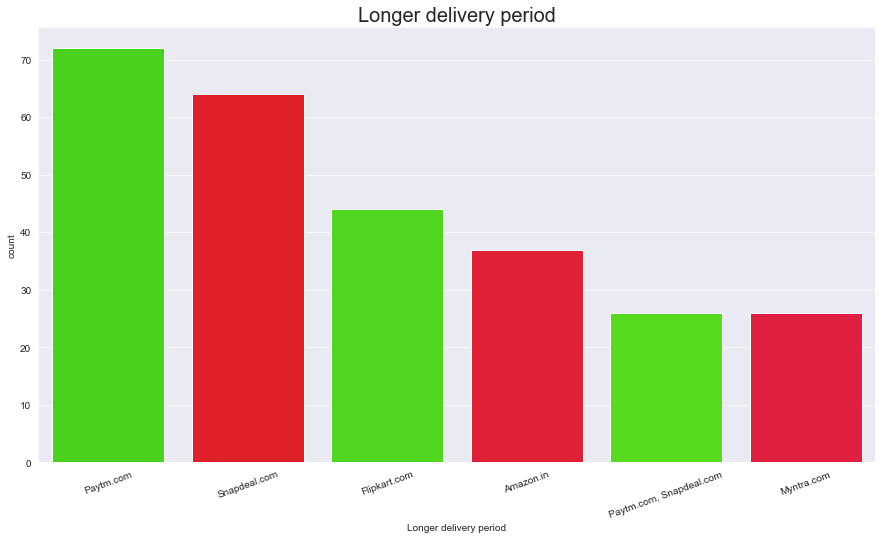

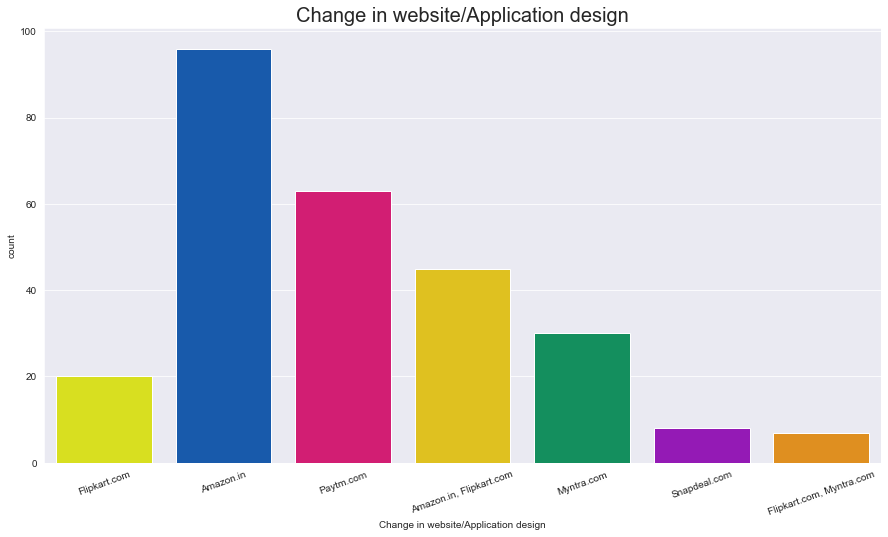

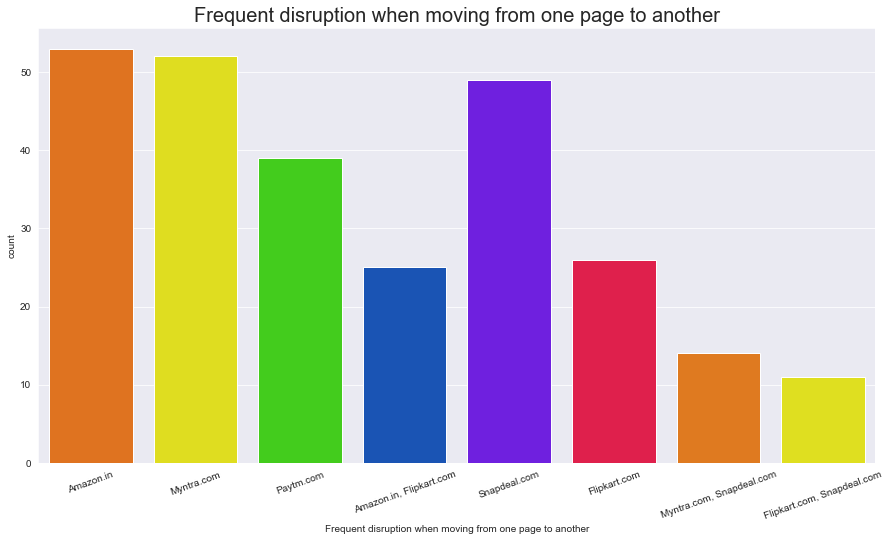

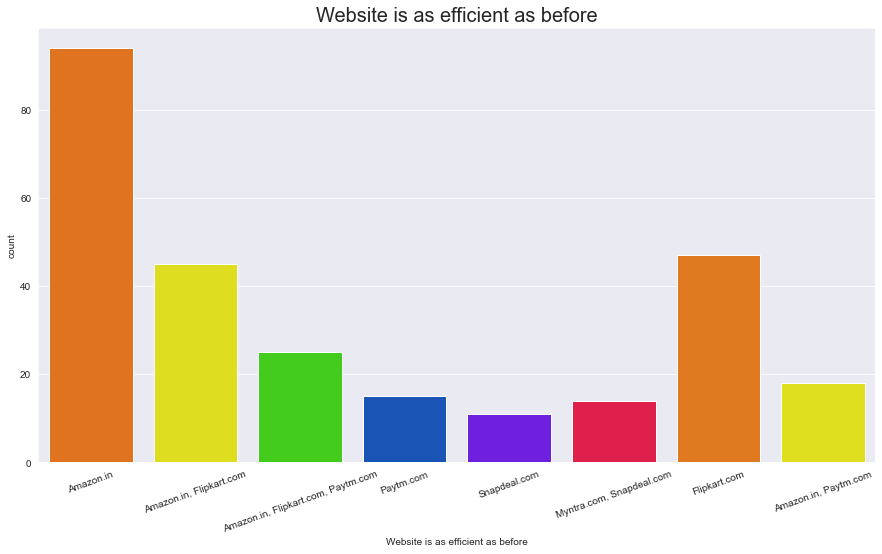

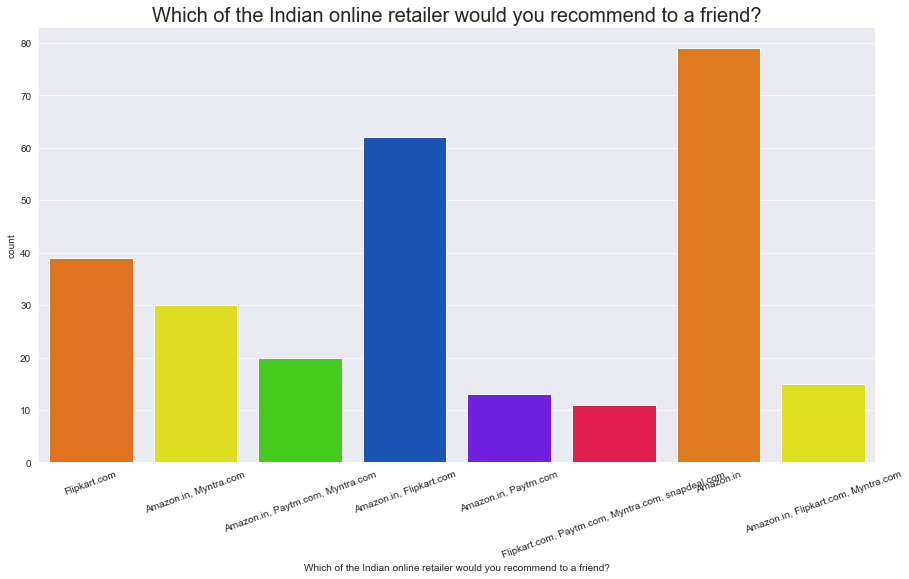

In [14]:
for i in df.columns:
    plt.figure(figsize=(15,8))
    plt.title(i,fontsize=20)
    sns.countplot(df[i],palette='prism')
    plt.xticks(rotation = 20)
    plt.show()

#### Observations

- Females shop more than males, hence they're the target audience. 


- People in age group of 31-40 years shop the most and least is done by 51 years age group 


- People in metropolitan cities (Delhi, Greater Noida, Bangalore and Noida) do more online shopping.  


- Customers prefer Card payment option followed by COD. 

- Most of the customers strongly agree that 

 - content on the website must be easy to read and understand,

 - Must have all the information on listed seller and product, 

 - There must be ease of navigation in website,

 - Must have convenient payment method,

 - must have empathy towards the customers 

 - online shopping gives monetary benefit and discounts

 - There must be return and replacement policy of the e-tailer for purchasing


- Customers agree that they are Getting value for money spent 


- They also strongly agree that Amazon.in,Paytm.com and Myntra.com are easy to use and maximum shopping is done from these websites, also they have complete and relevant information of products  


- Amazon and flipkart offer wide variety of products Amazon has fastest delivery followed by flipkart and myntra. Also they are highly satisfactory in terms of privacy of customer information. 


- Moreover Amazon website is best since its extremly efficient. Snapdeal provides limited mode of payment and has frequent disruption on moving from one page to other. Most of the people would refer Amazon to others.

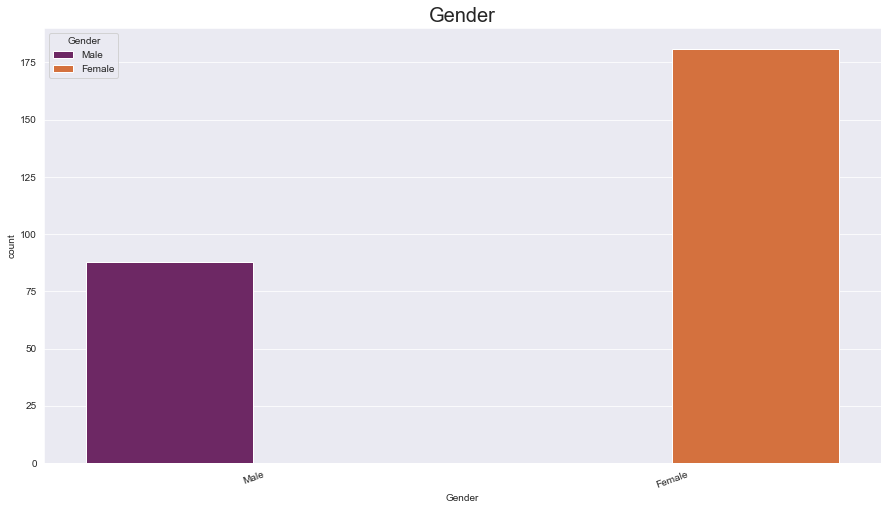

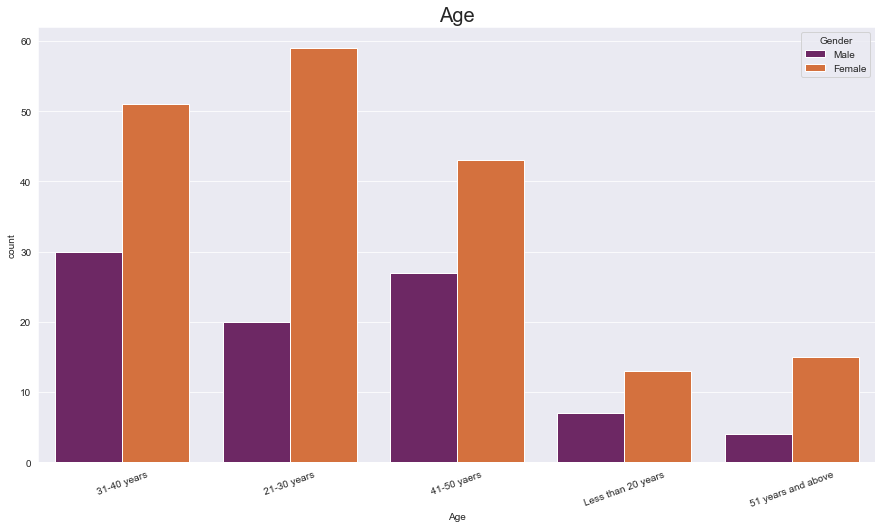

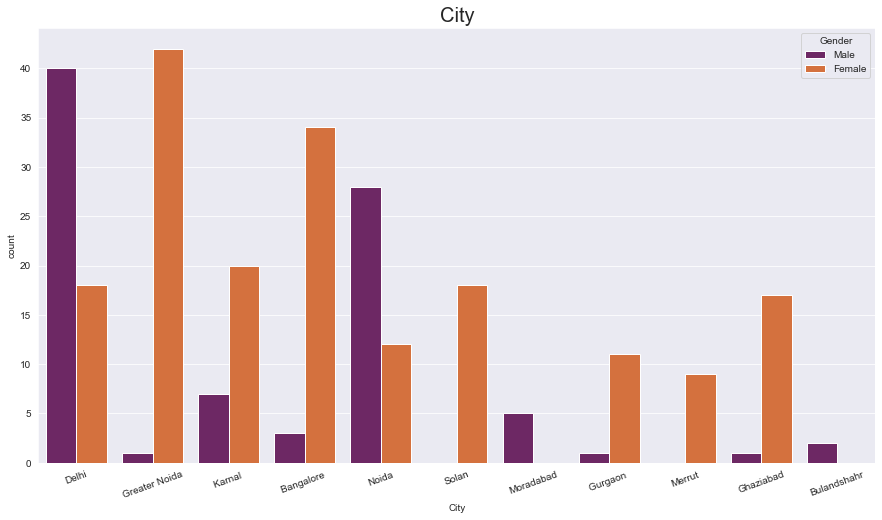

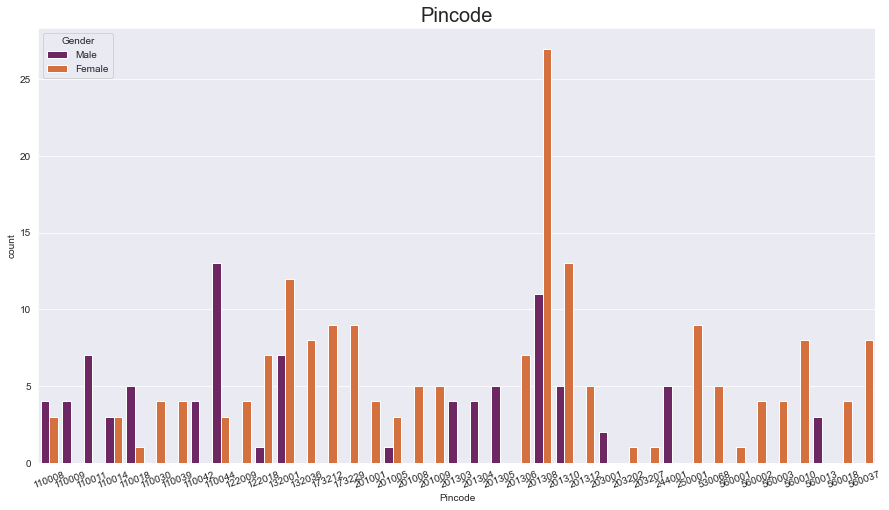

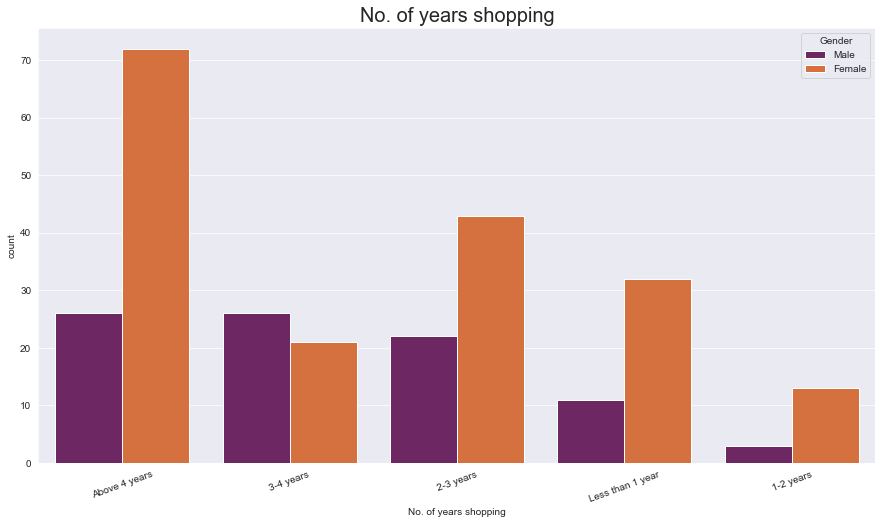

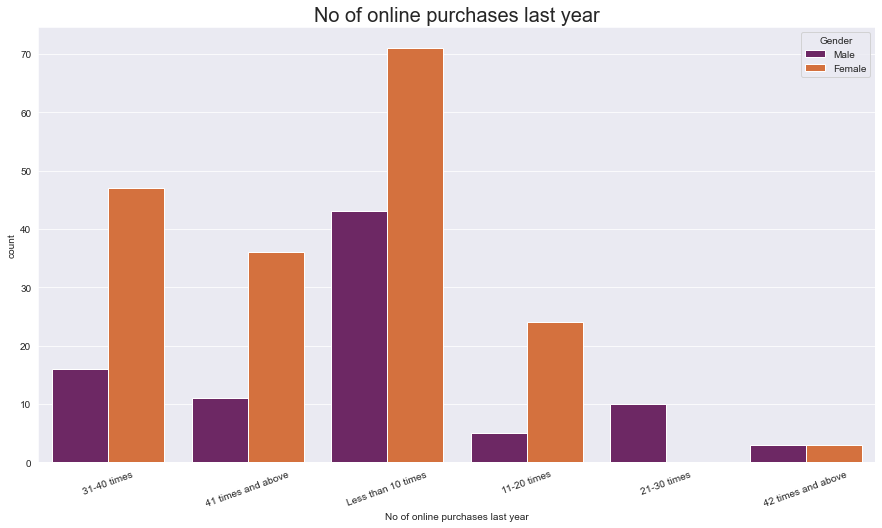

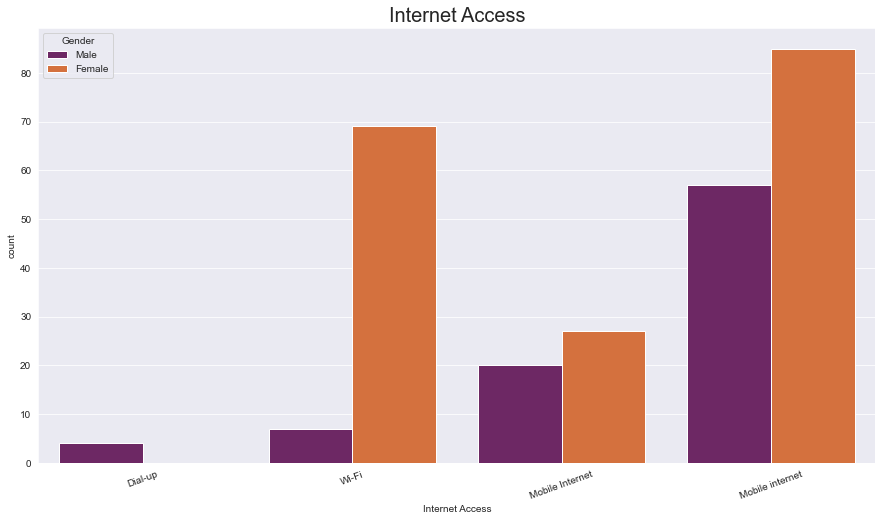

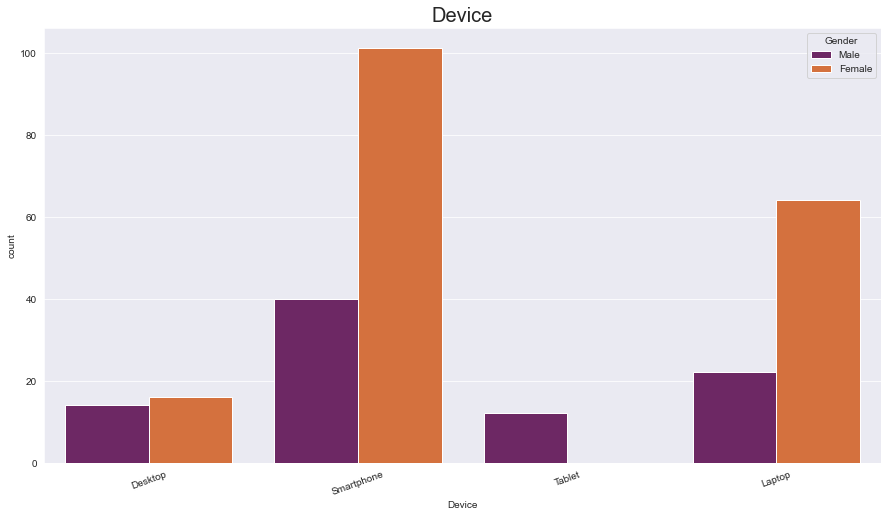

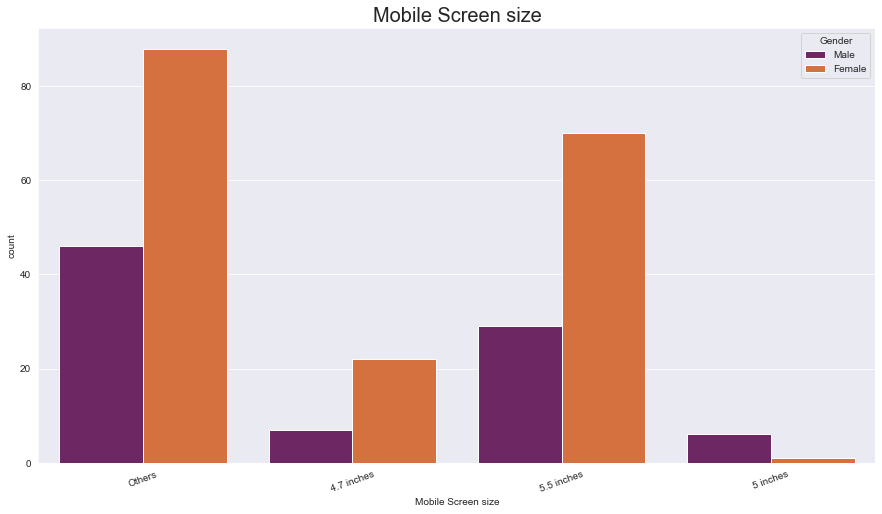

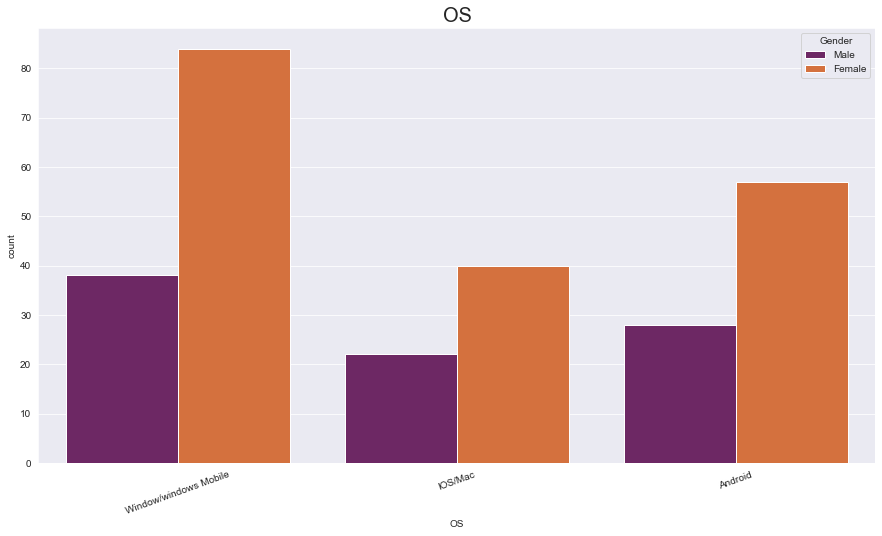

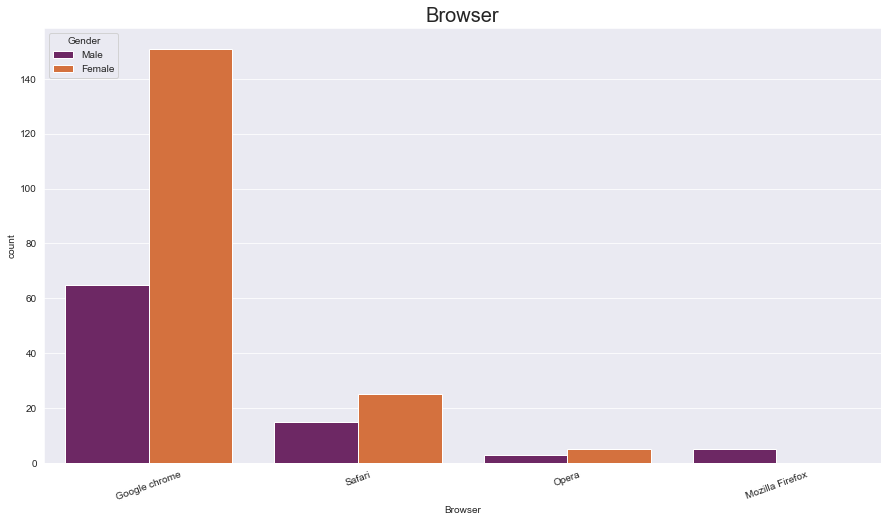

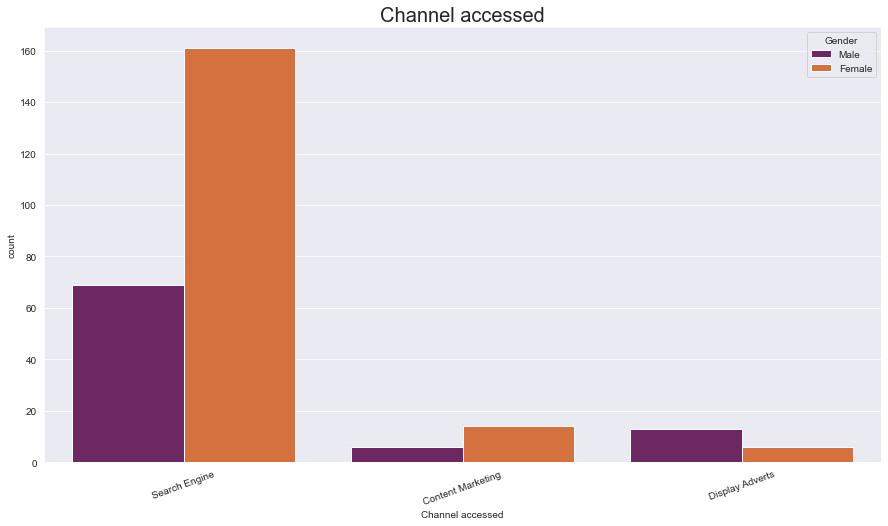

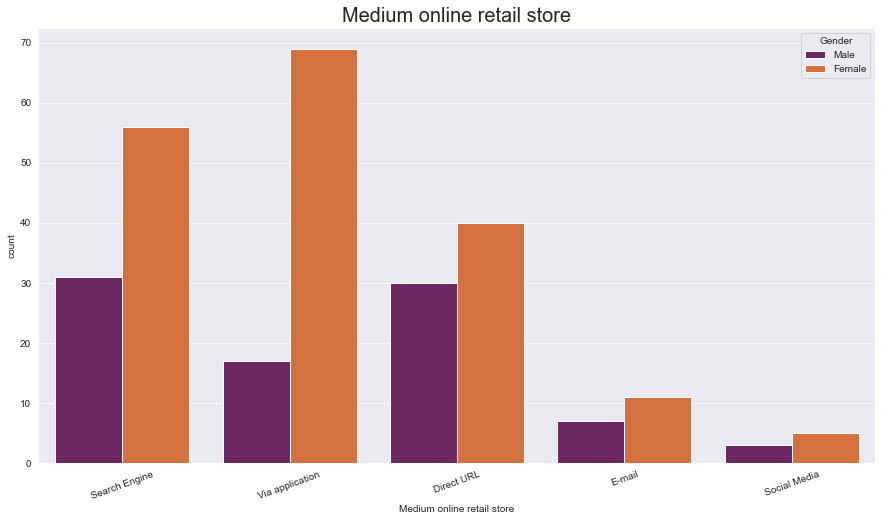

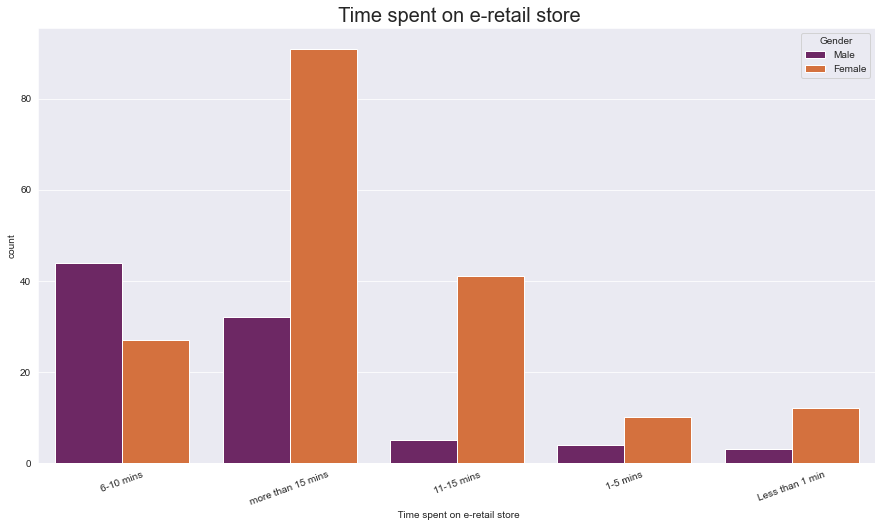

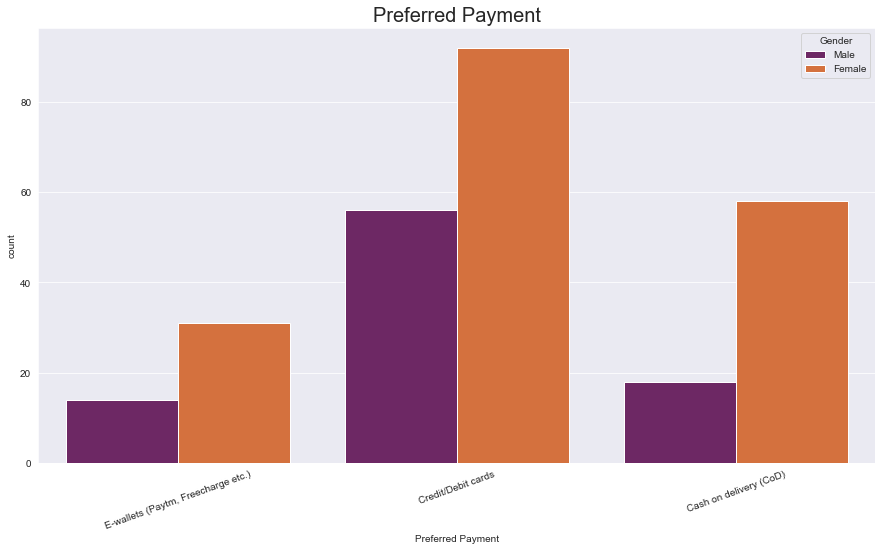

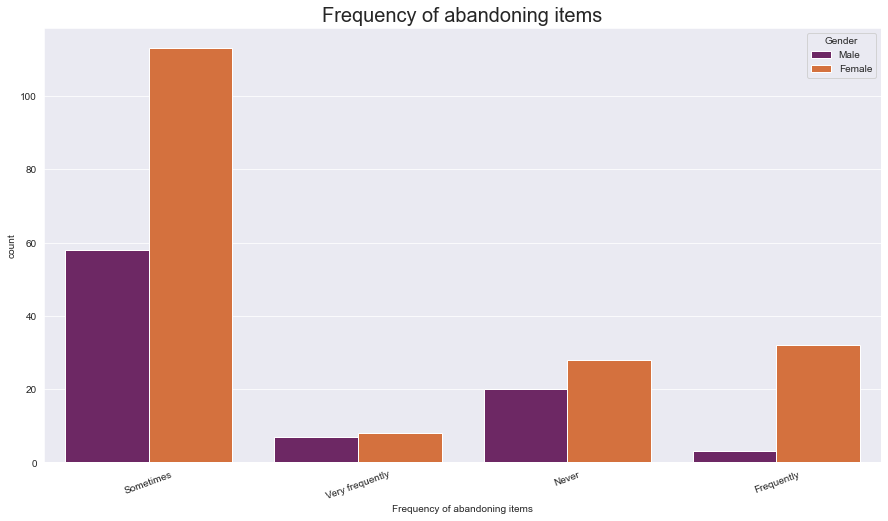

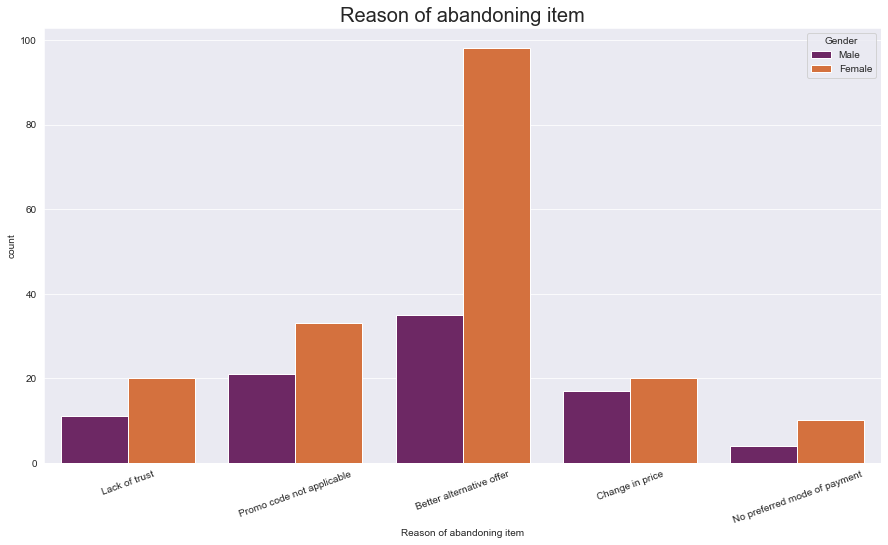

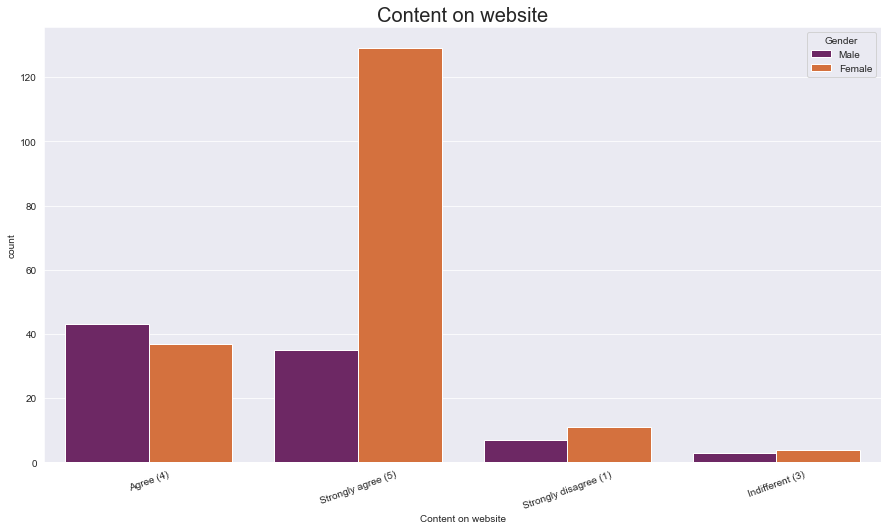

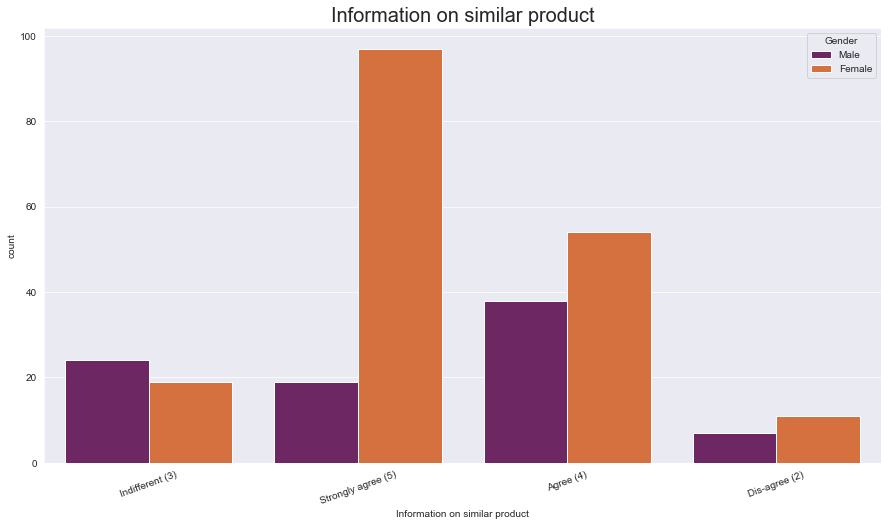

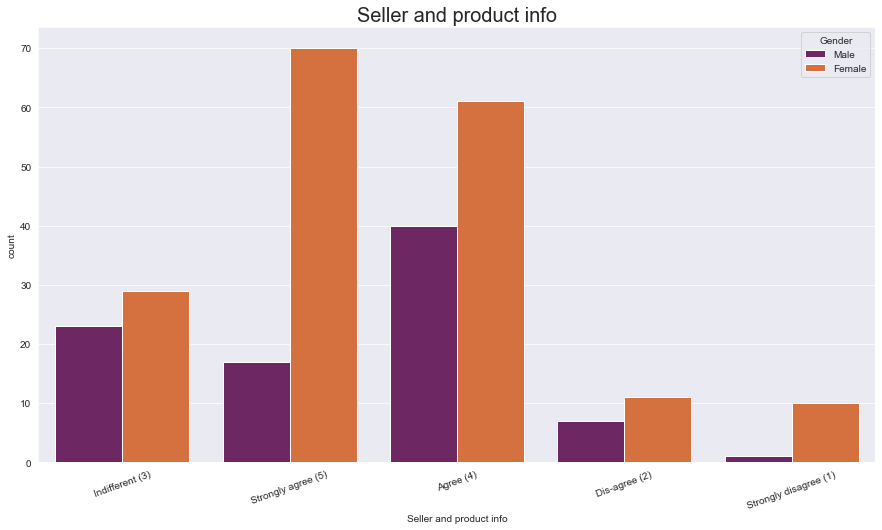

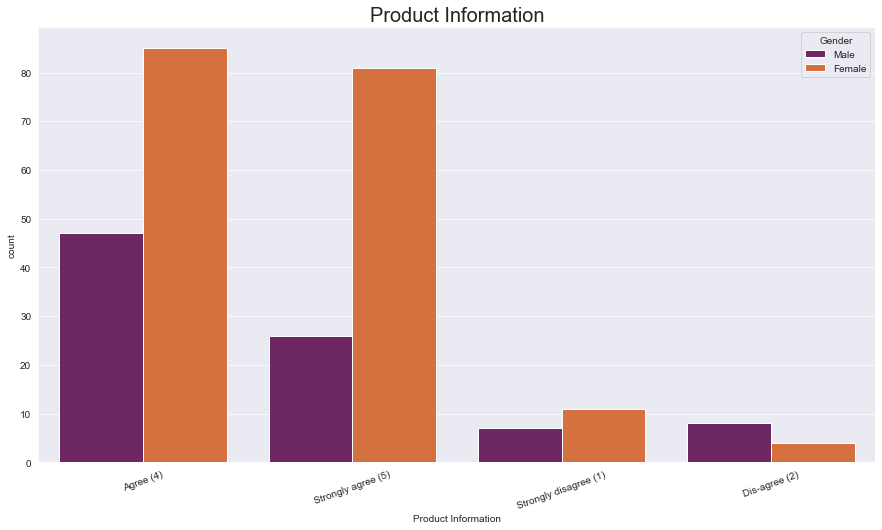

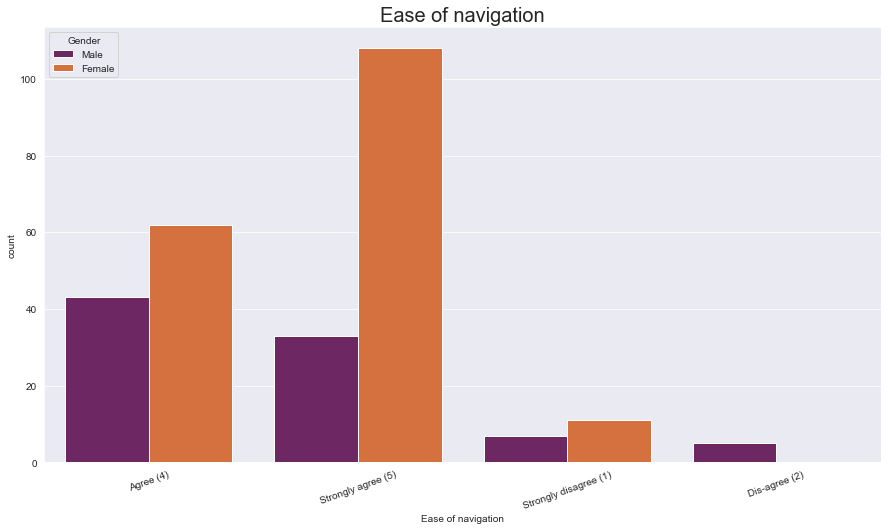

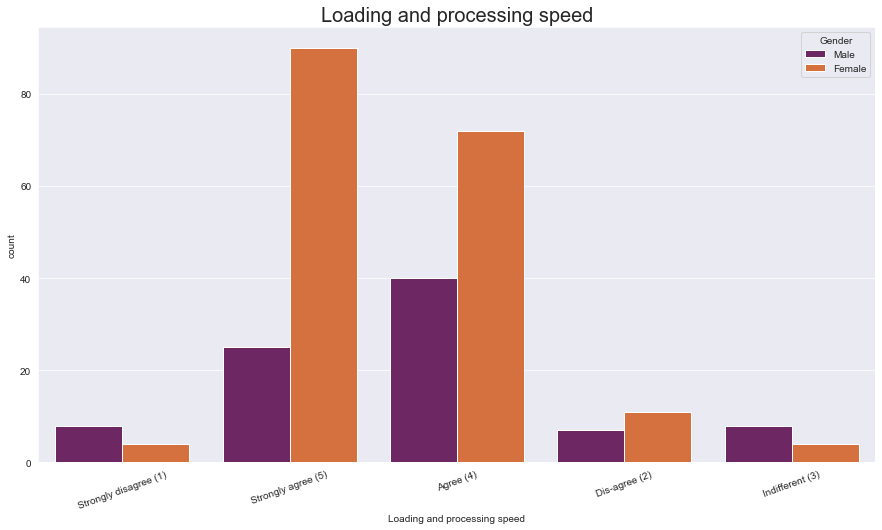

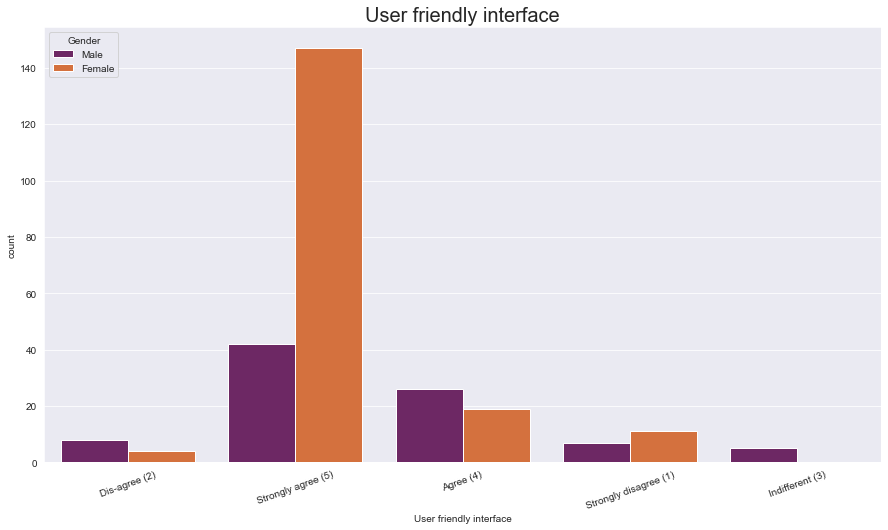

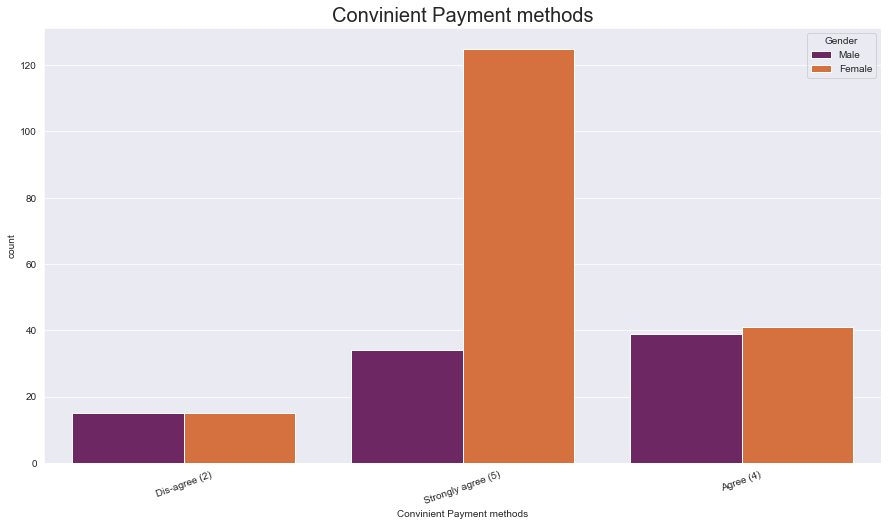

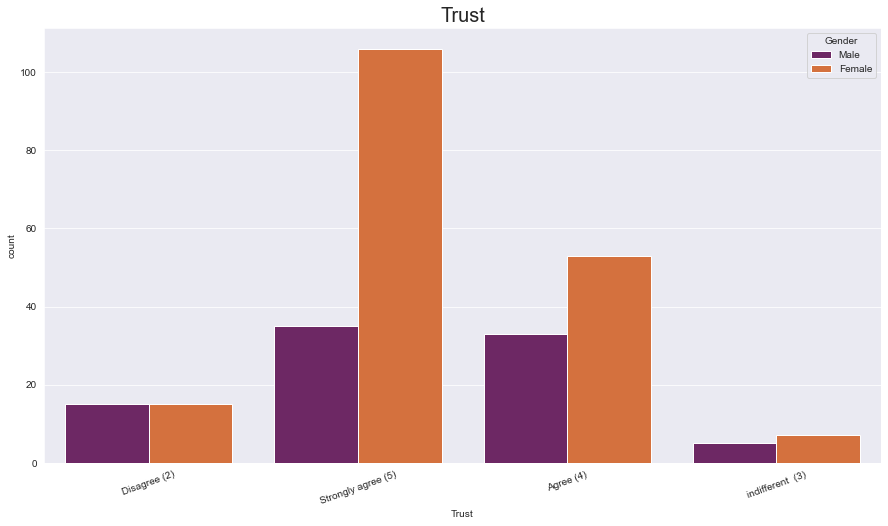

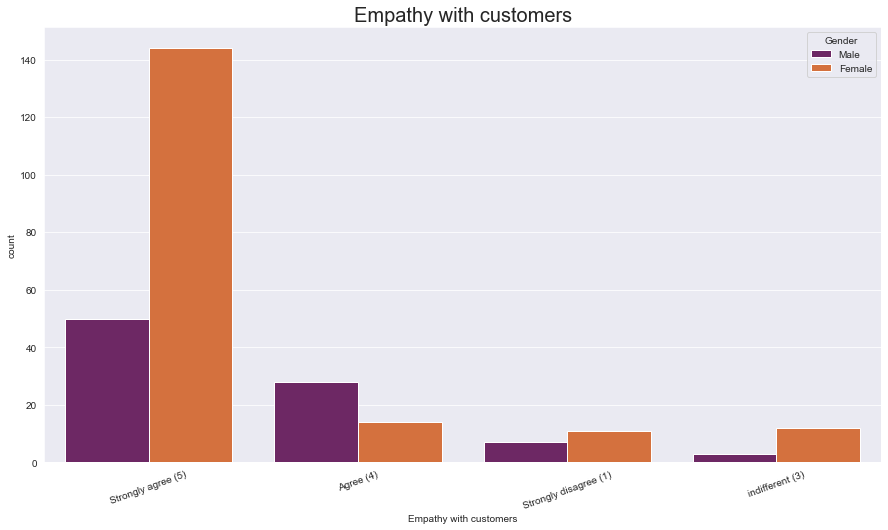

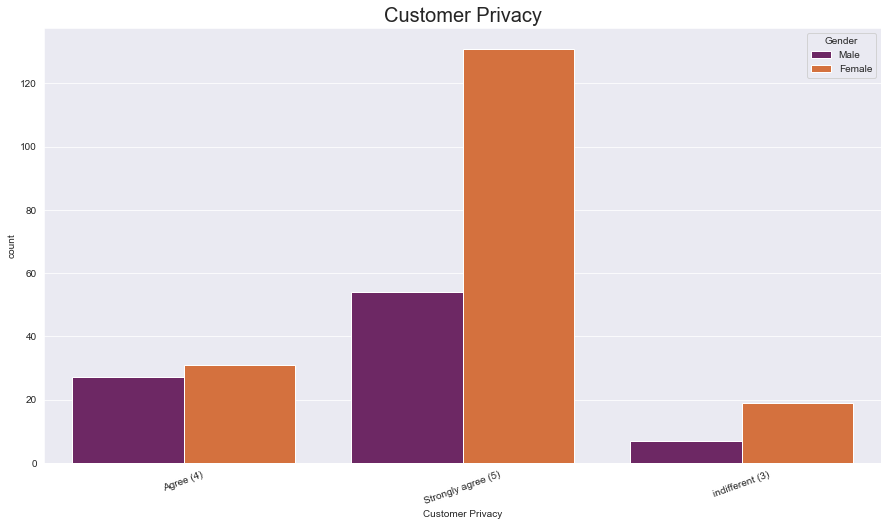

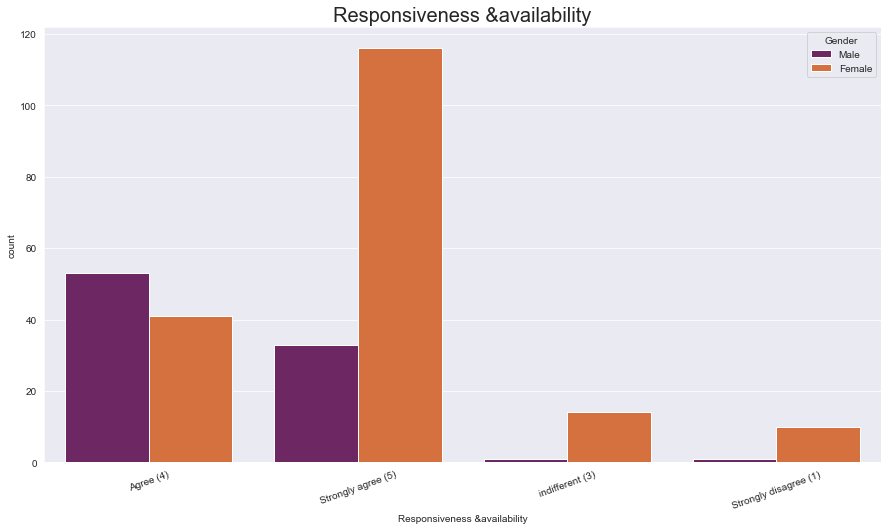

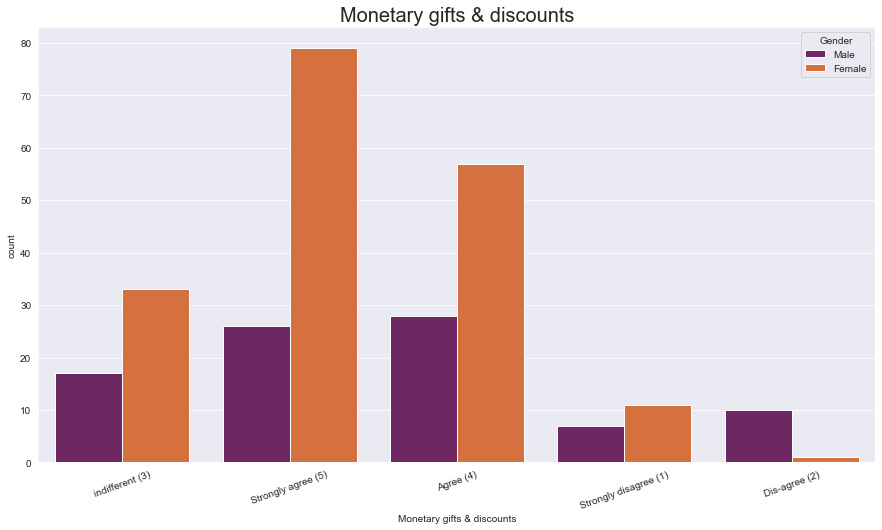

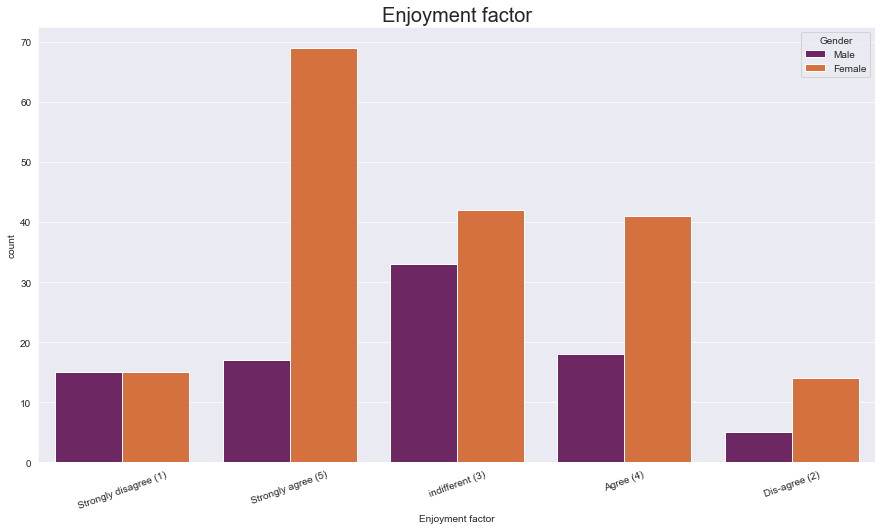

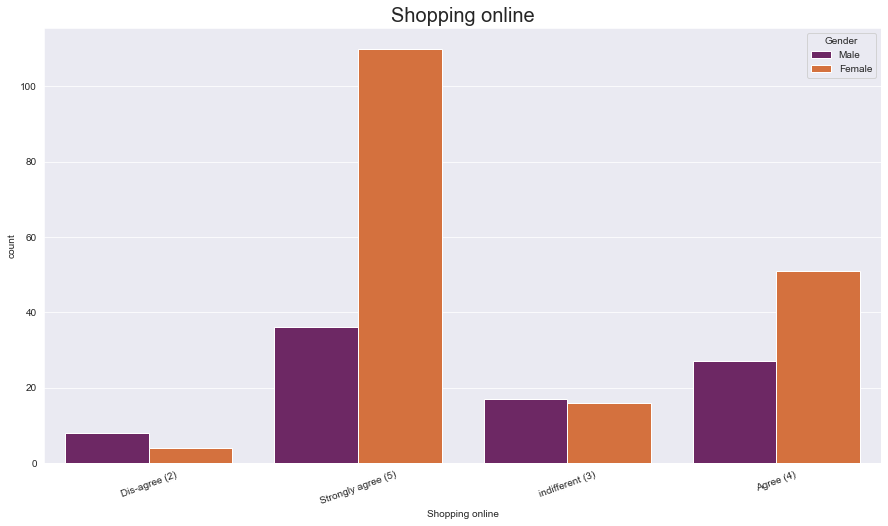

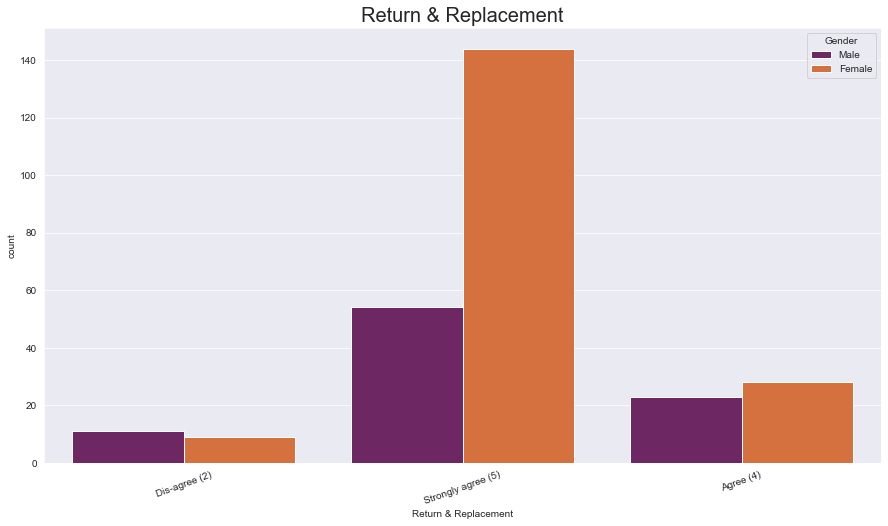

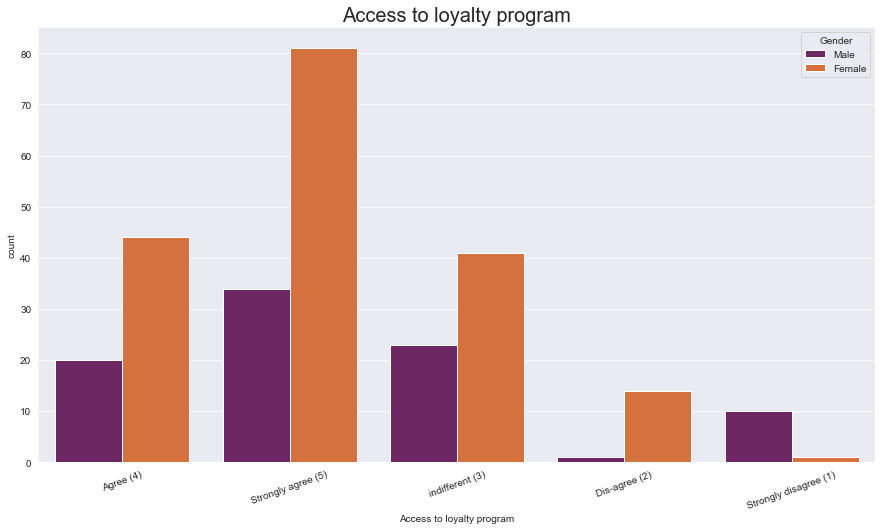

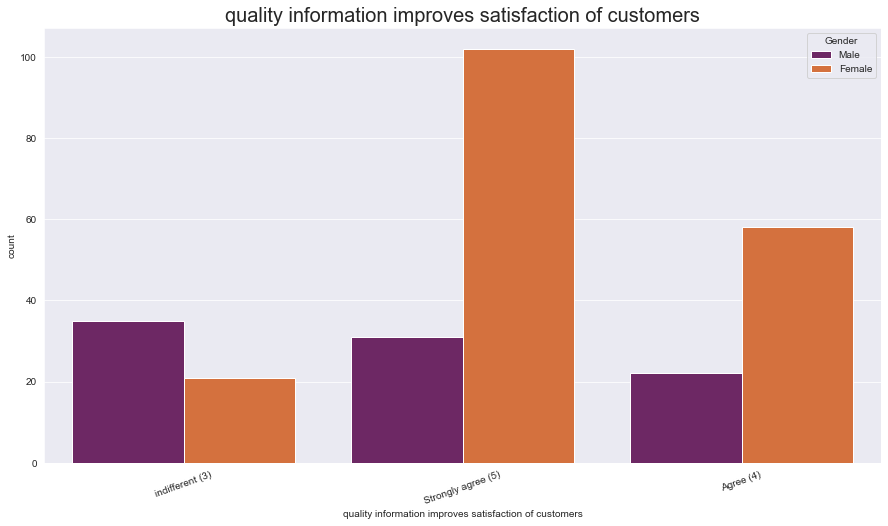

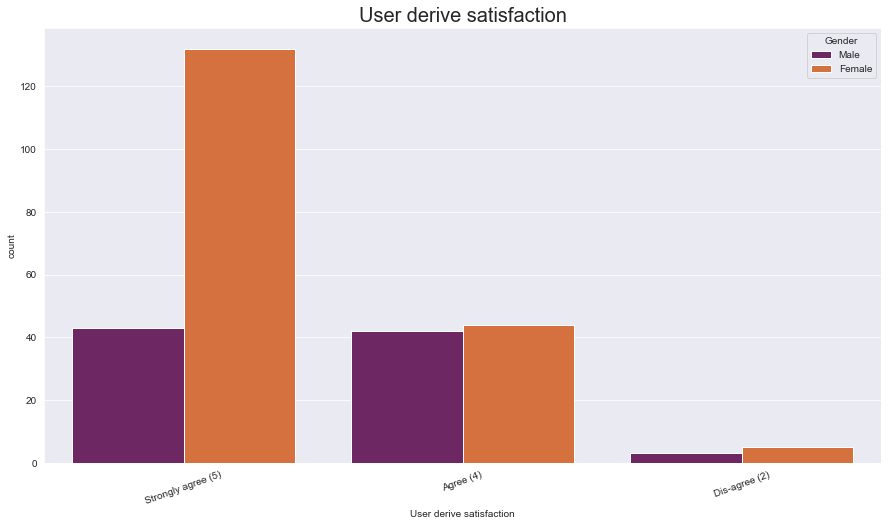

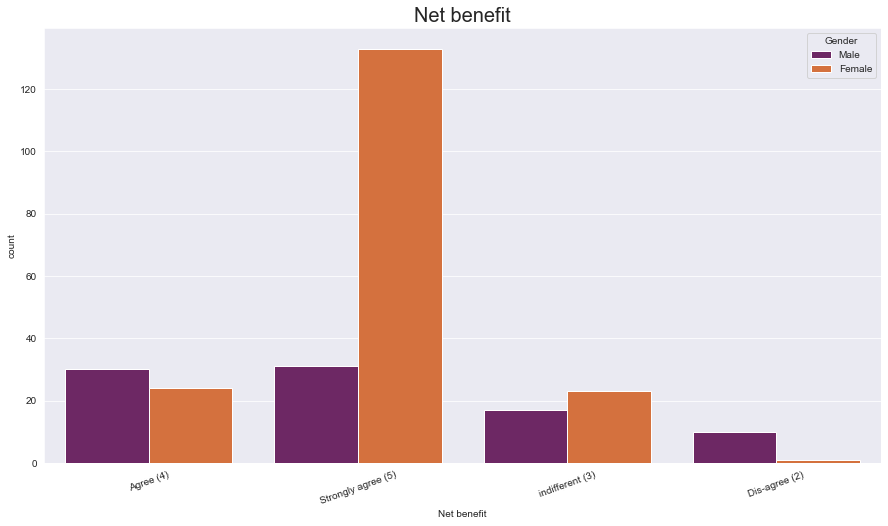

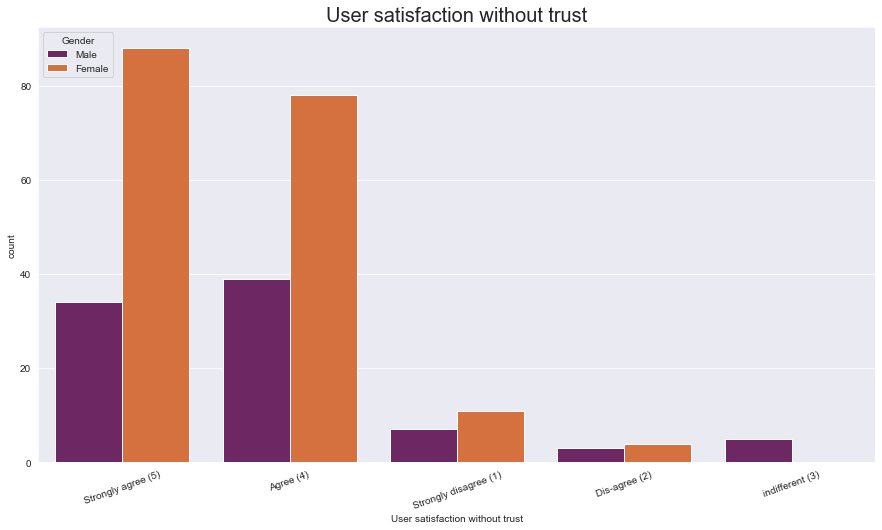

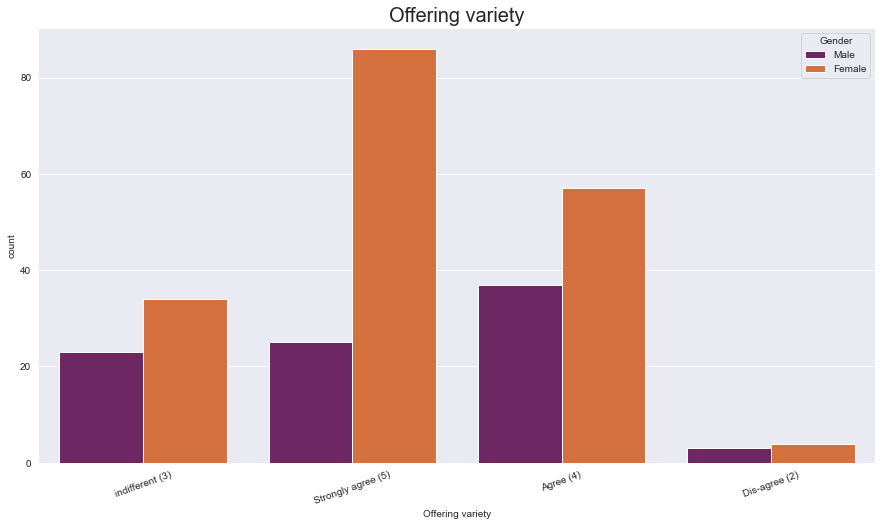

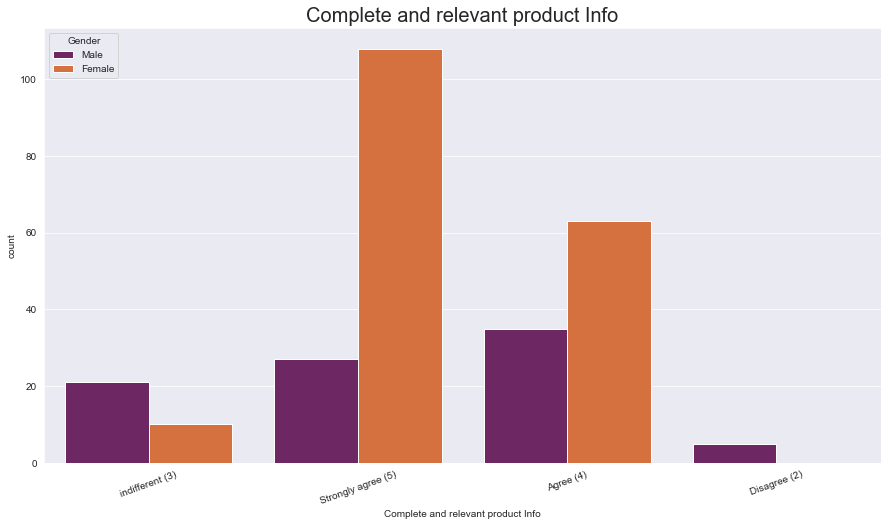

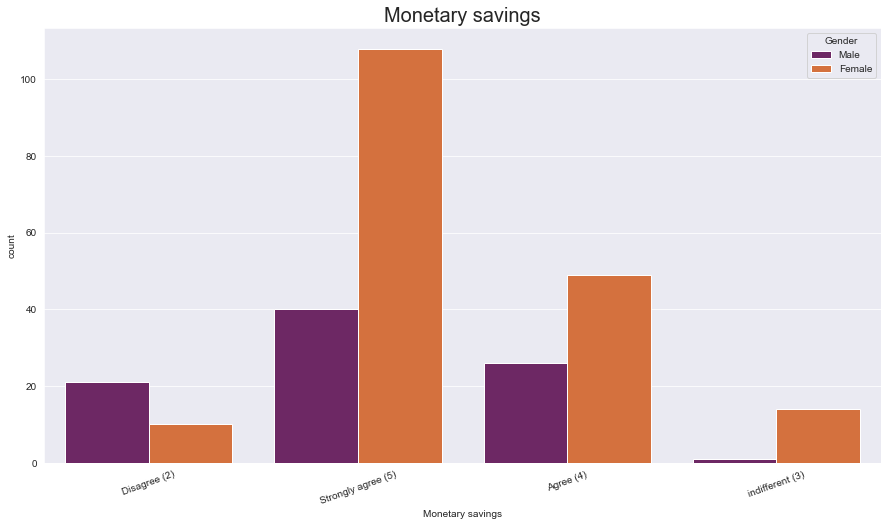

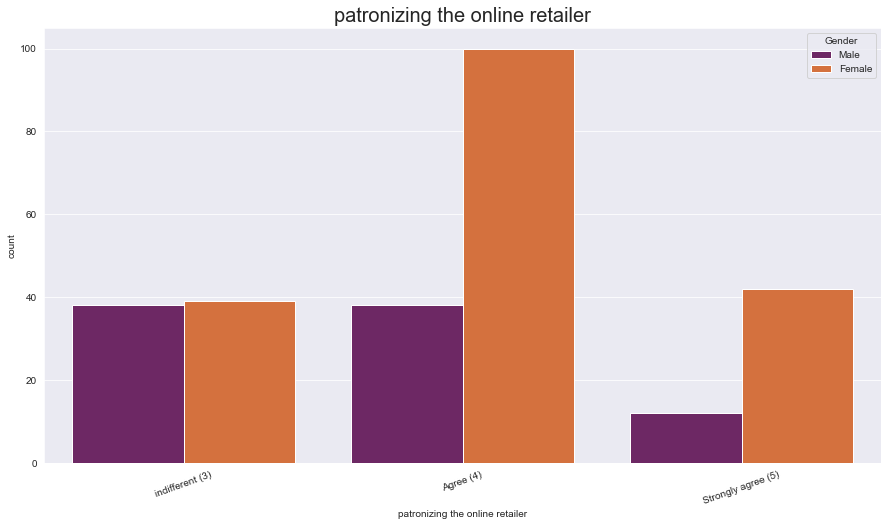

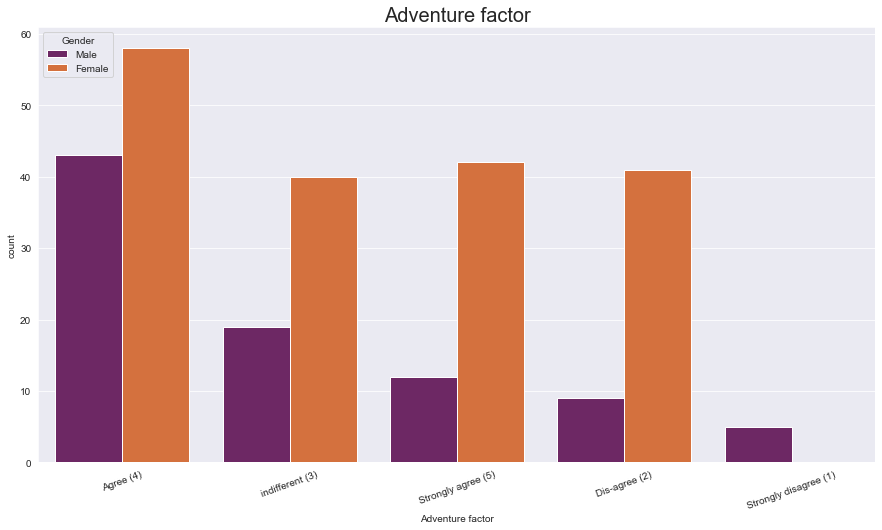

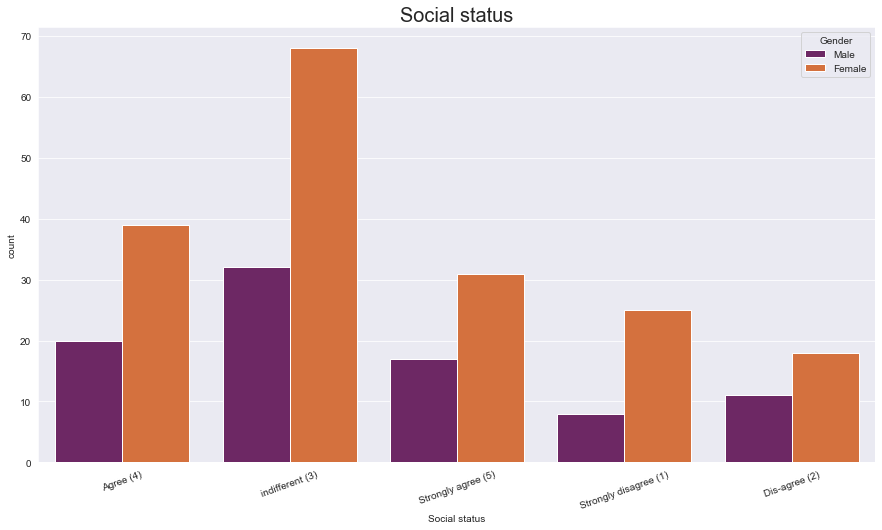

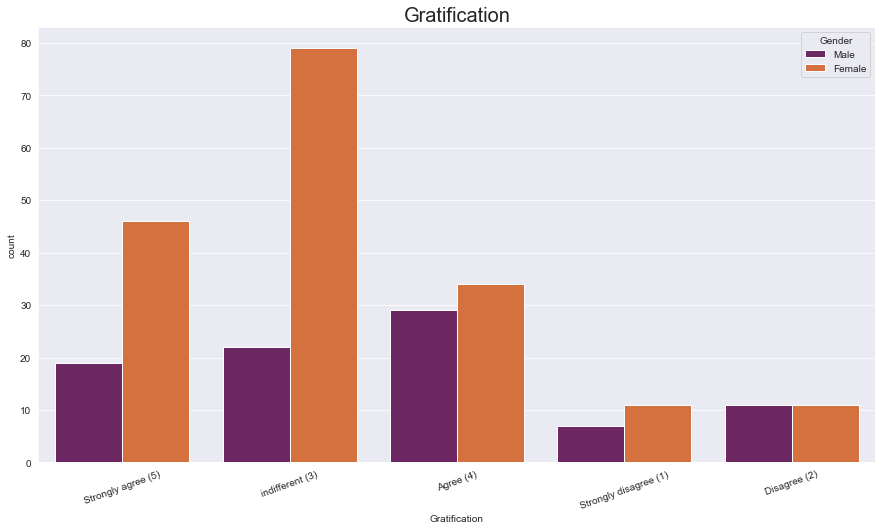

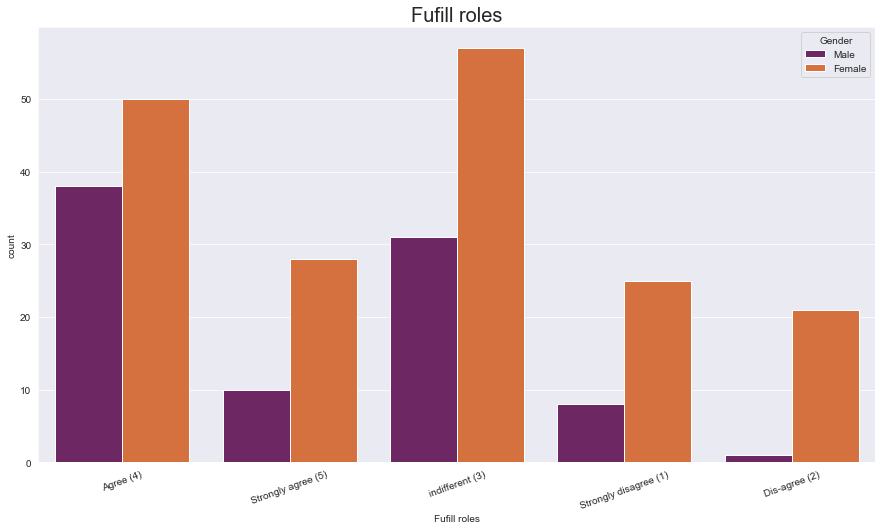

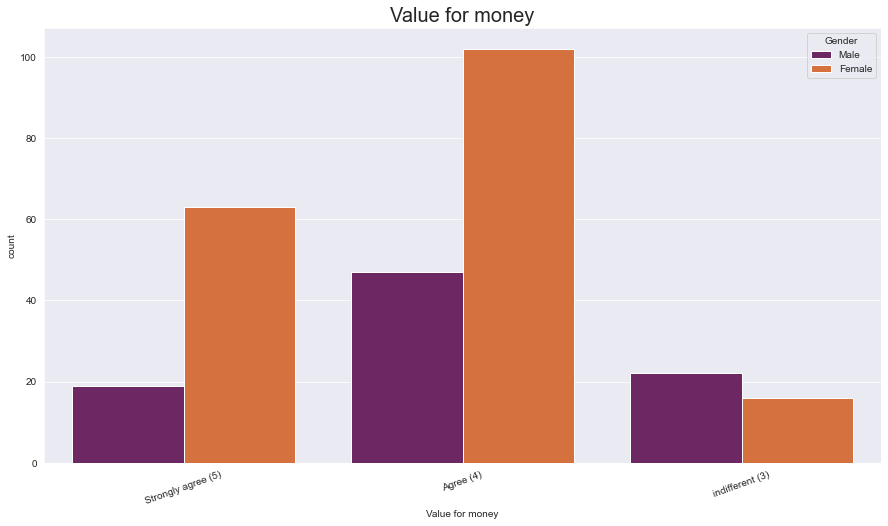

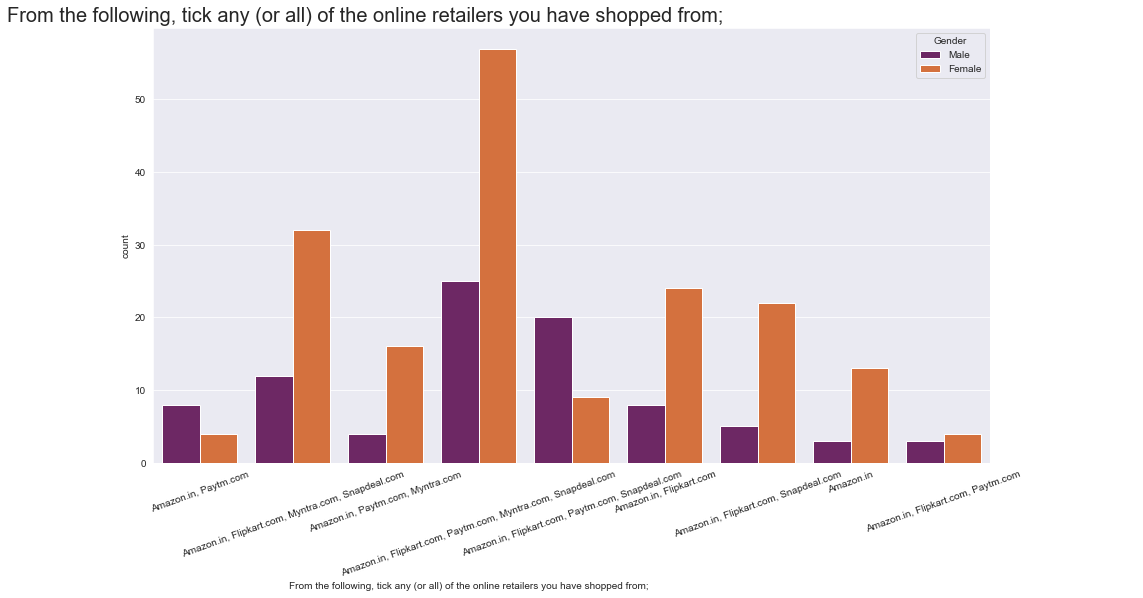

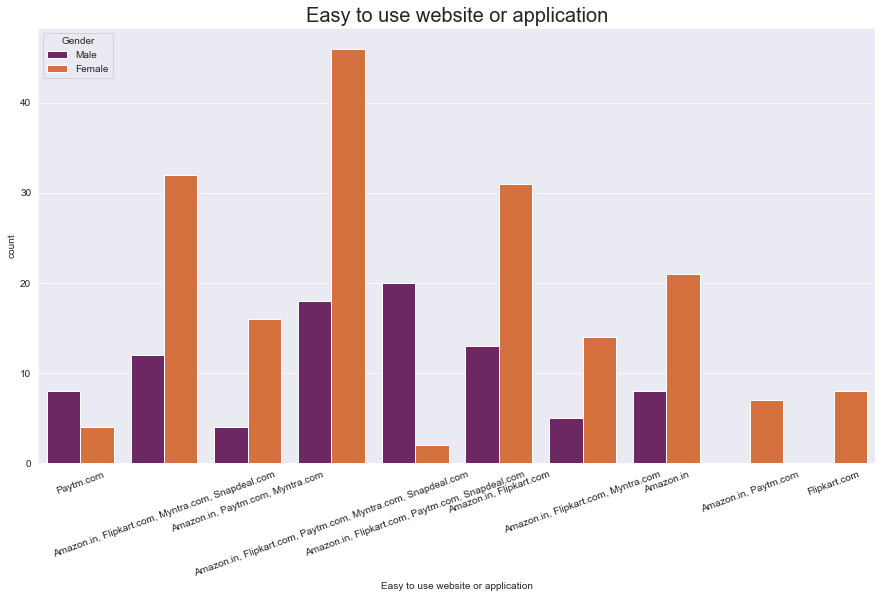

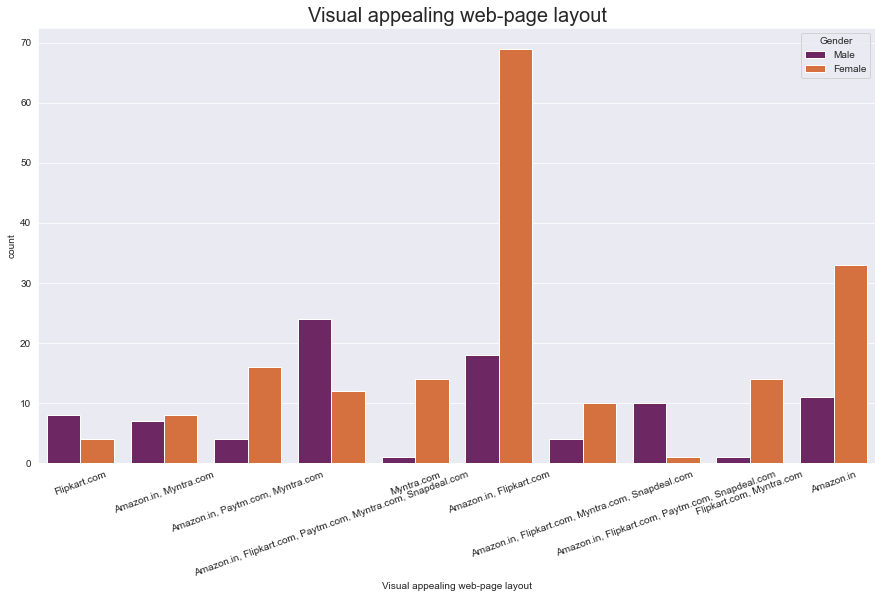

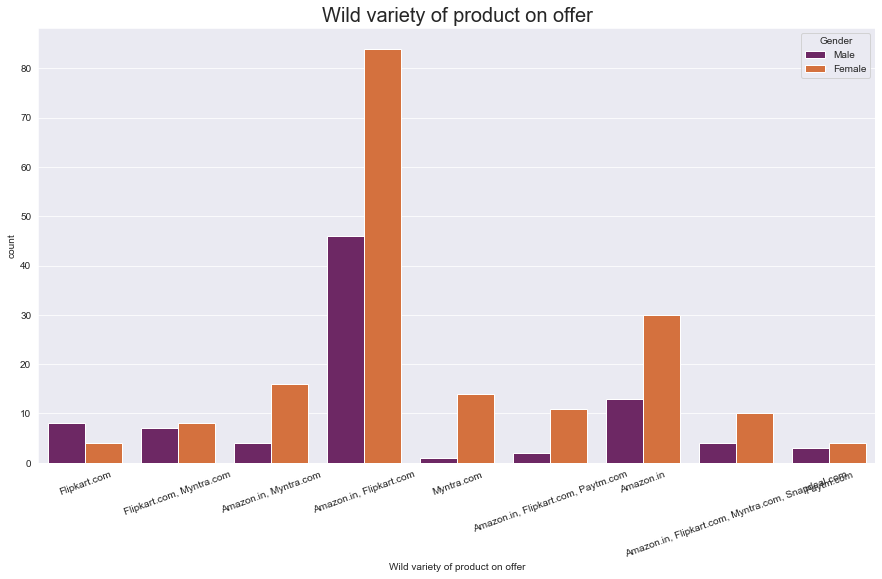

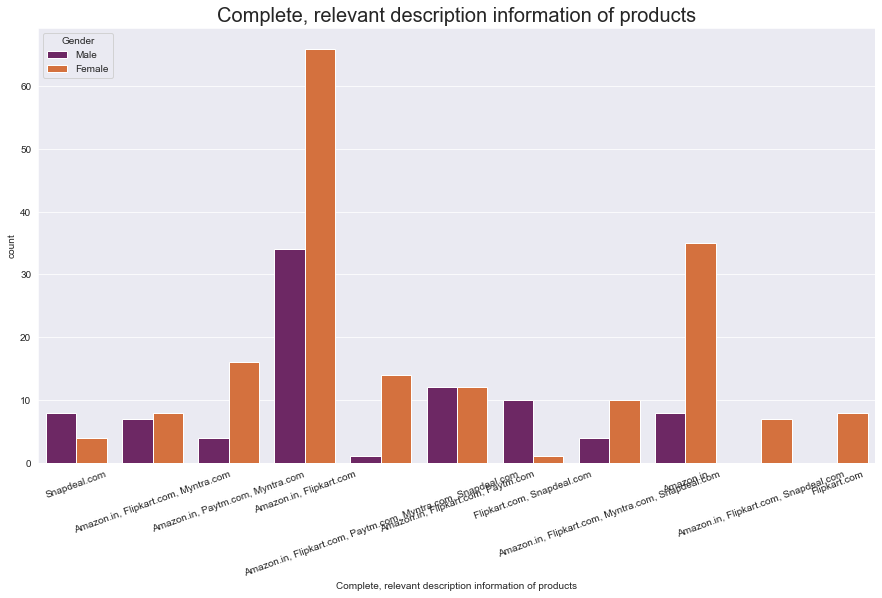

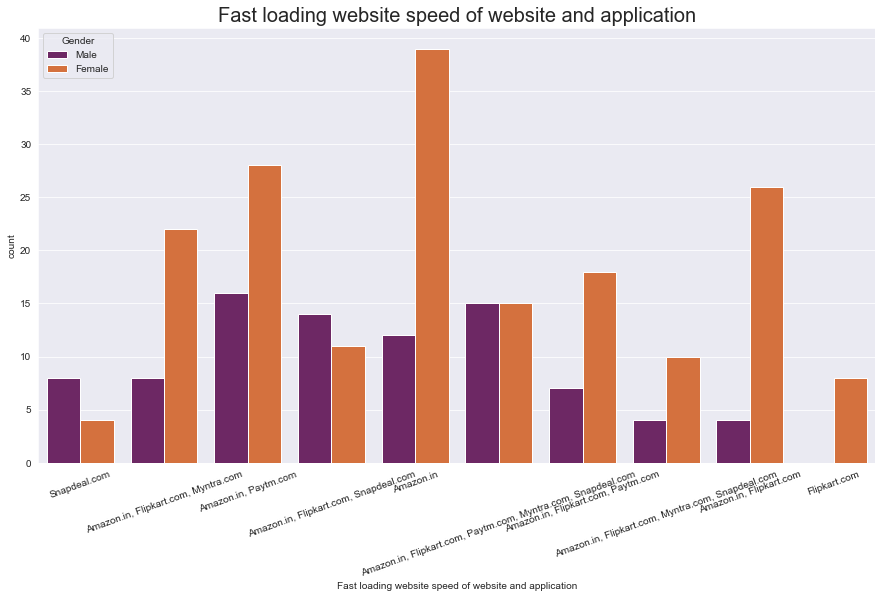

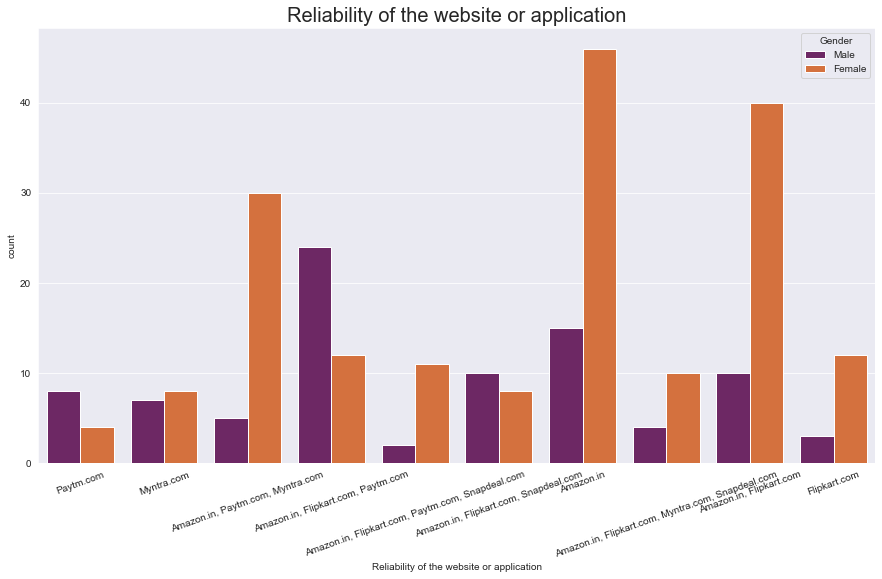

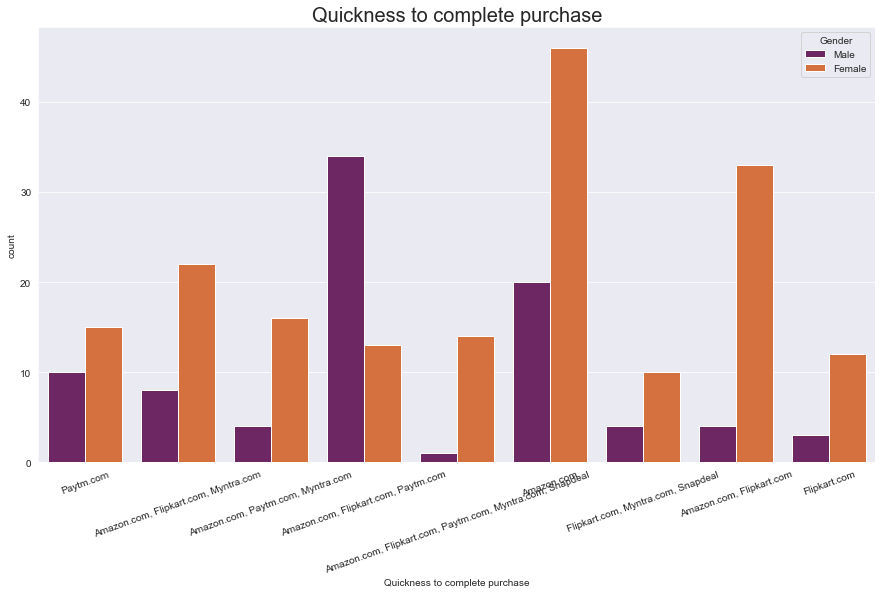

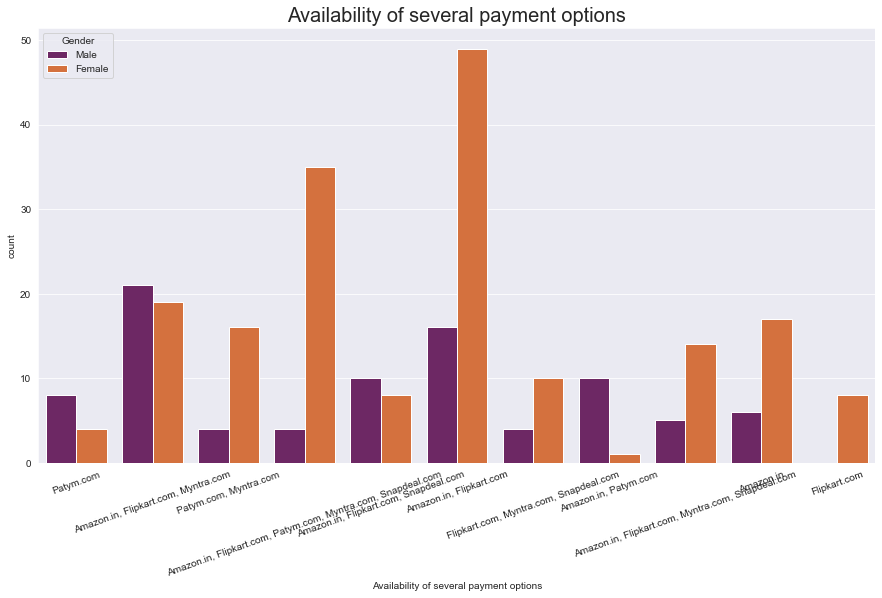

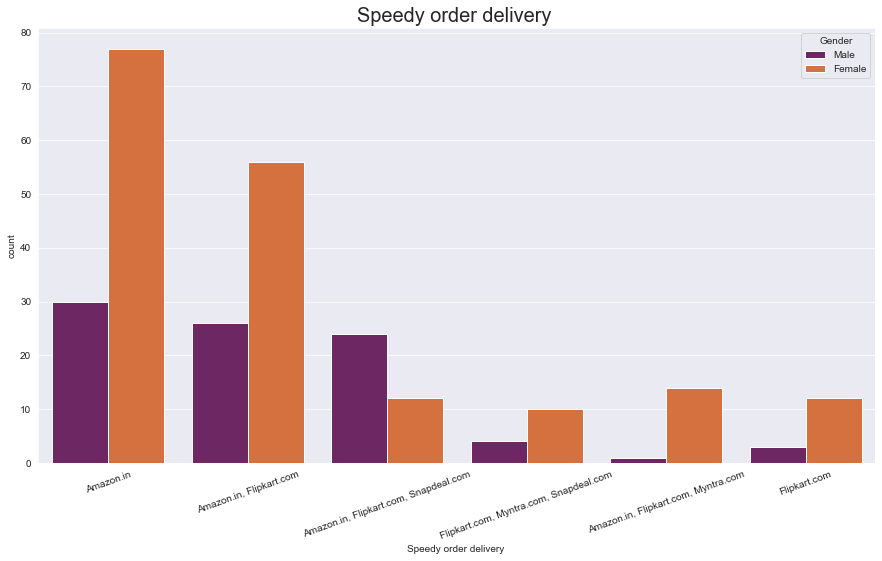

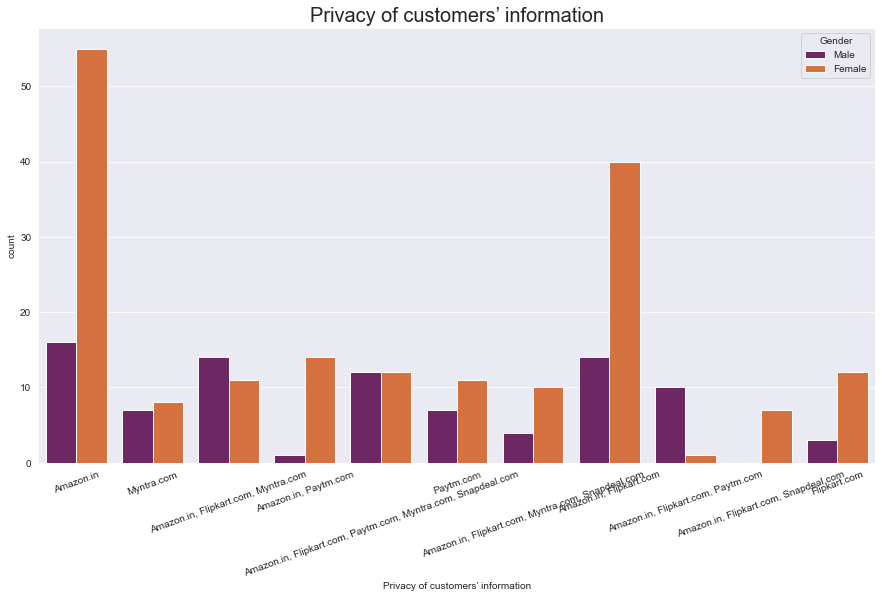

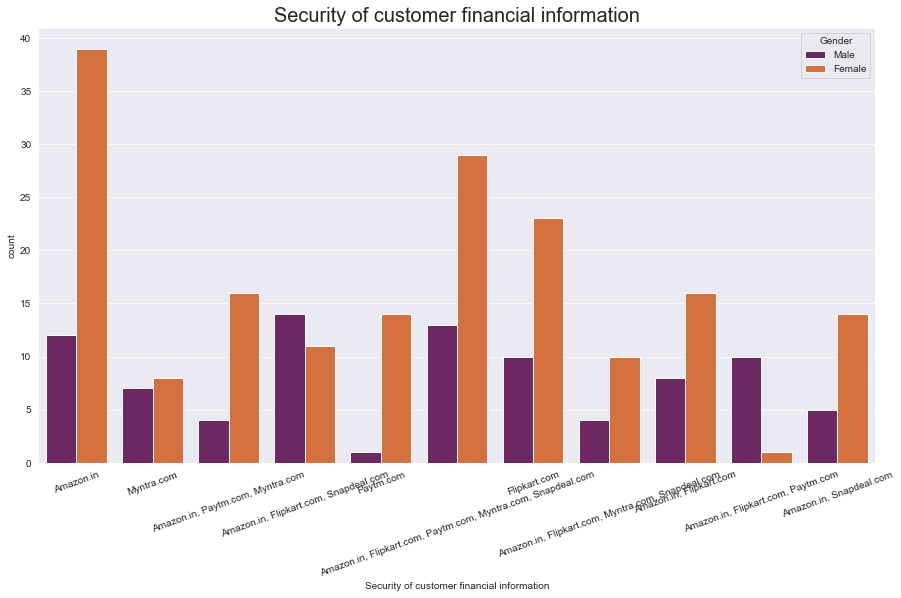

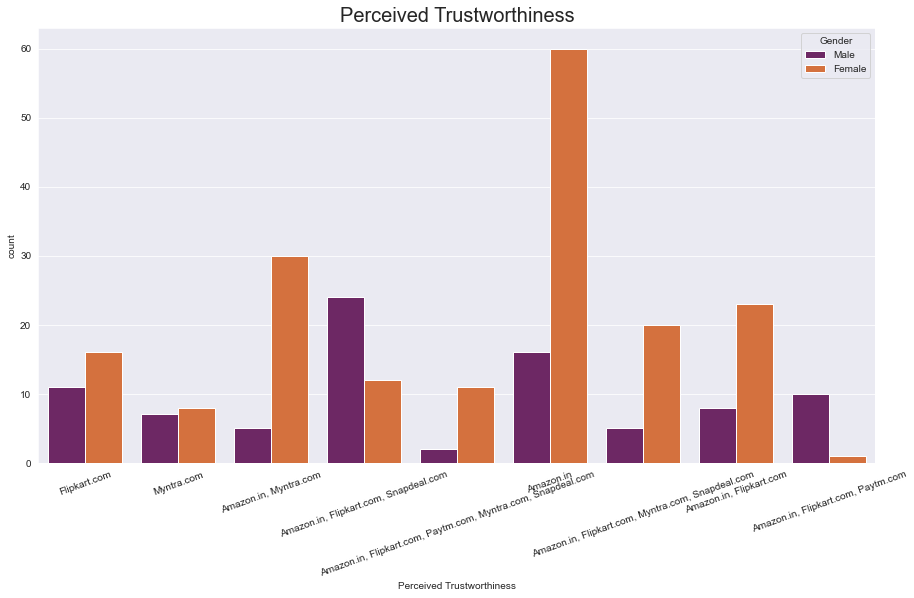

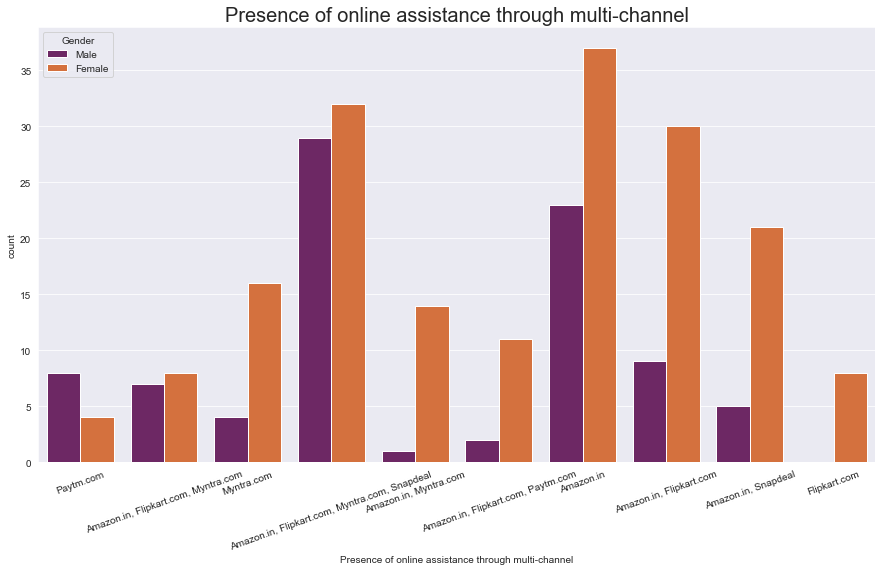

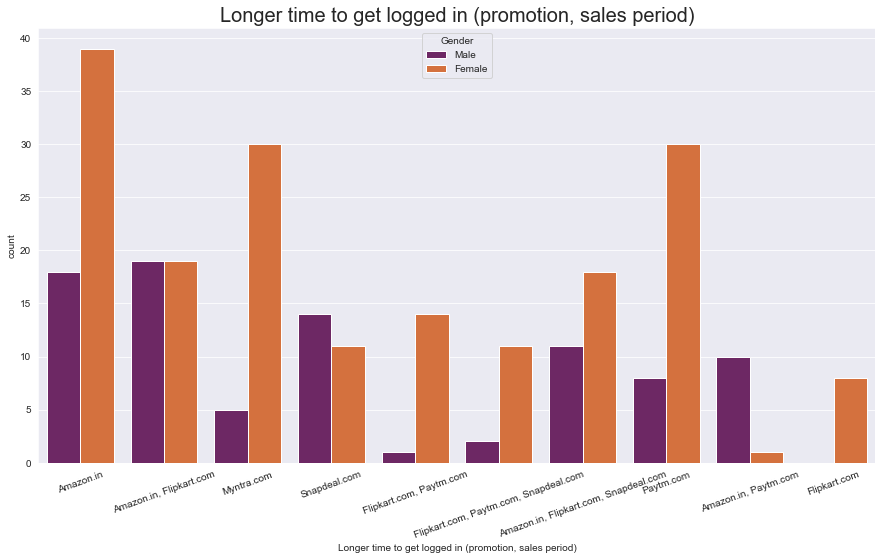

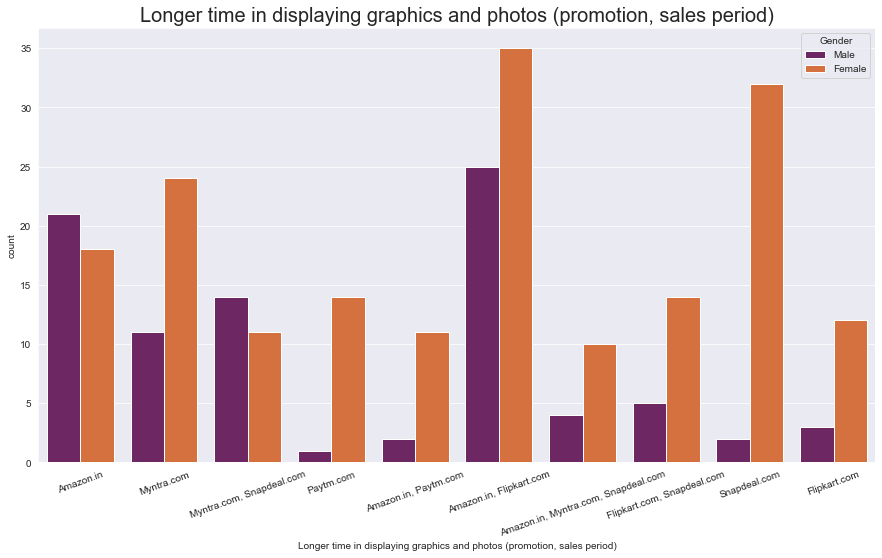

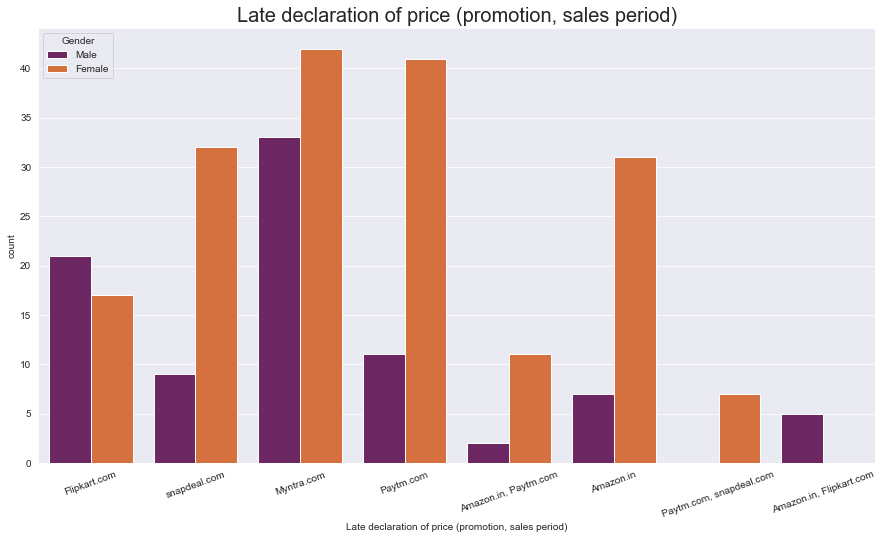

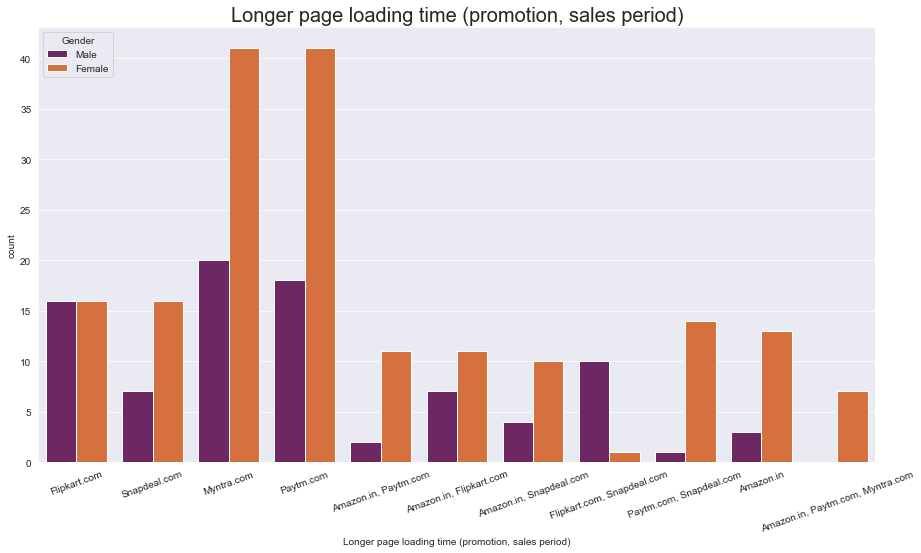

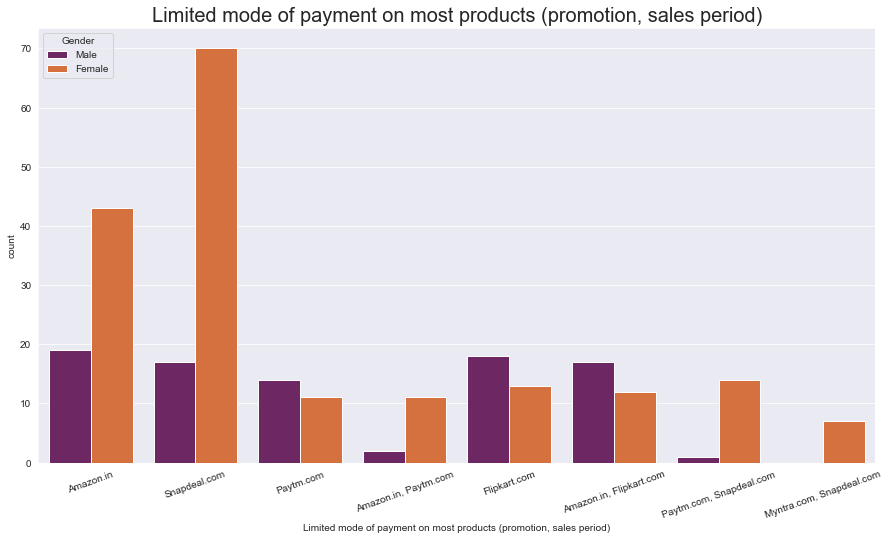

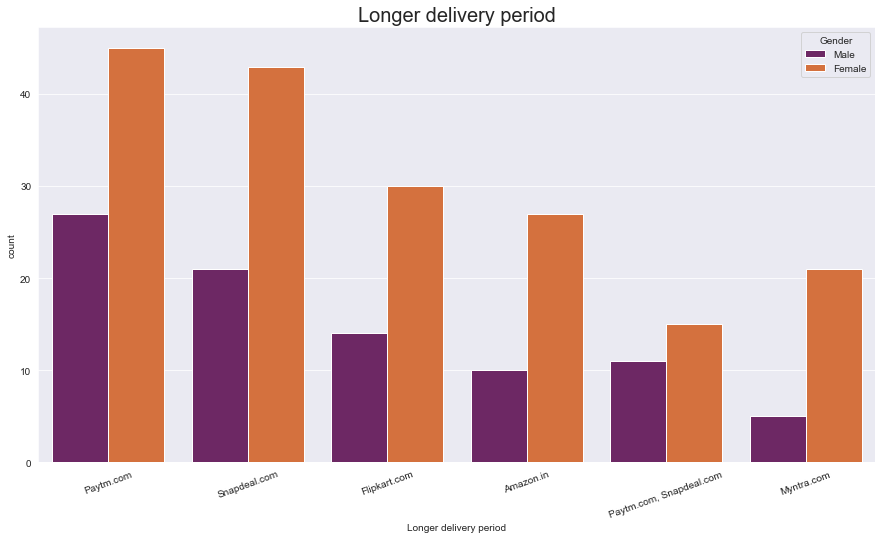

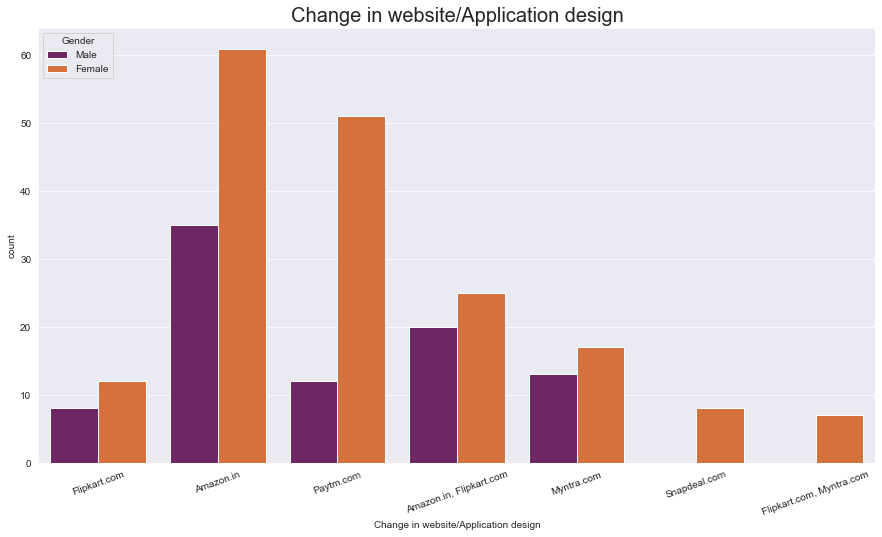

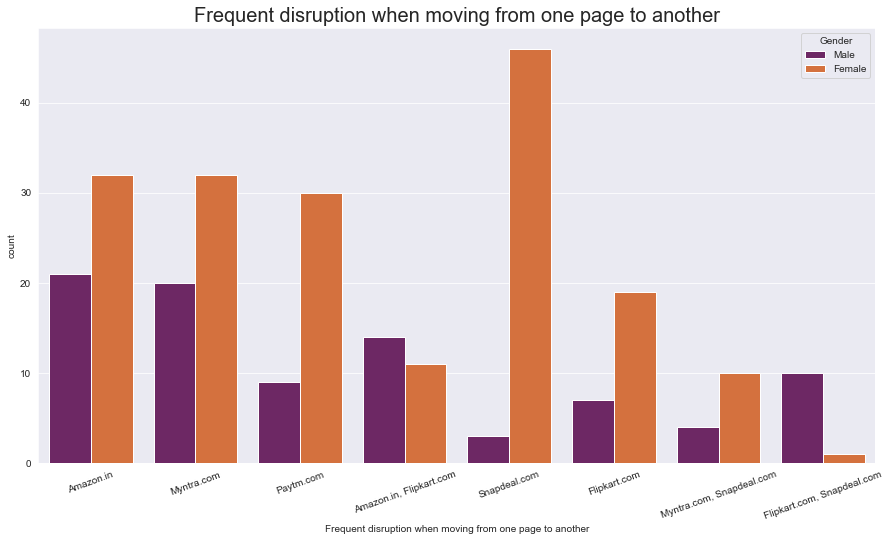

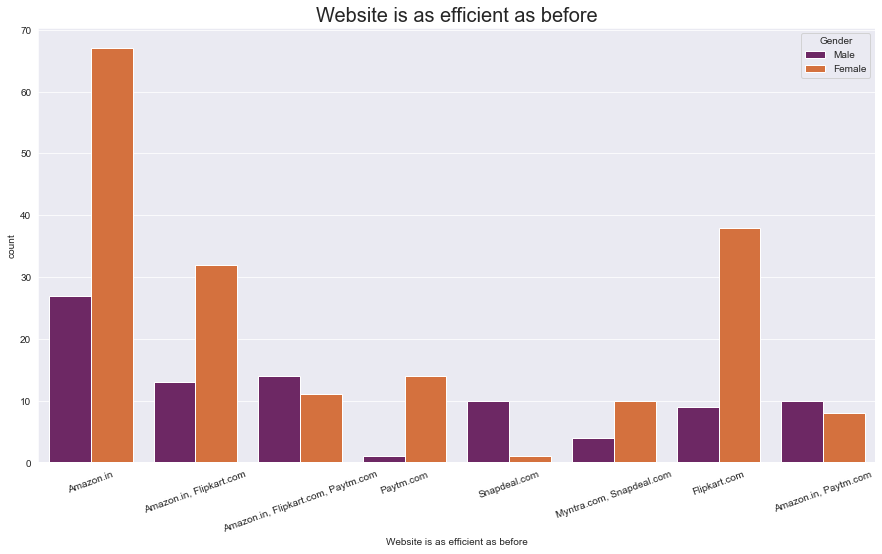

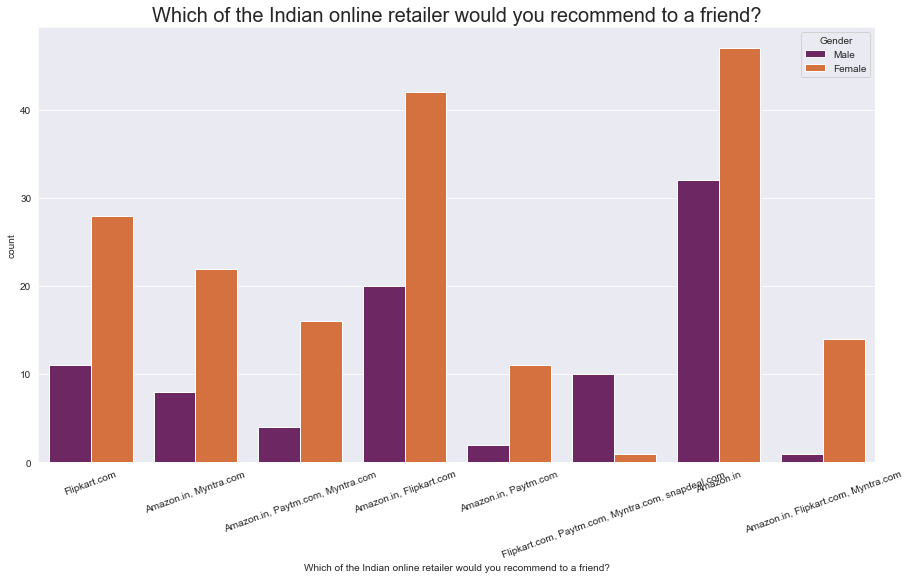

In [15]:
# Visualizing the all the columns with respect to gender
for i in df.columns:
    plt.figure(figsize=(15,8))
    plt.title(i,fontsize=20)
    sns.countplot(df[i],hue=df.Gender,palette='inferno')
    plt.xticks(rotation = 20)
    plt.show()

- Females in age group 21-30 years do majority of shopping 

- Females from Greater Noida and males from Delhi do majority of shopping  

- Most of the females shop from amazon, flipkart, paytm, myntra, snapdeal as they find it easy to use and also find amazon reliable 

- Males find amazon,flipkart and paytm to be equally reliable. 

- Both male and female agree that amazon is as efficient as before .

- Moreover they both would recommend amazon to a friend.

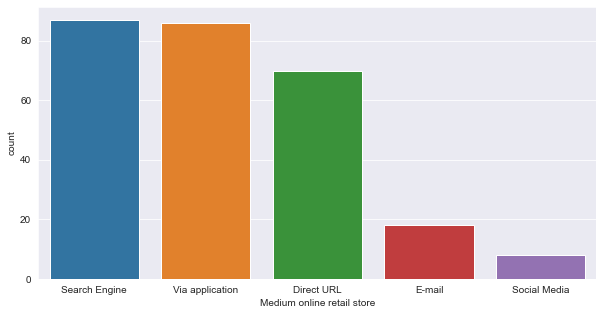

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: Medium online retail store, dtype: int64

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df['Medium online retail store'])
plt.show()
df['Medium online retail store'].value_counts()

- Most of the customers have downloaded the app after their first usage of the online retail store. We can safely assume that these customers have been retained by the E commerce website as they have downloaded the application on their phone and have a fair chance of shopping again. 

- Also, there are a few customers who are using Desktop/Laptop, for which, there are no applications for online shopping and they have to stick with the web browser.

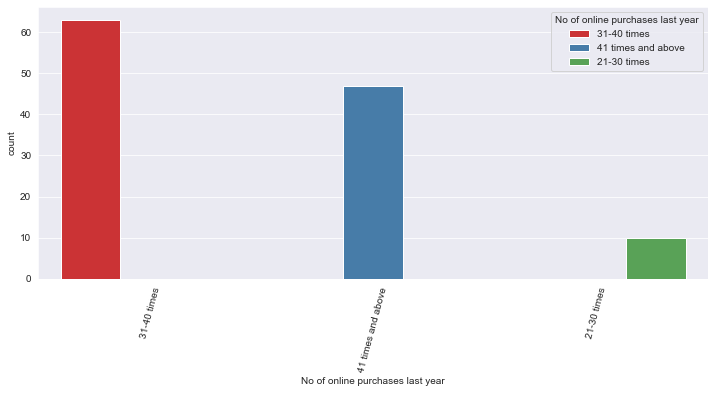

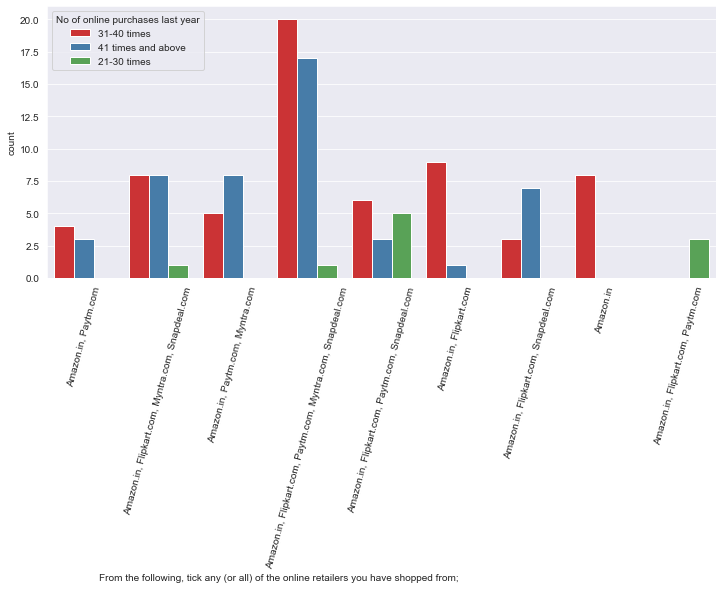

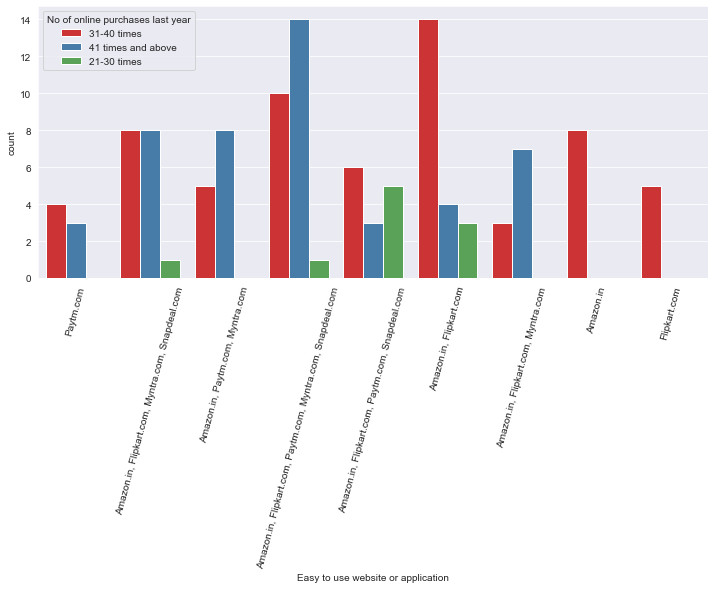

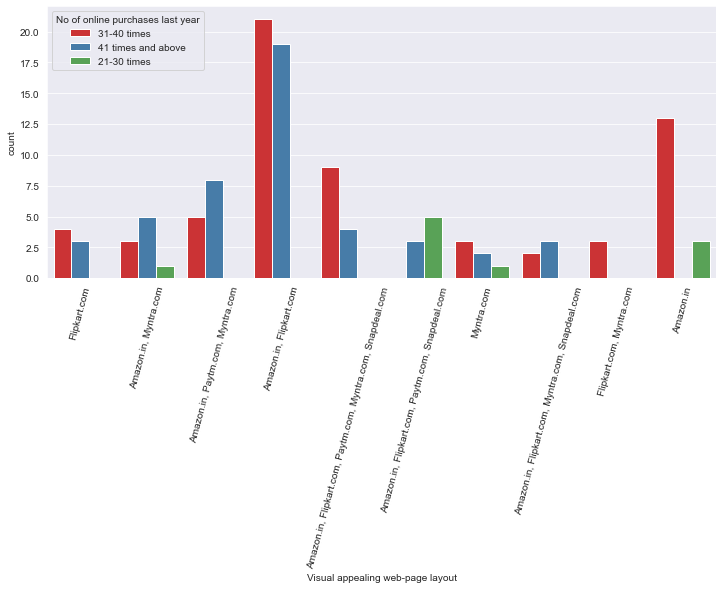

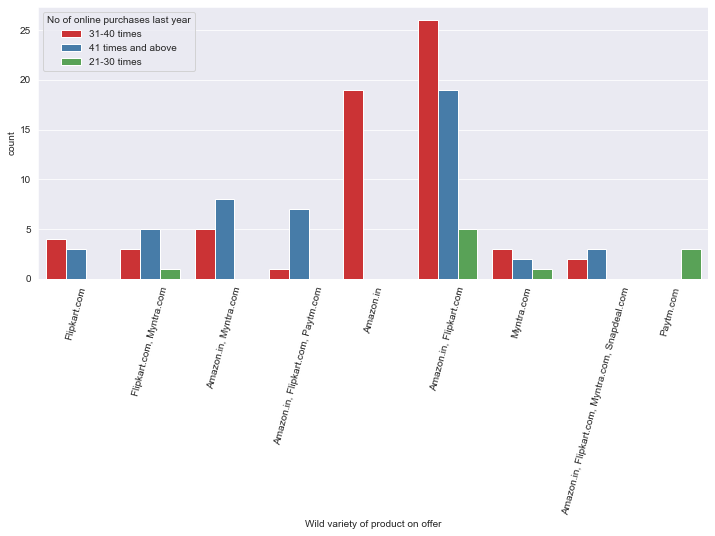

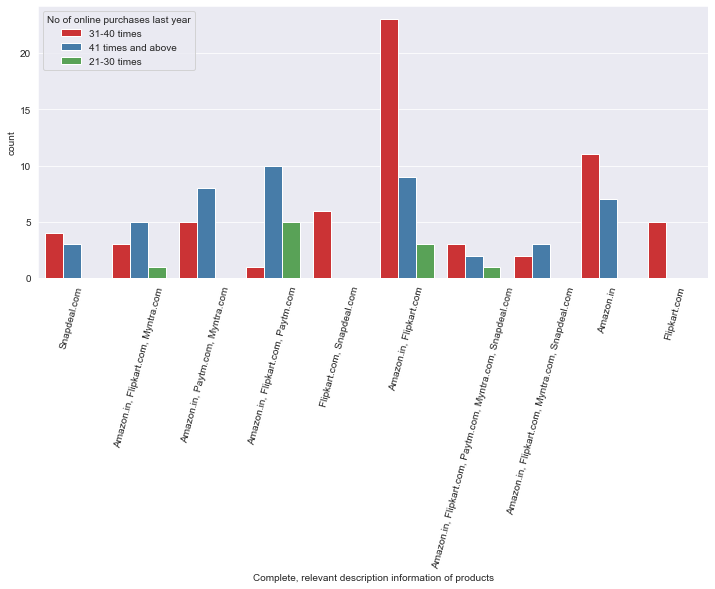

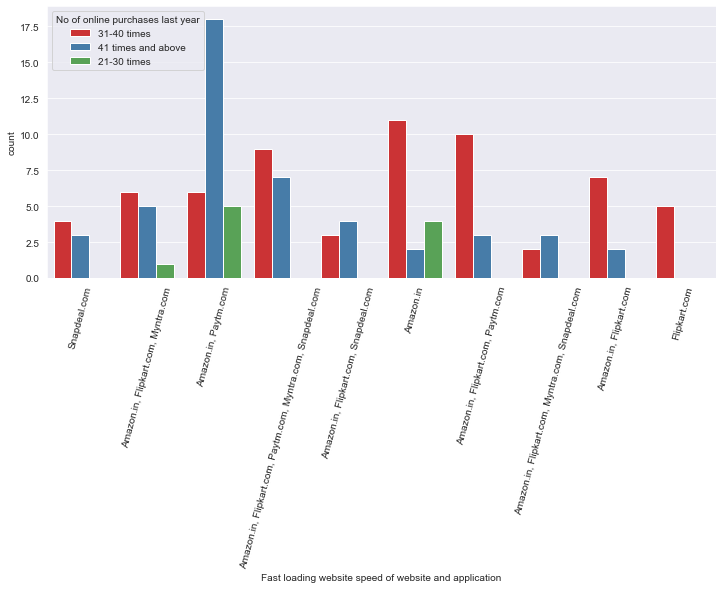

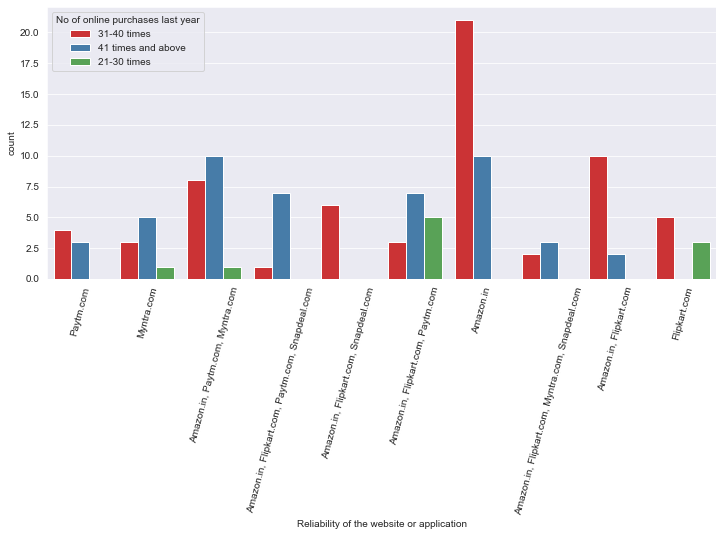

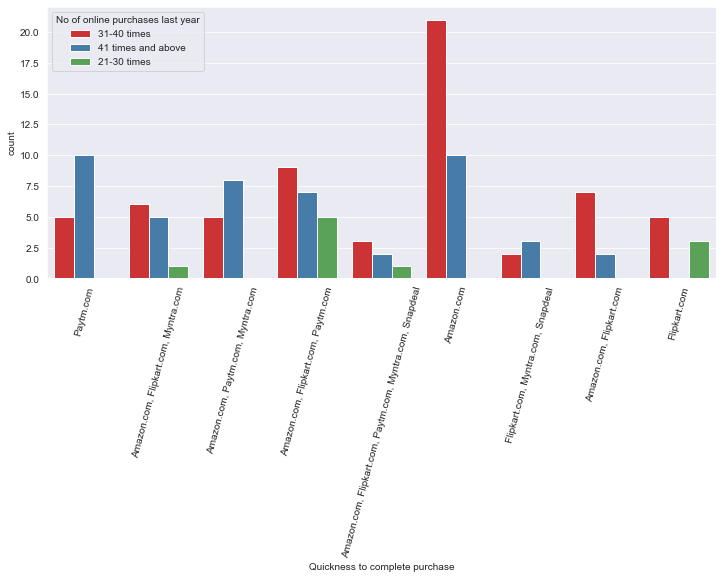

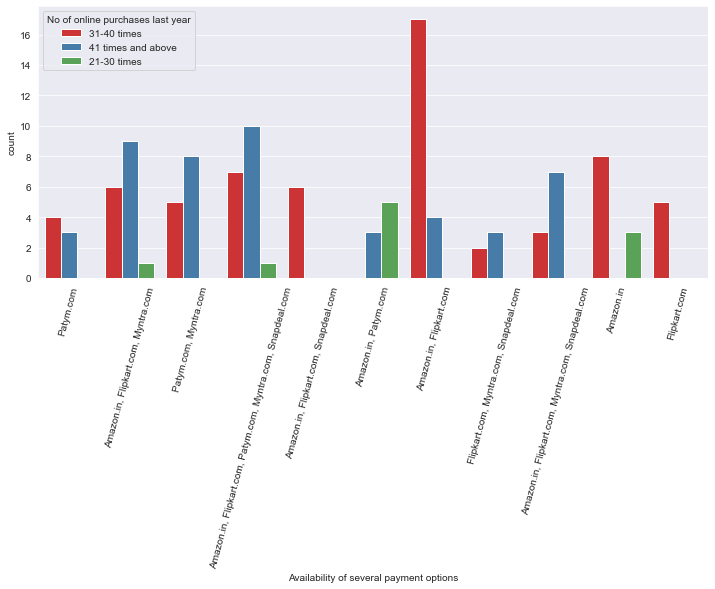

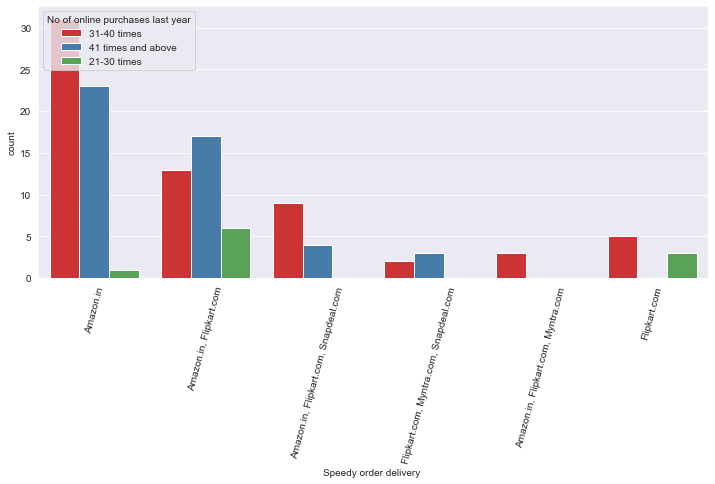

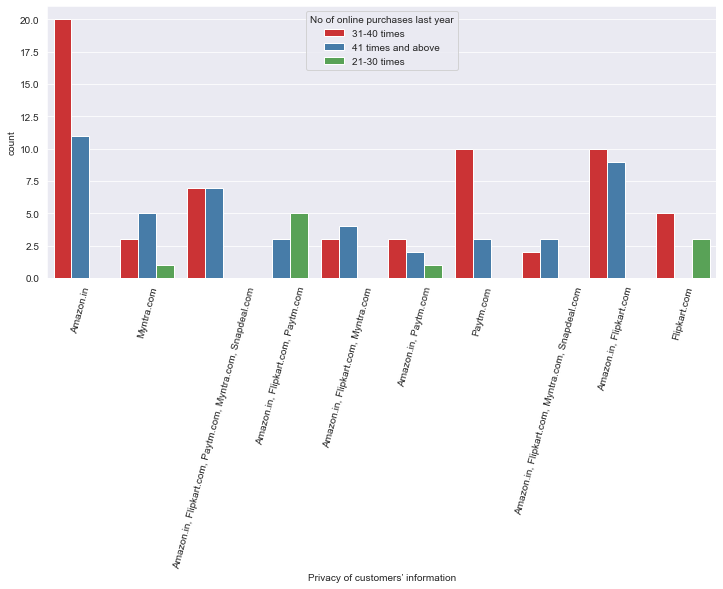

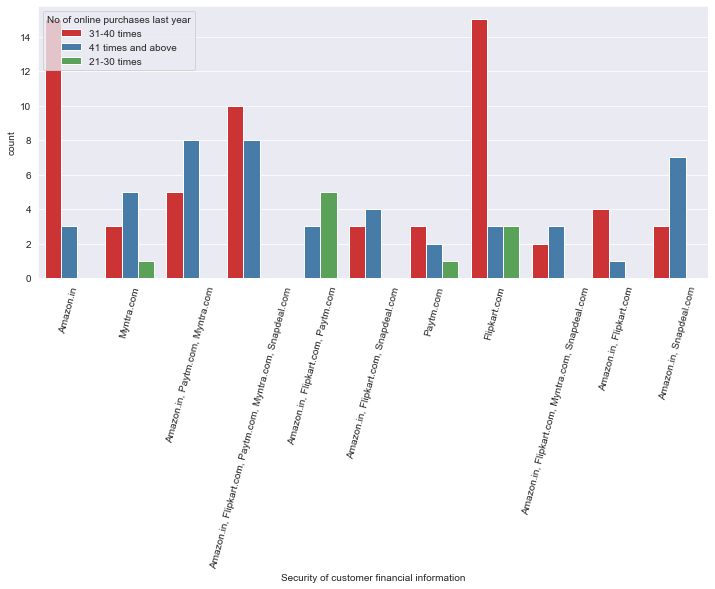

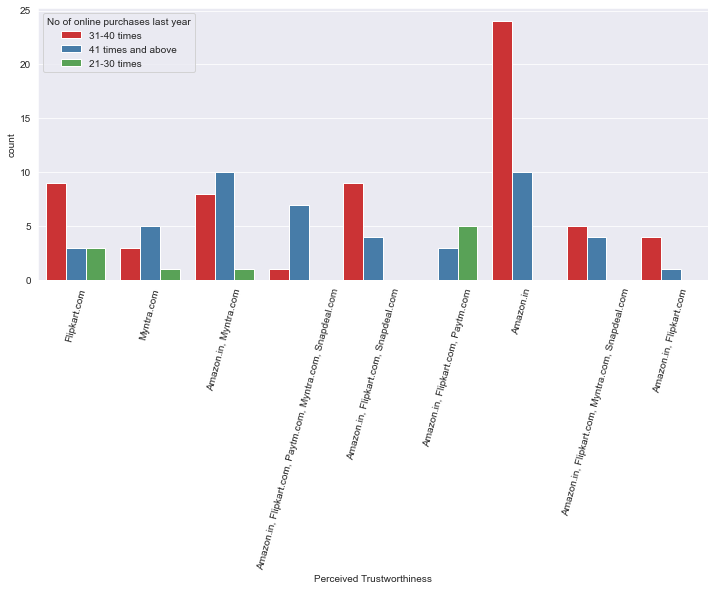

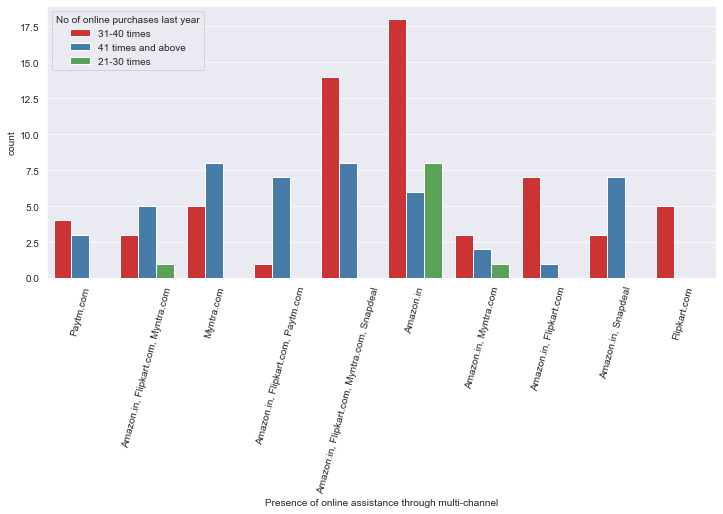

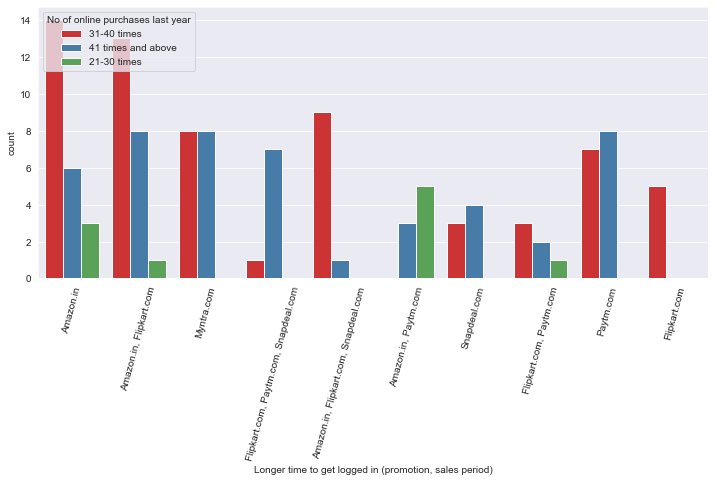

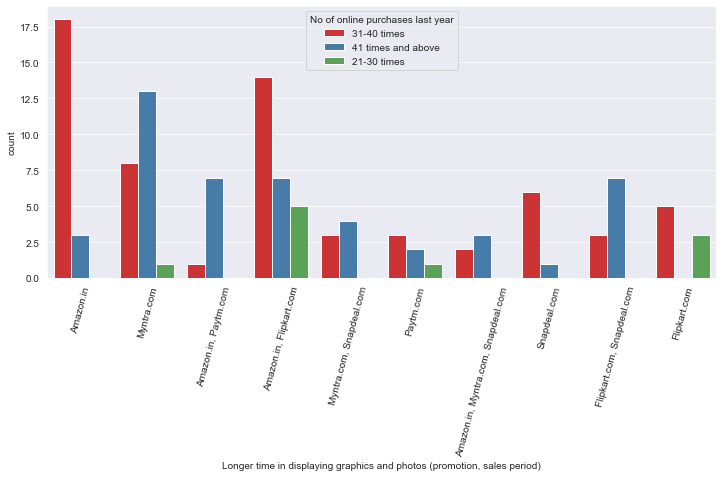

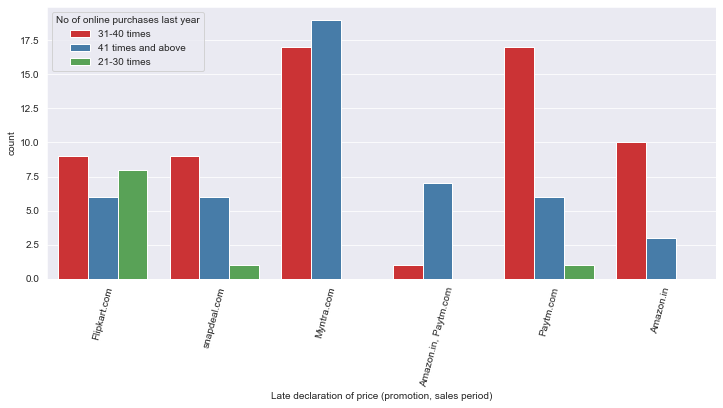

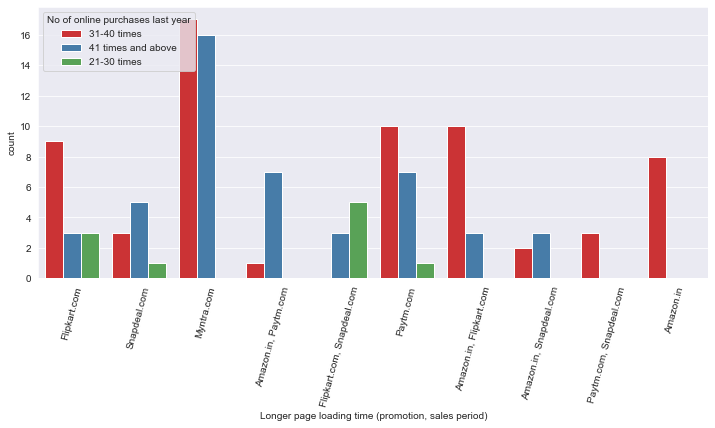

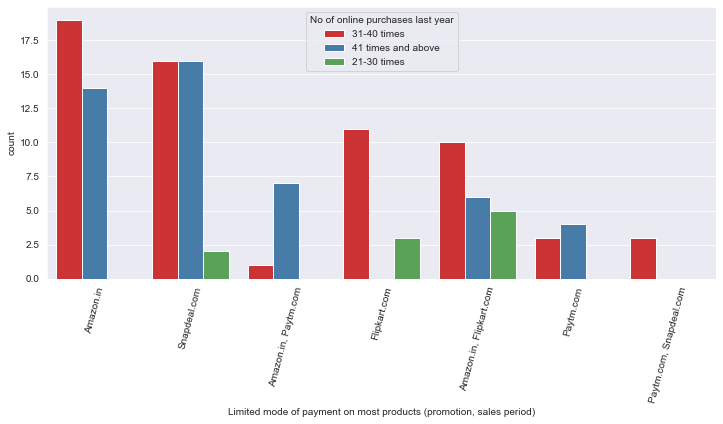

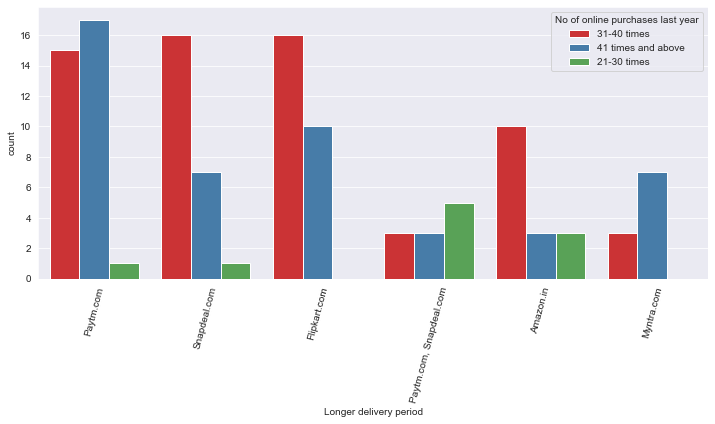

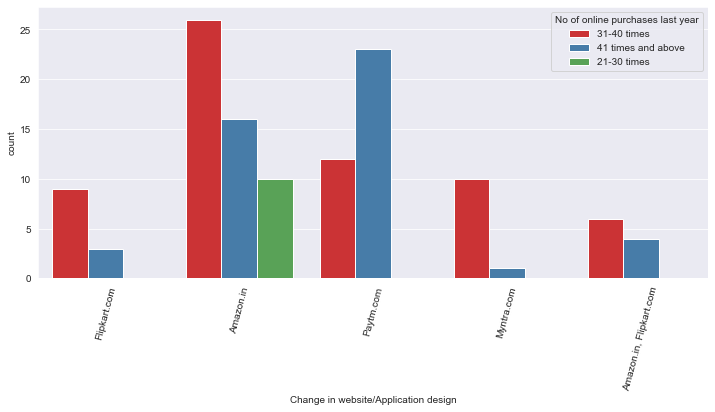

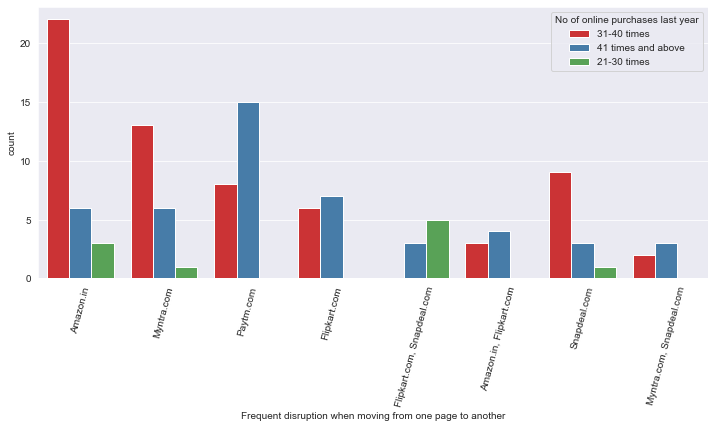

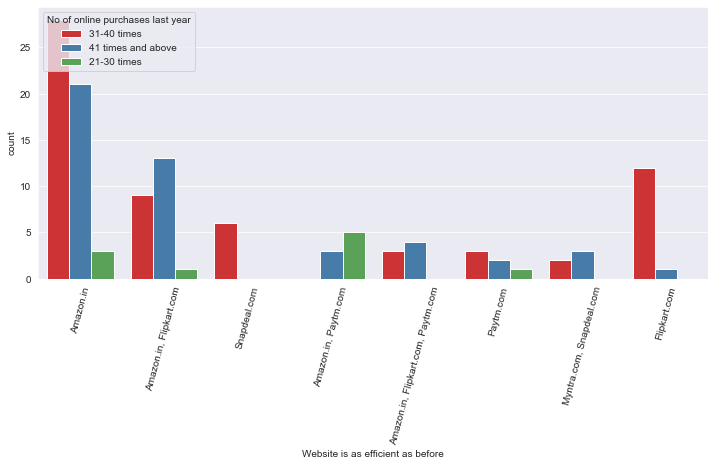

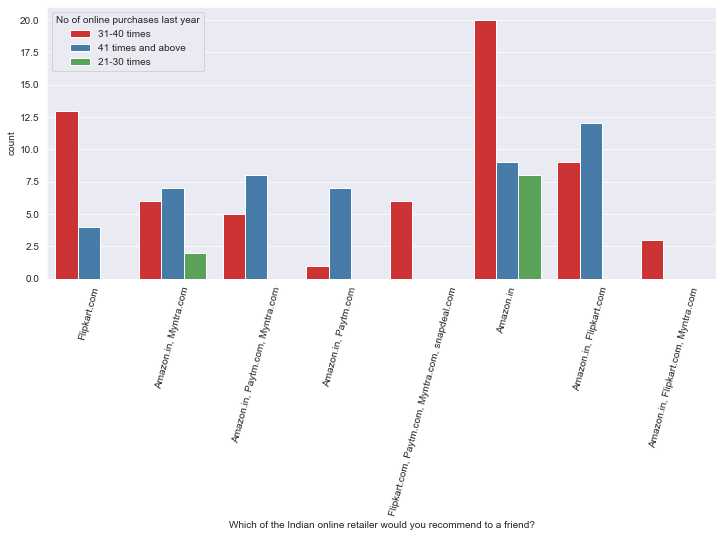

In [23]:
dataa=df[(df[df.columns[5]]=='31-40 times') | (df[df.columns[5]]=='41 times and above') | (df[df.columns[5]]=='21-30 times') ]
datas=dataa.iloc[:,[5,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]]
for i in datas.columns:
    plt.subplots(figsize=(12,5))
    sns.countplot(hue='No of online purchases last year',x=i,data=datas, palette='Set1')
    plt.xticks(rotation=75)

- Majority number of customers have shopped from amazon, paytm and myntra
 
 
- Majority number of customers like amazon, paytm and myntra web page layout


- Majority number of customers like amazon and flipkart in terms of variety of product offered


- Majority number of customers like amazon and flipkart in terms of relevant and complete description of products


- High proportion of high purchase frequency customers like amazon and paytm in terms of website speed


- Most relaibility is obtianed from amazon and flipkart


- Majority number of customers like Amazon in terms of quick purchase


- For payment option Amazon, flipkart and myntra are liked most by the high purchase frequency customers


- Amazon stands apart in terms of speed of order delivery and privacy of customers information


- Highest number of customers like amazon,flipkart in terms of security of customer private inforamtion


- Amazon perceived highest trustworthyness of high purchase frequency customers


- Most of customers like amazon in terms of online assistance through multichannel


- Most user claims flipkart to take maximumm login time during sales/promotion


- majority of customers claims myntra to take maximum time in displaying graphics and photos